## 美国职业棒球数据分析U报告 1985-2015

这篇分析报告通过分析美国职业棒球大联盟的统计数据，试图获得以下几个问题的答案：
* 球队的赛季排名成绩和球队总薪资是否强相关？
* 球队的主场观众数量(Teams.csv里的attendance)和球队赛季排名成绩是否强相关？
* MLB球员的哪个年龄段是黄金年龄（拿到高薪）？
* 高薪球员的主要特点是什么？
* 球员赛季表现指标中有哪些项是强相关的？

In [1]:
START_YEAR = 1985
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

读取球队数据

In [2]:

origin_df = pd.read_csv('./baseballdatabank-master/core/Teams.csv')
print origin_df.columns
years_df = origin_df.set_index('yearID')
teams_df = origin_df.set_index('teamID')

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')


读取薪资数据

In [3]:
salaries_df = pd.read_csv('./baseballdatabank-master/core/Salaries.csv')
salaries_df = salaries_df[salaries_df['yearID']>=START_YEAR]
print salaries_df


       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
5        1985    ATL   NL  chambch01    800000
6        1985    ATL   NL  dedmoje01    150000
7        1985    ATL   NL  forstte01    483333
8        1985    ATL   NL  garbege01    772000
9        1985    ATL   NL  harpete01    250000
10       1985    ATL   NL  hornebo01   1500000
11       1985    ATL   NL  hubbagl01    455000
12       1985    ATL   NL  mahleri01    407500
13       1985    ATL   NL  mcmurcr01    275000
14       1985    ATL   NL  mumphje01    775000
15       1985    ATL   NL  murphda05   1625000
16       1985    ATL   NL  oberkke01    616667
17       1985    ATL   NL  perezpa01    450000
18       1985    ATL   NL  perryge01    120000
19       1985    ATL   NL  ramirra01    750000
20       1985

#### 计算球队数据的相关性

In [4]:
grp_salaries = salaries_df[['yearID', 'teamID', 'salary']].groupby(['yearID', 'teamID'])

In [5]:
print grp_salaries.describe()

              salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
1985   ATL      22.0  6.730455e+05  3.970351e+05  120000.0   451250.00   
       BAL      22.0  5.254869e+05  3.189283e+05   60000.0   390625.00   
       BOS      25.0  4.359024e+05  2.985073e+05  115000.0   177500.00   
       CAL      28.0  5.152819e+05  3.052799e+05   60000.0   321666.75   
       CHA      21.0  4.688656e+05  3.440961e+05   60000.0   195000.00   
       CHN      22.0  5.774053e+05  3.190828e+05  200000.0   335000.25   
       CIN      22.0  3.799962e+05  3.227896e+05   60000.0   126875.00   
       CLE      20.0  3.275833e+05  2.290844e+05  110000.0   197500.00   
       DET      20.0  5.174072e+05  2.863597e+05   76000.0   250000.00   
       HOU      20.0  4.996525e+05  3.119774e+05   60000.0   294166.75   
       KCA      22.0  4.236900e+05  3.

In [6]:
#computed_grp_salaries_df = grp_salaries['salary'].agg([np.sum, np.std, np.mean, np.min, np.max]).reset_index()
computed_grp_salaries_df = grp_salaries['salary'].agg([pd.Series.count, np.sum, np.std, np.mean, np.max]).reset_index()
print computed_grp_salaries_df

     yearID teamID  count        sum           std          mean      amax
0      1985    ATL     22   14807000  3.970351e+05  6.730455e+05   1625000
1      1985    BAL     22   11560712  3.189283e+05  5.254869e+05   1472819
2      1985    BOS     25   10897560  2.985073e+05  4.359024e+05   1075000
3      1985    CAL     28   14427894  3.052799e+05  5.152819e+05   1100000
4      1985    CHA     21    9846178  3.440961e+05  4.688656e+05   1242333
5      1985    CHN     22   12702917  3.190828e+05  5.774053e+05   1450000
6      1985    CIN     22    8359917  3.227896e+05  3.799962e+05   1071429
7      1985    CLE     20    6551666  2.290844e+05  3.275833e+05   1100000
8      1985    DET     20   10348143  2.863597e+05  5.174072e+05   1083333
9      1985    HOU     20    9993051  3.119774e+05  4.996525e+05   1350000
10     1985    KCA     22    9321179  3.009853e+05  4.236900e+05   1000000
11     1985    LAN     23   10967917  3.275862e+05  4.768660e+05   1270000
12     1985    MIN     19

In [7]:
team_with_salaries_df = pd.merge(computed_grp_salaries_df, origin_df[['yearID', 'teamID', 'Rank', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'Ghome', 'attendance']], how='inner', on=['yearID', 'teamID']).set_index(['yearID', 'teamID'])

调整球队排名的计算。把季后赛成绩和常规赛成绩统一到一个排名字段ARank，后面以此为依据计算和排名相关的变量

In [8]:
def rank_adjust(row):
    rank = row['Rank'] + 3
    if row['WSWin'] == 'Y':
        rank -= 3
    elif row['LgWin'] == 'Y':
        rank -= 2
    return rank

team_with_salaries_df['ARank'] = team_with_salaries_df.apply(lambda row: rank_adjust(row), axis=1)
print team_with_salaries_df

               count        sum           std          mean      amax  Rank  \
yearID teamID                                                                 
1985   ATL        22   14807000  3.970351e+05  6.730455e+05   1625000     5   
       BAL        22   11560712  3.189283e+05  5.254869e+05   1472819     4   
       BOS        25   10897560  2.985073e+05  4.359024e+05   1075000     5   
       CAL        28   14427894  3.052799e+05  5.152819e+05   1100000     2   
       CHA        21    9846178  3.440961e+05  4.688656e+05   1242333     3   
       CHN        22   12702917  3.190828e+05  5.774053e+05   1450000     4   
       CIN        22    8359917  3.227896e+05  3.799962e+05   1071429     2   
       CLE        20    6551666  2.290844e+05  3.275833e+05   1100000     7   
       DET        20   10348143  2.863597e+05  5.174072e+05   1083333     3   
       HOU        20    9993051  3.119774e+05  4.996525e+05   1350000     3   
       KCA        22    9321179  3.009853e+05  4.236

In [9]:
print team_with_salaries_df.loc[2014]

        count        sum           std          mean      amax  Rank DivWin  \
teamID                                                                        
ARI        26   97861500  3.823383e+06  3.763904e+06  11000000     5      N   
ATL        24   97609000  4.779448e+06  4.067042e+06  14250000     2      N   
BAL        28  103416000  4.349065e+06  3.693429e+06  15000000     1      Y   
BOS        31  139019929  4.887357e+06  4.484514e+06  16000000     5      N   
CHA        24   81830500  4.150391e+06  3.409604e+06  15000000     4      N   
CHN        27   65522500  2.446508e+06  2.426759e+06  11000000     5      N   
CIN        28  108217500  3.914747e+06  3.864911e+06  12000000     4      N   
CLE        26   82151899  4.192258e+06  3.159688e+06  15000000     3      N   
COL        30   95403500  4.090896e+06  3.180117e+06  16000000     4      N   
DET        23  152855500  7.276494e+06  6.645891e+06  22000000     1      Y   
HOU        20   35116300  2.888056e+06  1.755815e+06

In [10]:
print 'arank corr team salaries:', team_with_salaries_df['ARank'].corr(team_with_salaries_df['sum'])

arank corr team salaries: -0.24897004885052806


In [11]:
print 'arank corr team Ghome', team_with_salaries_df['ARank'].corr(team_with_salaries_df['Ghome'])

arank corr team Ghome 0.018350805778188012


In [12]:
print 'arank corr team home attendances', team_with_salaries_df['ARank'].corr(team_with_salaries_df['attendance'])

arank corr team home attendances -0.4336584805405877


In [13]:
print 'salaries corr team home attendances', team_with_salaries_df['sum'].corr(team_with_salaries_df['attendance'])

salaries corr team home attendances 0.5712660270644402


In [14]:
print 'arank corr team players:', team_with_salaries_df['ARank'].corr(team_with_salaries_df['count'])

arank corr team players: 0.015906237476913093


计算累计薪资投入和球队赛季排名成绩的关系

In [15]:
def rolling_years_corr(rolling_size, team_with_salaries_df):
    team_with_salaries_df_sal = team_with_salaries_df['sum']
    team_with_salaries_df[str(rolling_size)+'ysal_avg'] = team_with_salaries_df_sal.rolling(rolling_size).mean()
    team_with_salaries_df_arank = team_with_salaries_df['ARank']
    team_with_salaries_df[str(rolling_size)+'yarank_avg'] = team_with_salaries_df_arank.rolling(rolling_size).mean()

In [16]:
rolling_years_corr(3, team_with_salaries_df)
rolling_years_corr(5, team_with_salaries_df)
print team_with_salaries_df.loc[2014]

        count        sum           std          mean      amax  Rank DivWin  \
teamID                                                                        
ARI        26   97861500  3.823383e+06  3.763904e+06  11000000     5      N   
ATL        24   97609000  4.779448e+06  4.067042e+06  14250000     2      N   
BAL        28  103416000  4.349065e+06  3.693429e+06  15000000     1      Y   
BOS        31  139019929  4.887357e+06  4.484514e+06  16000000     5      N   
CHA        24   81830500  4.150391e+06  3.409604e+06  15000000     4      N   
CHN        27   65522500  2.446508e+06  2.426759e+06  11000000     5      N   
CIN        28  108217500  3.914747e+06  3.864911e+06  12000000     4      N   
CLE        26   82151899  4.192258e+06  3.159688e+06  15000000     3      N   
COL        30   95403500  4.090896e+06  3.180117e+06  16000000     4      N   
DET        23  152855500  7.276494e+06  6.645891e+06  22000000     1      Y   
HOU        20   35116300  2.888056e+06  1.755815e+06

In [17]:
print 'arank corr team Ghome rolling 5 years', team_with_salaries_df['5yarank_avg'].corr(team_with_salaries_df['5ysal_avg'])

arank corr team Ghome rolling 5 years -0.3215991285050088


In [18]:
print 'arank corr team Ghome rolling 3 years', team_with_salaries_df['3yarank_avg'].corr(team_with_salaries_df['3ysal_avg'])

arank corr team Ghome rolling 3 years -0.28920052289936754


绘制图形

把数据拆分成10年的粒度

In [19]:
def get_index_min_max(df, index_label):
    index = df.index.get_level_values(index_label)
    if index.dtype.kind != 'i':
        raise 'index isnot ingeter type!'
    min_val = index.min()
    max_val = index.max()
    return min_val, max_val
    
def divide_by_index_size(size, index_label, df):
    min_val, max_val = get_index_min_max(df, index_label)
    df_list = []
    for i in range(min_val, max_val, size):
        df_list.append(df.loc[pd.IndexSlice[i:i+size]])
    print 'df list ', len(df_list)
    return df_list

team_with_salaries_df_10years = divide_by_index_size(10, 'yearID', team_with_salaries_df)
team_with_salaries_df_10years.reverse()

df list  3


绘制MLB从1985年开始的球队薪资变化stack图形

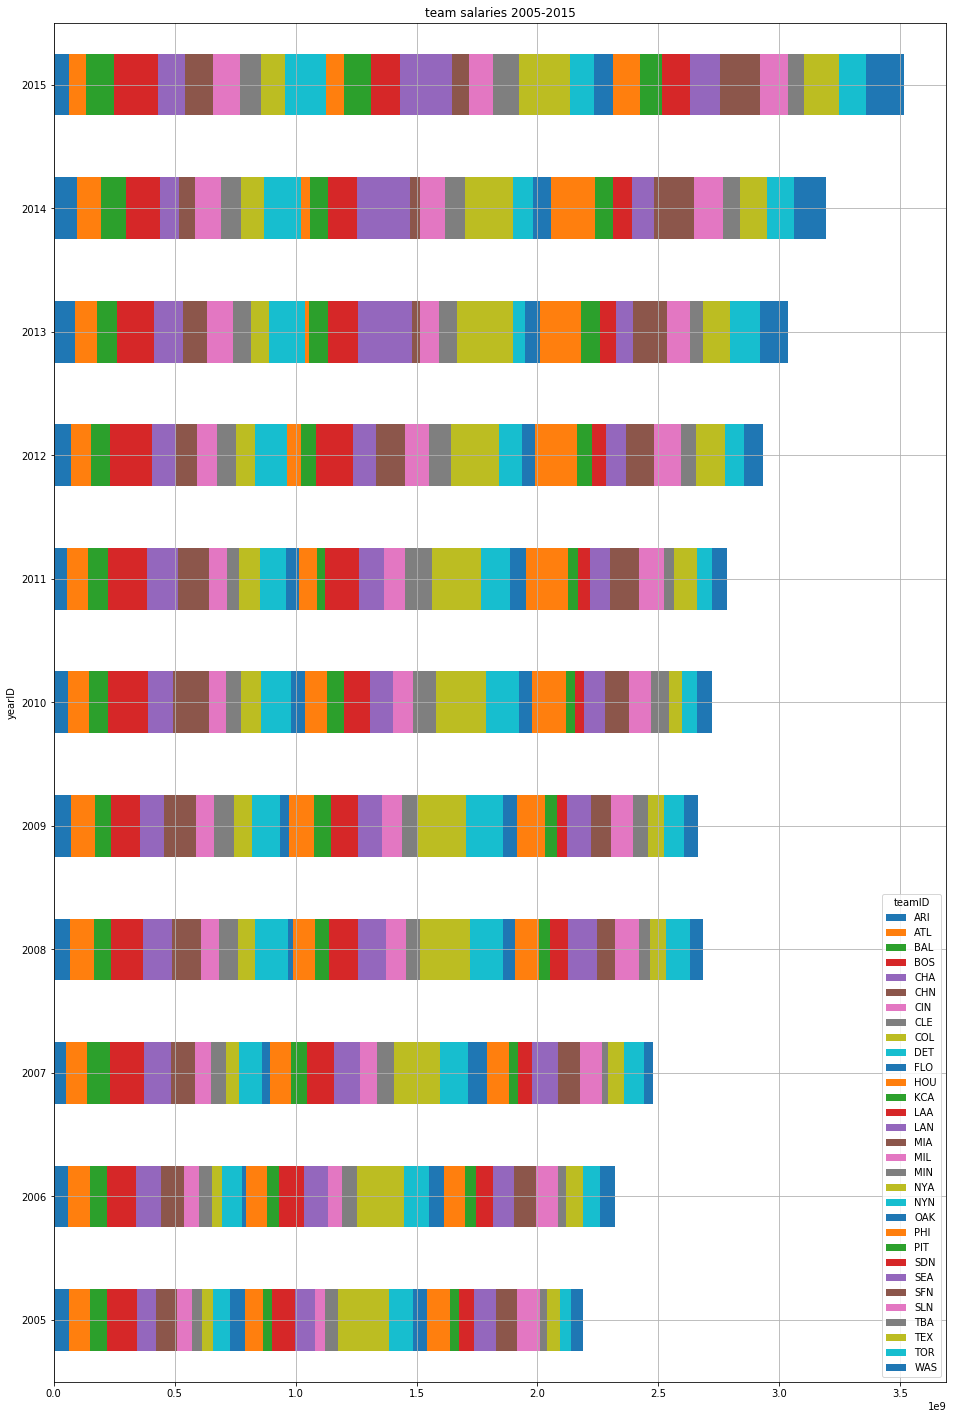

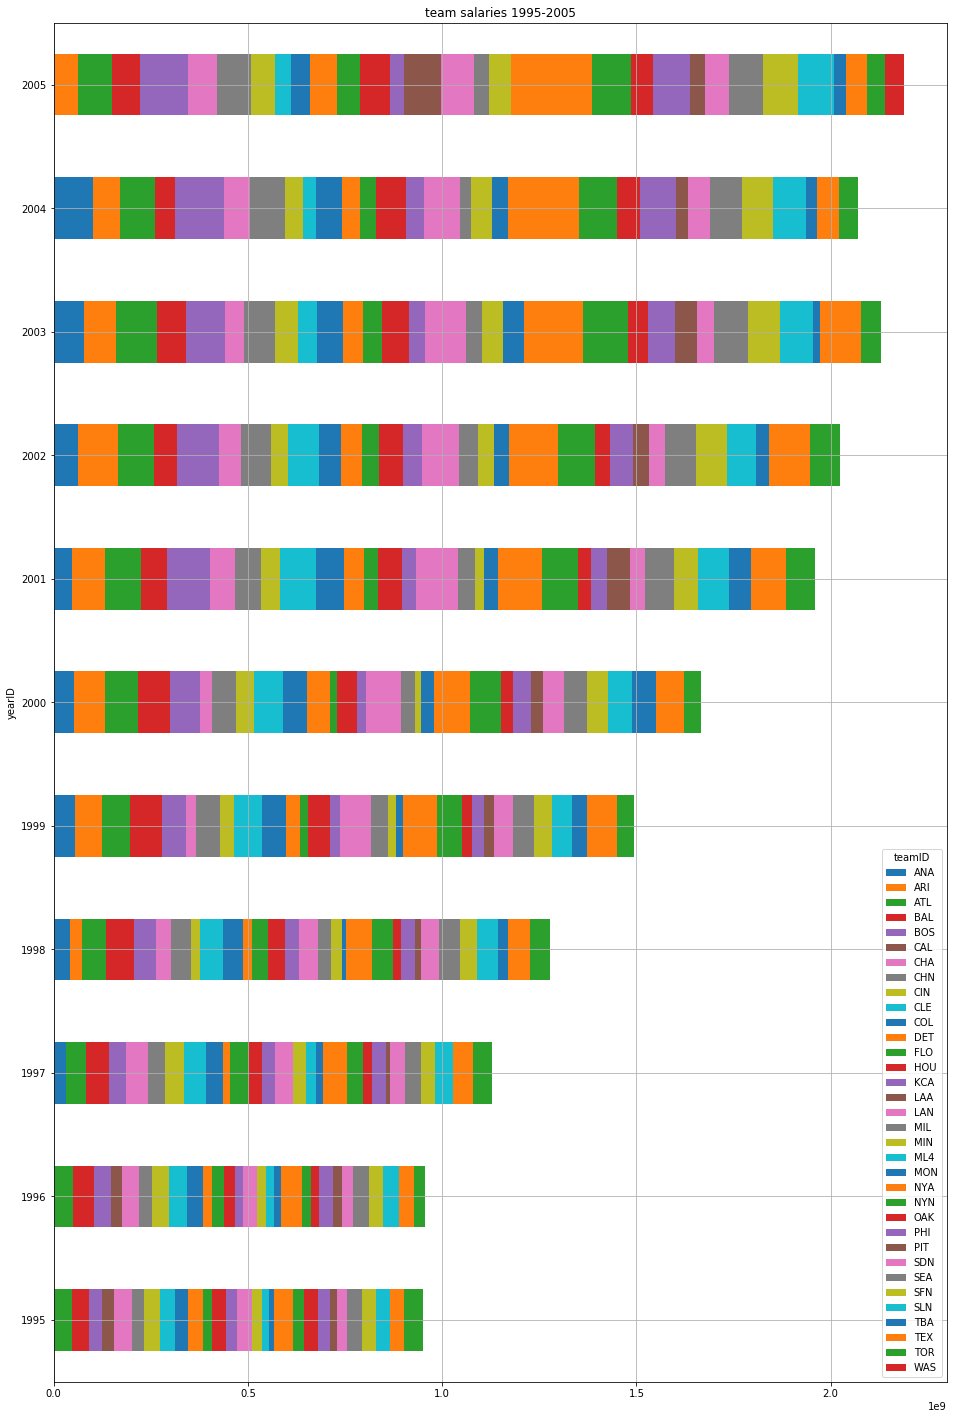

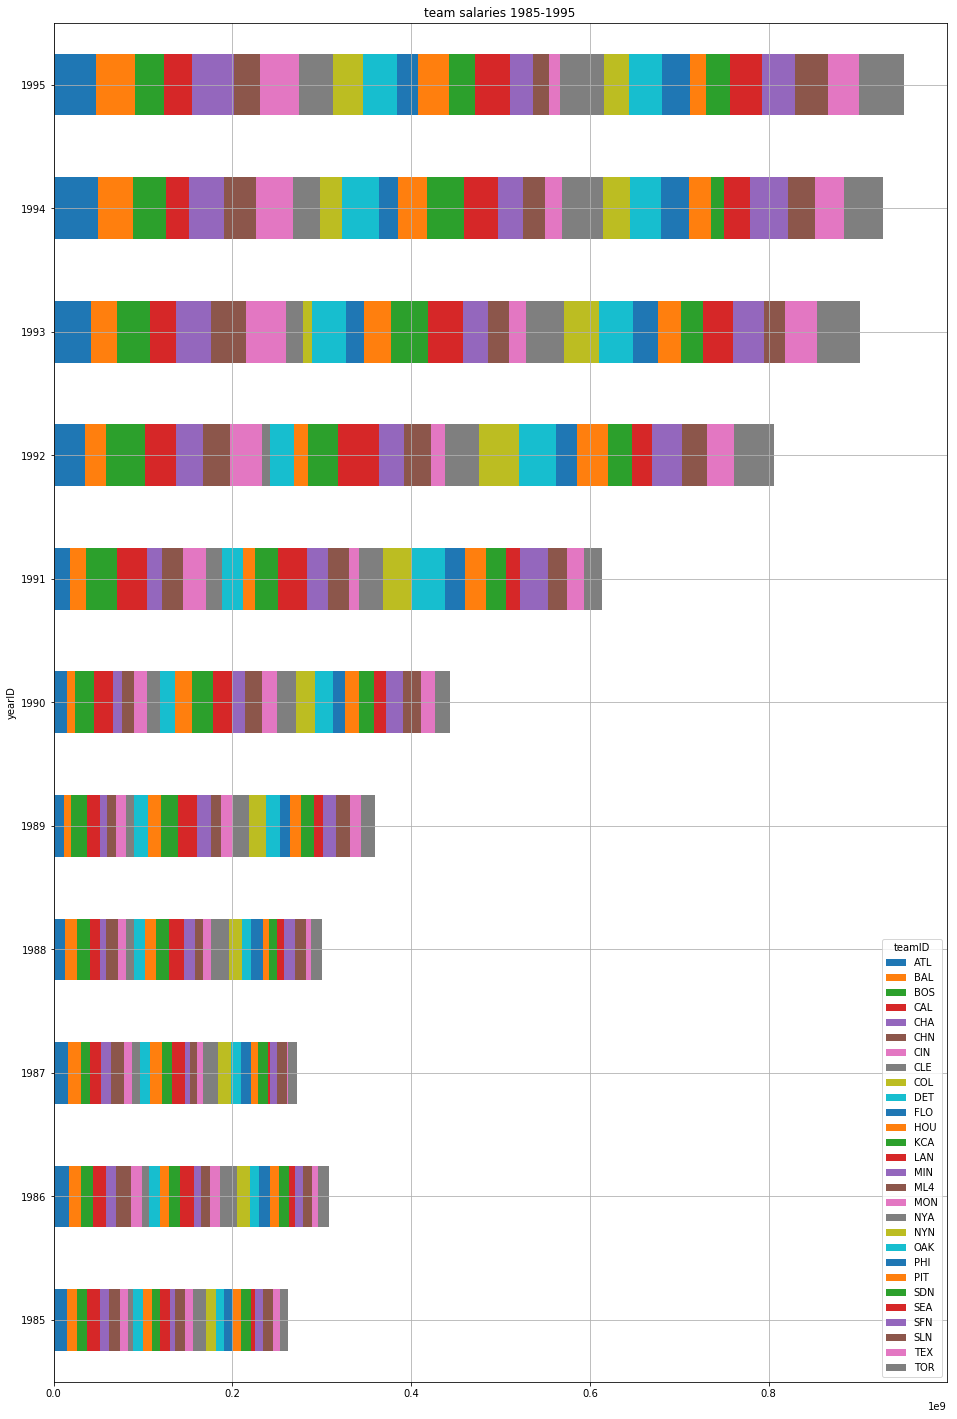

In [20]:
def draw_barh_with_team_salaries(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['sum']].reset_index()
    draw_df = salaries_df.pivot(index='yearID', columns='teamID', values='sum')
    draw_df.plot.barh(figsize=(16, 25), grid=True, stacked=True, title=title)
    
for df in team_with_salaries_df_10years:
    draw_barh_with_team_salaries(df, 'team salaries')

按年绘制球队总薪资和赛季排名的scatter

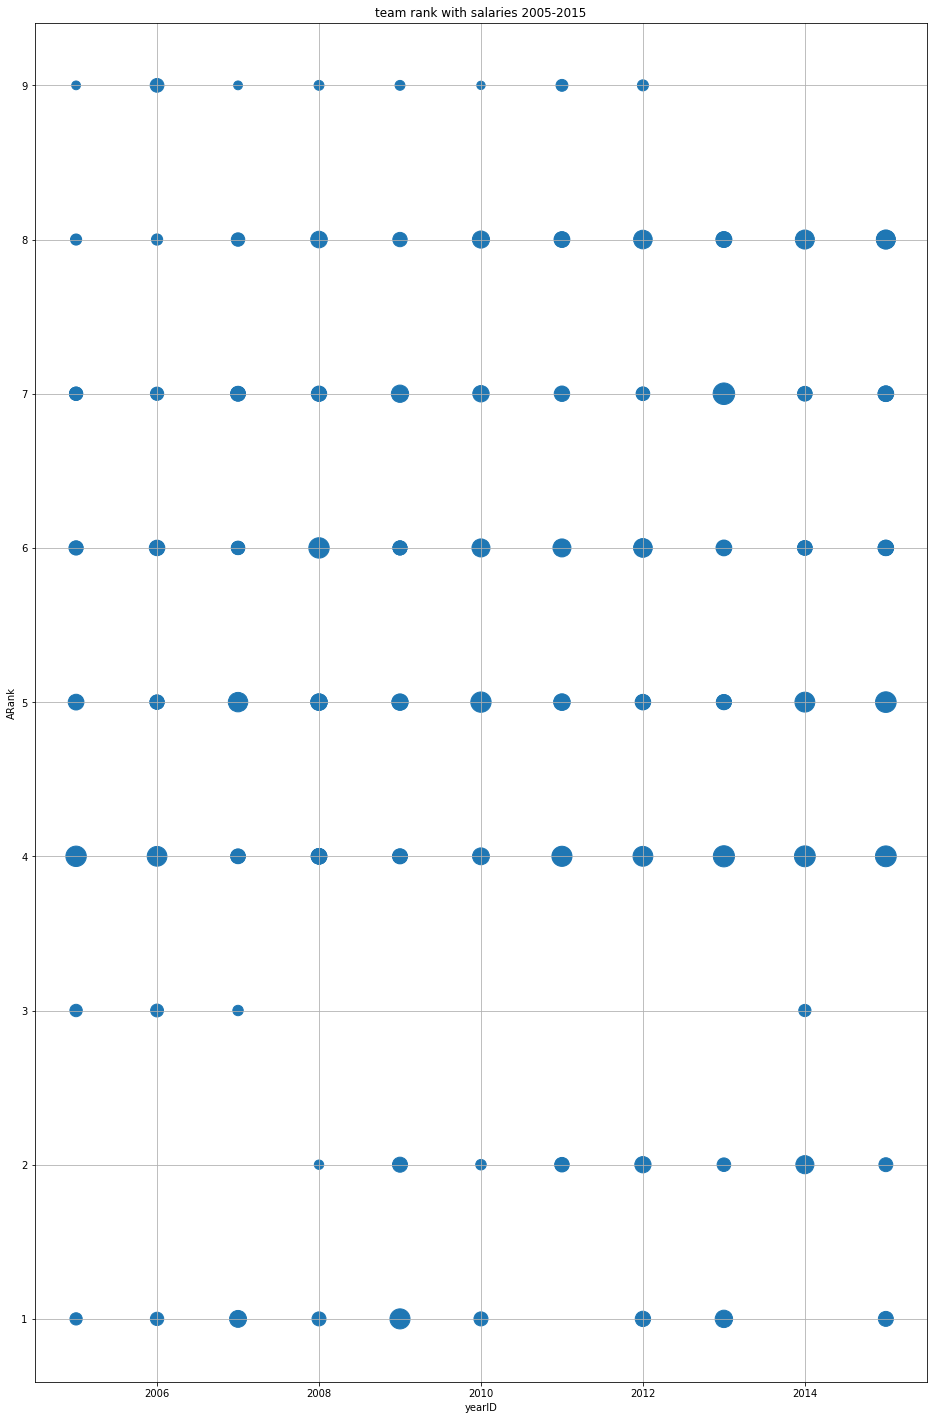

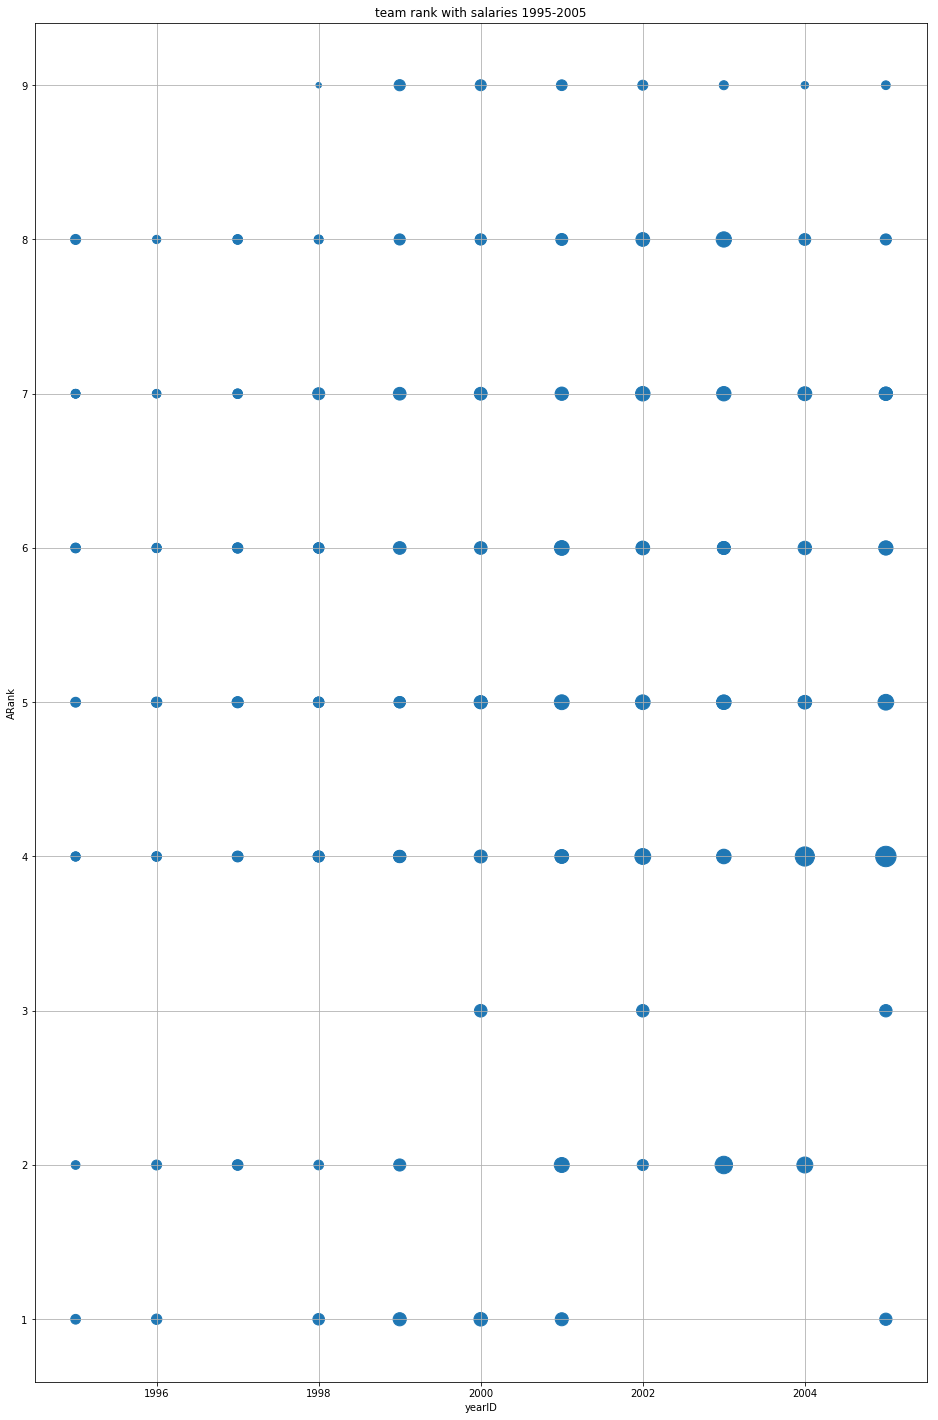

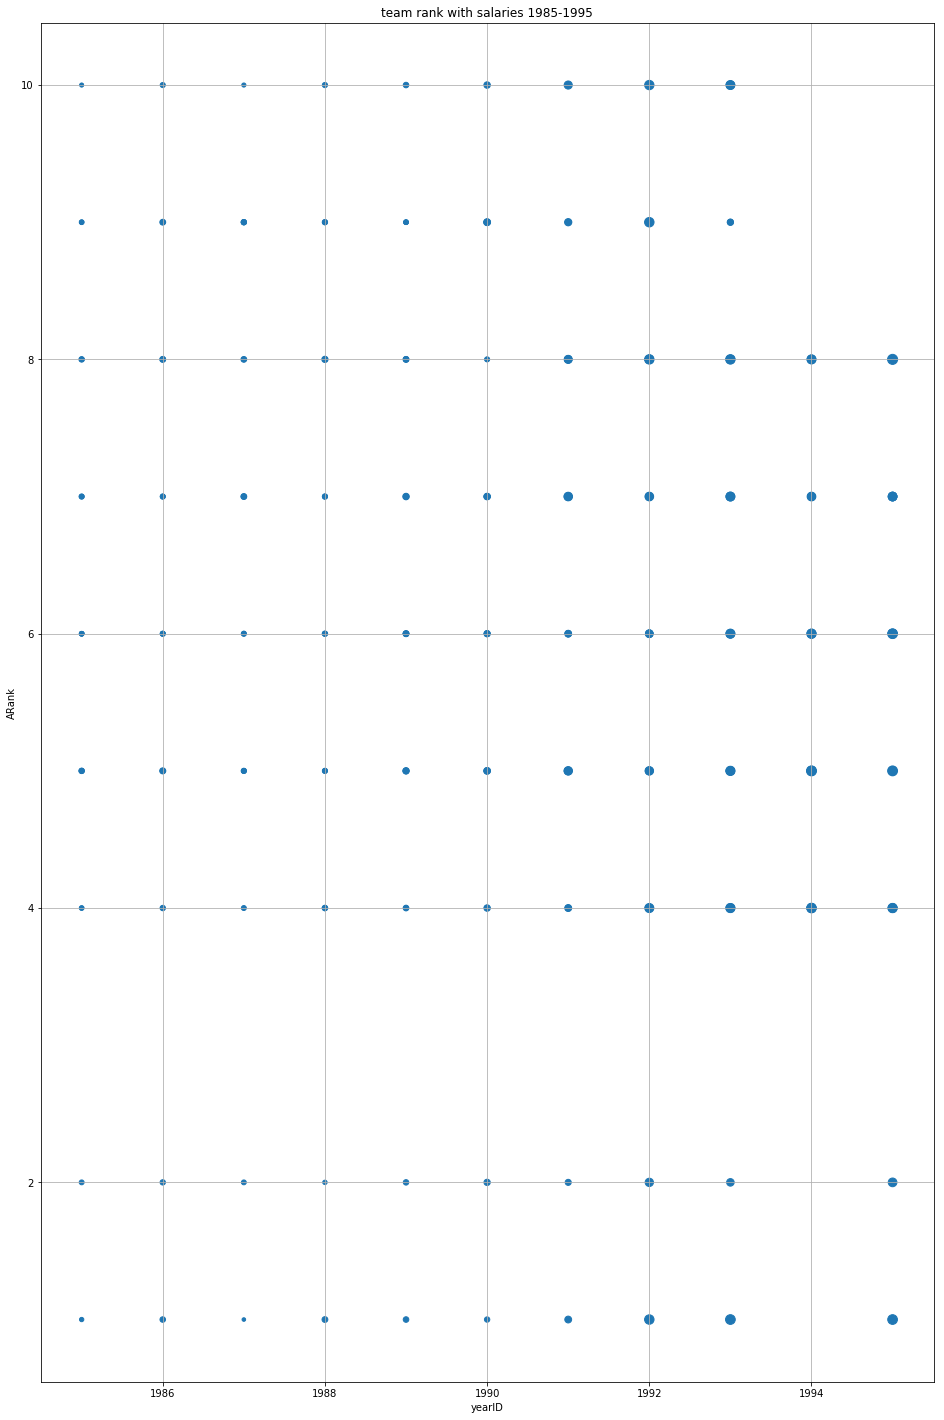

In [21]:
def draw_scatter_with_team_salaries(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['ARank','sum']].reset_index()
    salaries_df = salaries_df.rename({'sum':'salaries'}, axis='columns')
    
    salaries_df.plot.scatter(x='yearID', y='ARank', s=salaries_df.salaries/500000,
                             figsize=(16, 25), grid=True,
                             title=title)
    
for df in team_with_salaries_df_10years:
    draw_scatter_with_team_salaries(df, 'team rank with salaries')

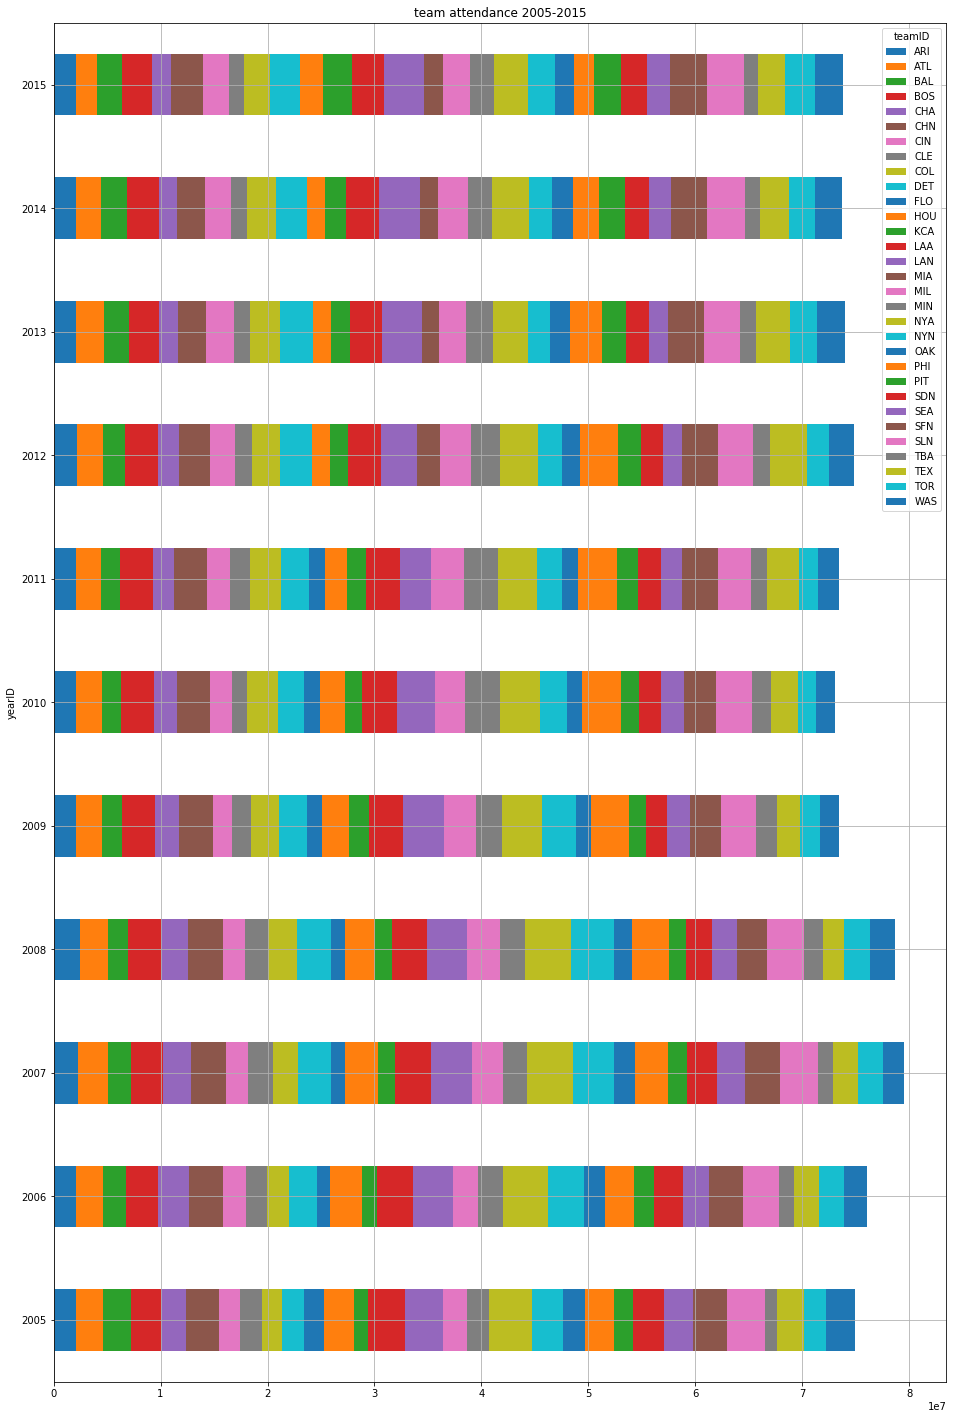

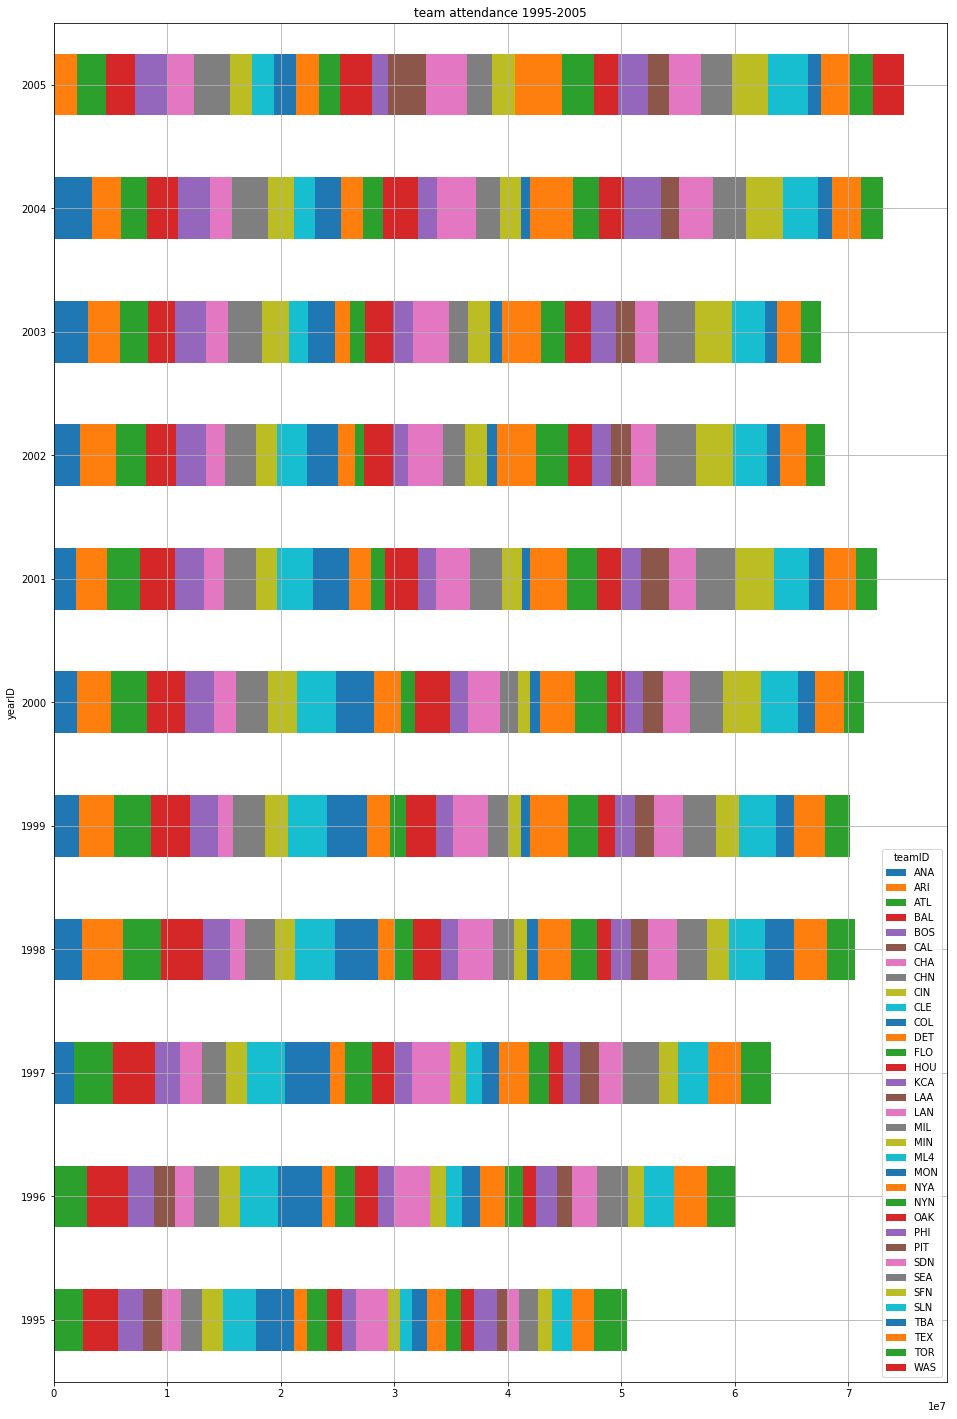

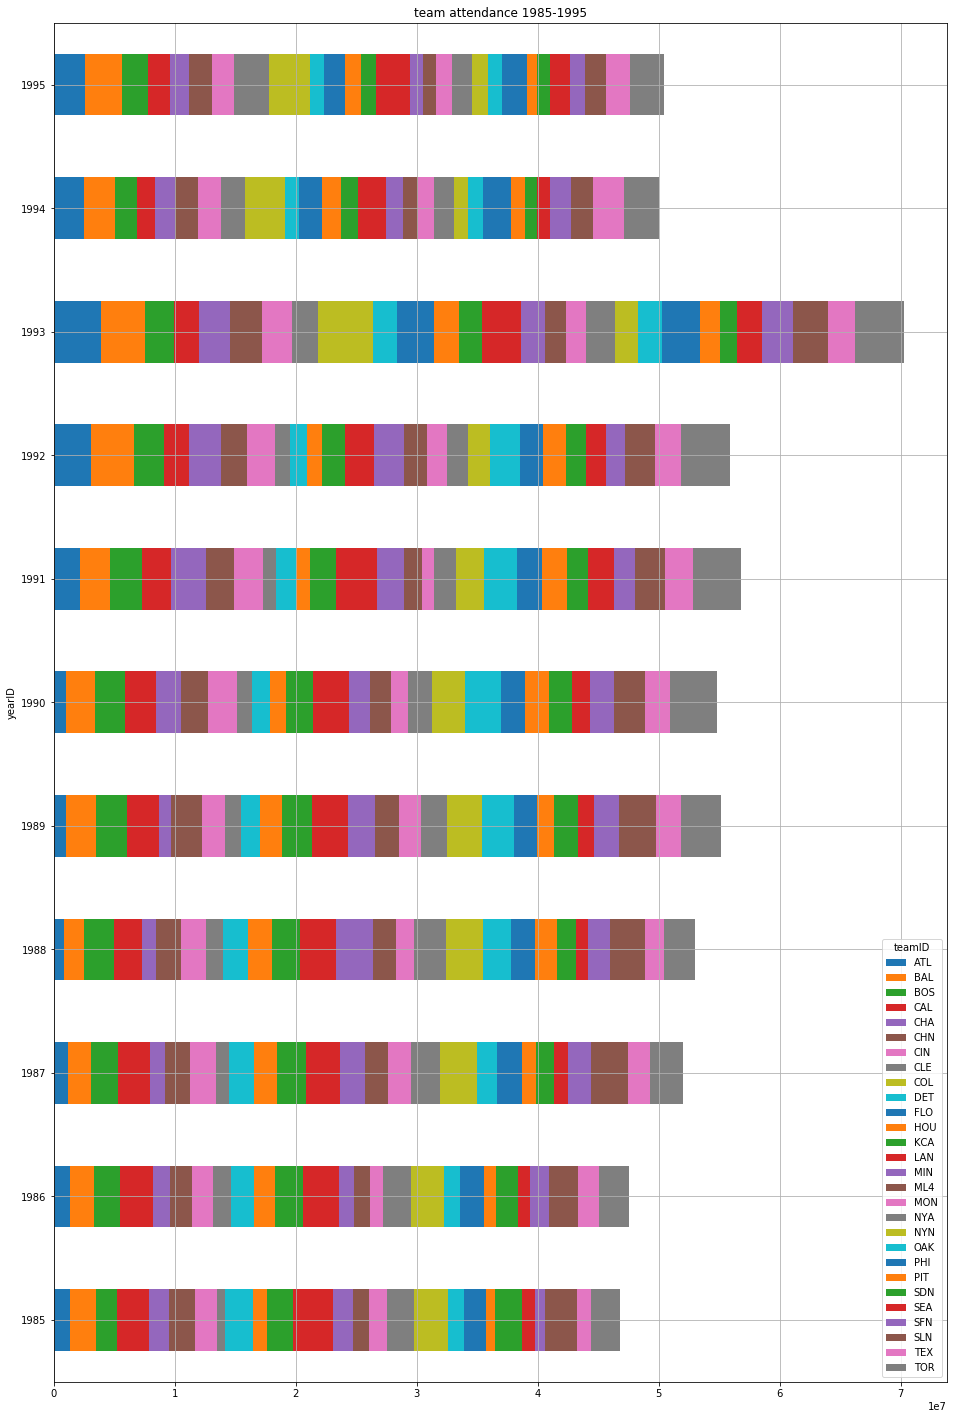

In [22]:
def draw_barh_with_team_attendance(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    attendances_df = df[['attendance']].reset_index()
    draw_df = attendances_df.pivot(index='yearID', columns='teamID', values='attendance')
    draw_df.plot.barh(figsize=(16, 25), grid=True, stacked=True, title=title)
    
for df in team_with_salaries_df_10years:
    draw_barh_with_team_attendance(df, 'team attendance')

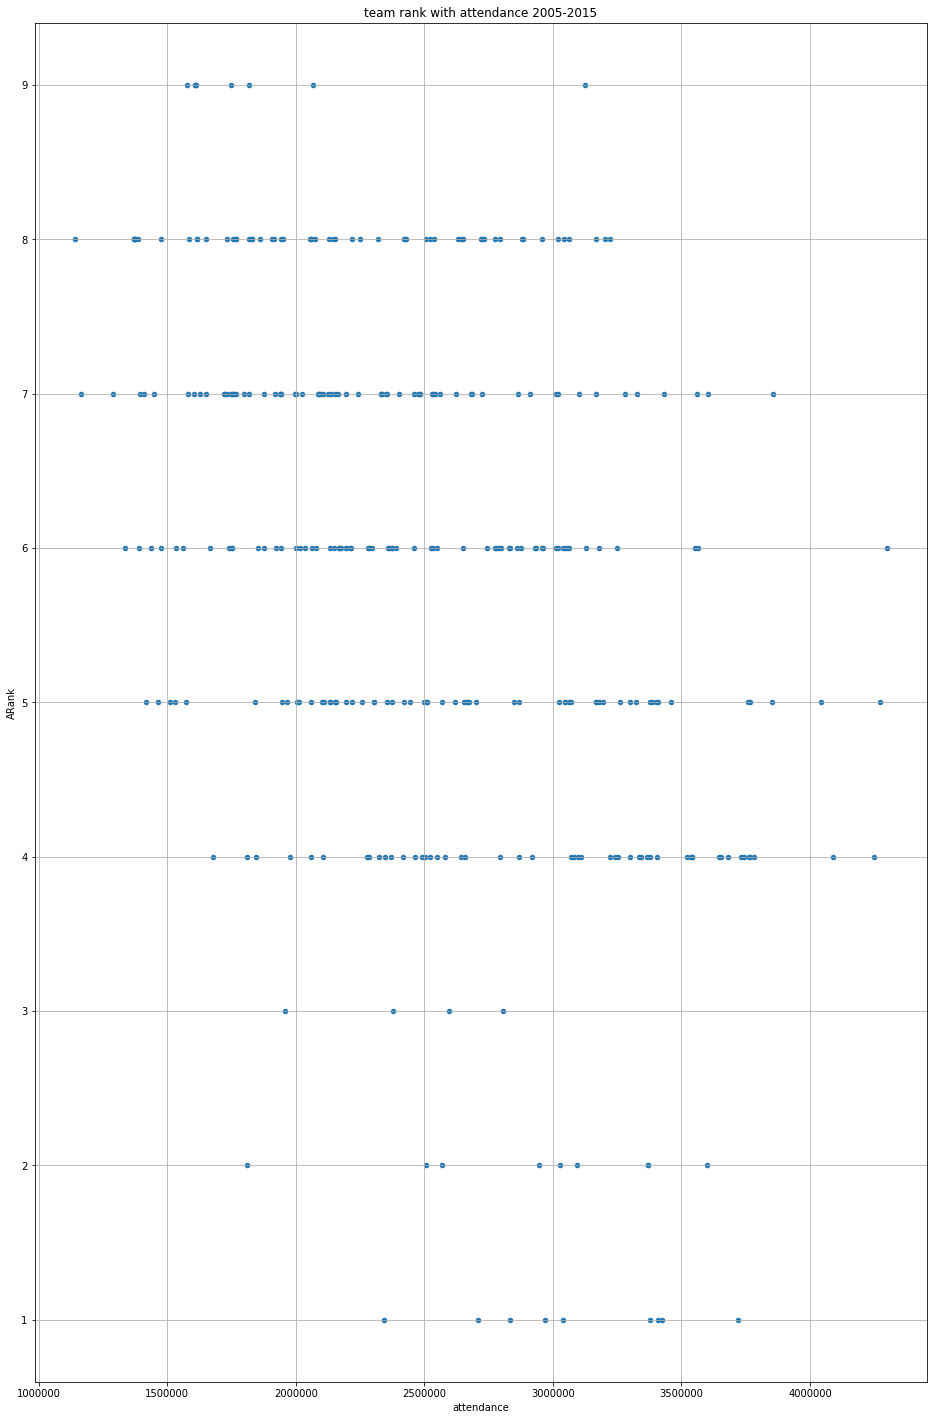

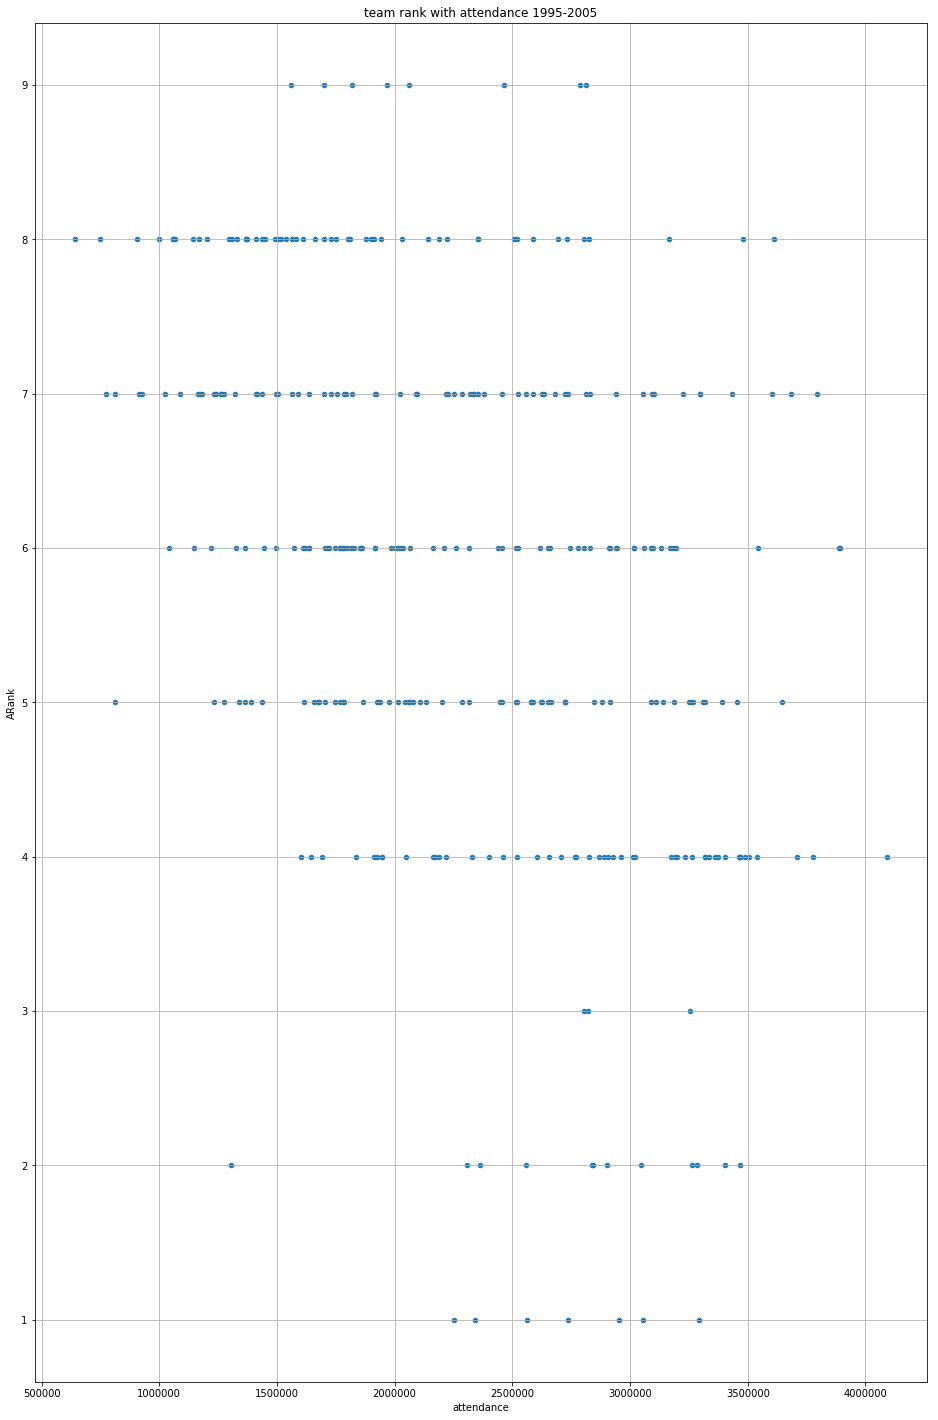

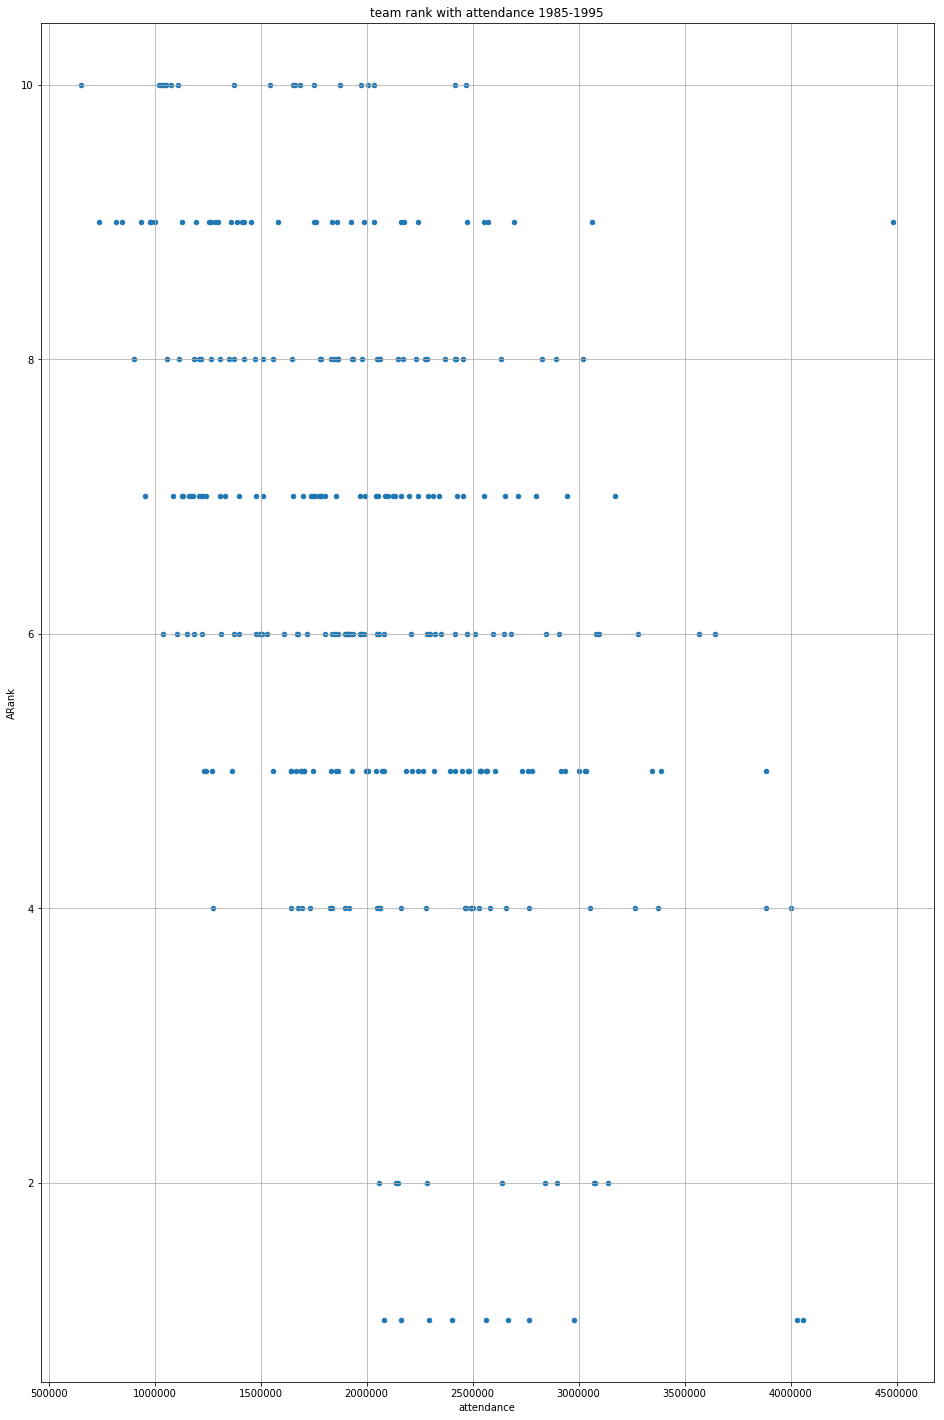

In [23]:
def draw_scatter_with_team_attendance(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['ARank','attendance']].reset_index()
    
    
    salaries_df.plot.scatter(x='attendance', y='ARank', 
                             figsize=(16, 25), grid=True,
                             title=title)
    
for df in team_with_salaries_df_10years:
    draw_scatter_with_team_attendance(df, 'team rank with attendance')

### 问题1:球队的赛季排名成绩和球队总薪资是否强相关？

首先统计总排名，把季后赛的成绩也计算进来。计算的方法是把季后赛的每个阶段都作为1级RANK，总共增加3级RANK，作为ARANK字段。RANK是越小越排名越高。因此薪资和排名的相关性的值应当是负值。

计算结果表明当赛季薪资和当赛季排名不是强相关：

    arank corr team salaries: -0.24897004885052806

如果计算近5年平均薪资和近3年平均薪资则相关度更高，但也不是左右赛季排名的决定因素：

    arank corr team with rolling 5 years -0.3215991285050088

    arank corr team with rolling 3 years -0.28920052289936754


#### 因此本问题的答案是赛季排名和球队总薪资不是强相关



### 问题2:球队的主场观众数量(Teams.csv里的attendance)和球队赛季排名成绩是否强相关？

计算结果表明赛季排名成绩和主场观众数有一定的相关，有43%的相关度，也不是强相关。

    arank corr team home attendances -0.4336584805405877

#### 因此本问题的答案是赛季排名和主场观众人数不是强相关。






#### 计算球员数据的相关性

计算球员的年龄/BMI等参数

In [24]:
def add_player_attrs(salaries_df, player_df):
    df = salaries_df.join(player_df[['birthYear', 'weight', 'height']], on='playerID', how='inner', rsuffix='_p')
    df['bmi'] = df.apply(lambda row: (row['weight']/(row['height']*row['height']))*703, axis=1)
    return df;
                            
def calc_player_age_to_salaries_table(salaries_df):
    return salaries_df.apply(lambda row: row['yearID']-row['birthYear'], axis=1)

salaries_df = add_player_attrs(salaries_df, pd.read_csv('./baseballdatabank-master/core/Master.csv').set_index('playerID'))
salaries_df['age'] = calc_player_age_to_salaries_table(salaries_df)



In [25]:
salaries_df[['birthYear', 'age']] = salaries_df[['birthYear', 'age']].astype('int')
year_salaries_df = salaries_df.set_index('yearID')
print year_salaries_df

       teamID lgID   playerID   salary  birthYear  weight  height        bmi  \
yearID                                                                         
1985      ATL   NL  barkele01   870000       1955   225.0    77.0  26.678192   
1986      ATL   NL  barkele01   880000       1955   225.0    77.0  26.678192   
1987      ATL   NL  barkele01   890000       1955   225.0    77.0  26.678192   
1987      ML4   AL  barkele01    72500       1955   225.0    77.0  26.678192   
1988      ATL   NL  barkele01   900000       1955   225.0    77.0  26.678192   
1985      ATL   NL  bedrost01   550000       1957   200.0    75.0  24.995556   
1986      PHI   NL  bedrost01   650000       1957   200.0    75.0  24.995556   
1987      PHI   NL  bedrost01  1050000       1957   200.0    75.0  24.995556   
1988      PHI   NL  bedrost01   925000       1957   200.0    75.0  24.995556   
1989      PHI   NL  bedrost01  1450000       1957   200.0    75.0  24.995556   
1990      SFN   NL  bedrost01  1450000  

显示某个赛季球员薪资的分布，y以10为刻度，分为30个桶

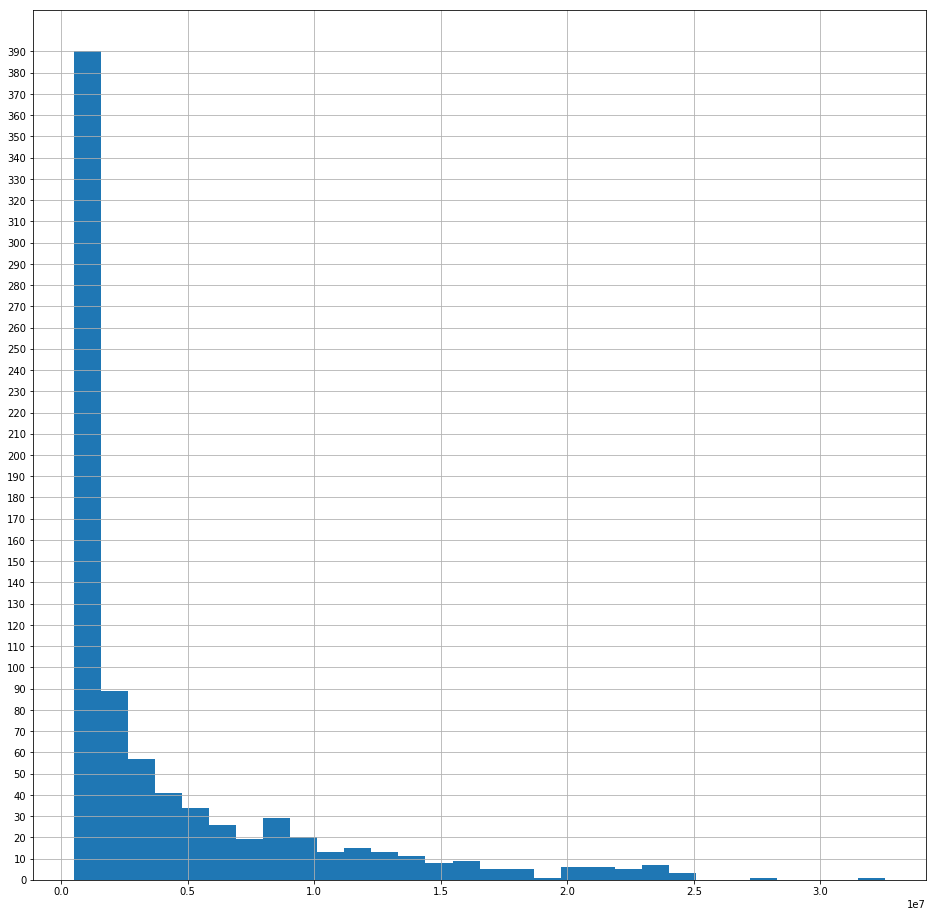

In [26]:
ax = year_salaries_df.loc[2015].salary.hist(bins=30, figsize=(16, 16))
yticks = ax.set_yticks(range(0, 400, 10))

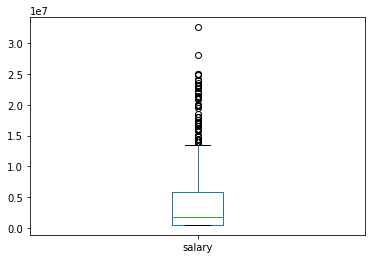

In [27]:
ax = year_salaries_df.loc[2015].salary.plot.box()

In [ ]:
显示某个赛季中球员BMI和薪资的相关性

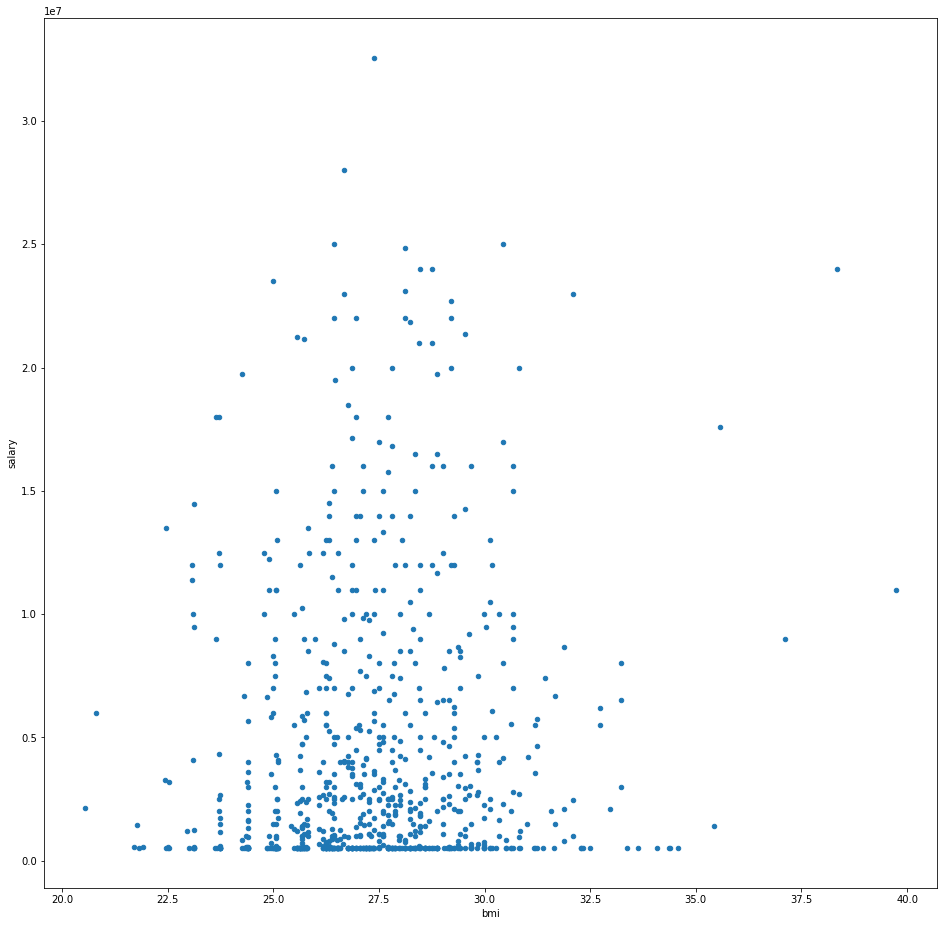

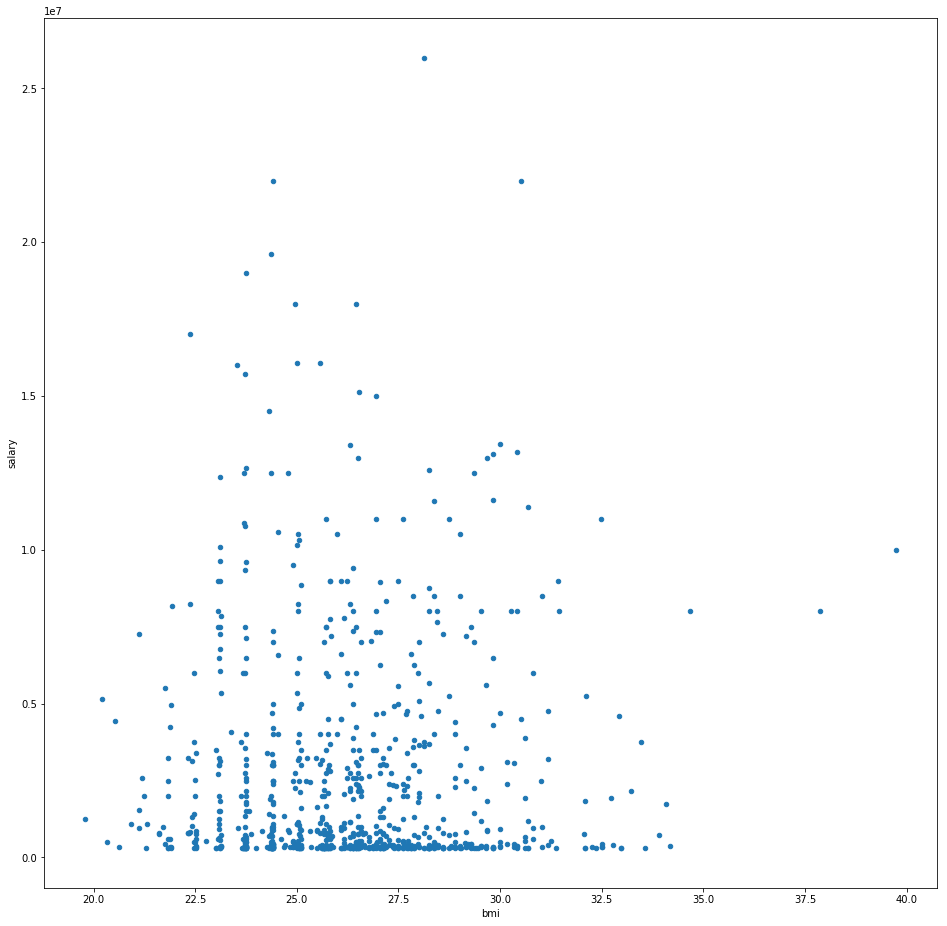

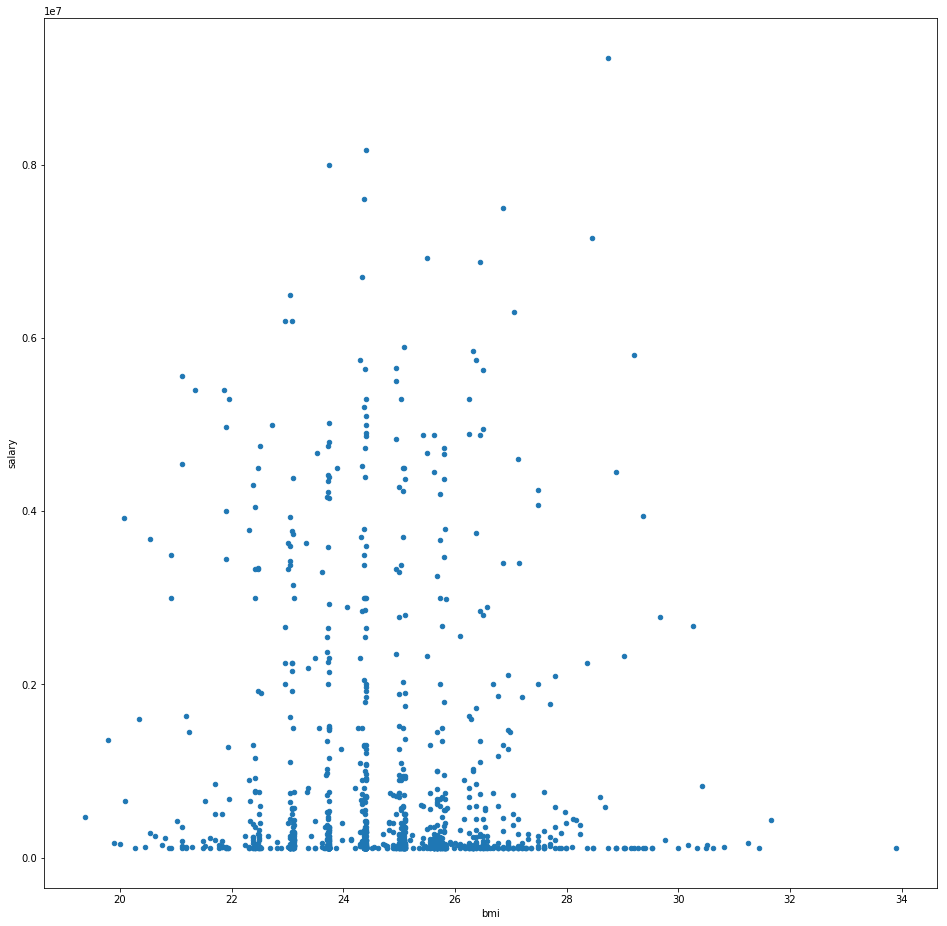

In [64]:
def bmi_with_salary_corr(year_salaries_df, yearID):
    salaries_df = year_salaries_df.loc[yearID]
    salaries_df[['bmi', 'salary']].plot.scatter(figsize=(16, 16), x='bmi', y='salary')
    
bmi_with_salary_corr(year_salaries_df, 2015)
bmi_with_salary_corr(year_salaries_df, 2005)
bmi_with_salary_corr(year_salaries_df, 1995)

In [ ]:
按赛季高薪球员的数量，分别统计1000万和2000万以上薪资的数量

In [29]:
def salary_club_greater_than(year_salaries_df, yearID, salary):
    df1 = year_salaries_df.loc[yearID]
    df2 = df1.salary.loc[lambda s: s >= salary]
    return df2.shape[0]

def salary_club_greater_than_10m(year_salaries_df, yearID):
    return salary_club_greater_than(year_salaries_df, yearID, 10000000)

def salary_club_greater_than_20m(year_salaries_df, yearID):
    return salary_club_greater_than(year_salaries_df, yearID, 20000000)


In [66]:
print '10M, 2015:', salary_club_greater_than_10m(year_salaries_df, 2015)
print '20M, 2015:', salary_club_greater_than_20m(year_salaries_df, 2015)
print '10M, 2010:', salary_club_greater_than_10m(year_salaries_df, 2010)
print '20M, 2010:', salary_club_greater_than_20m(year_salaries_df, 2010)

10M, 2015: 120
20M, 2015: 27
10M, 2010: 82
20M, 2010: 6


按赛季统计球员年龄和薪资的关系

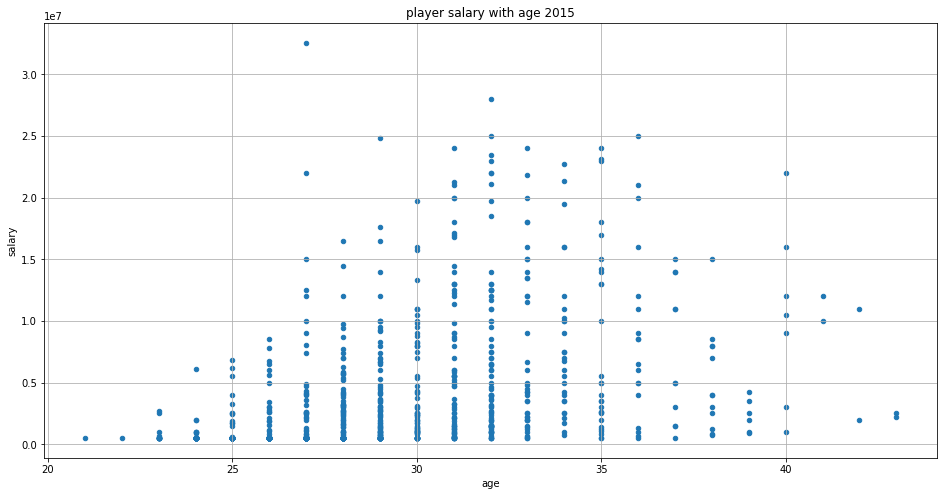

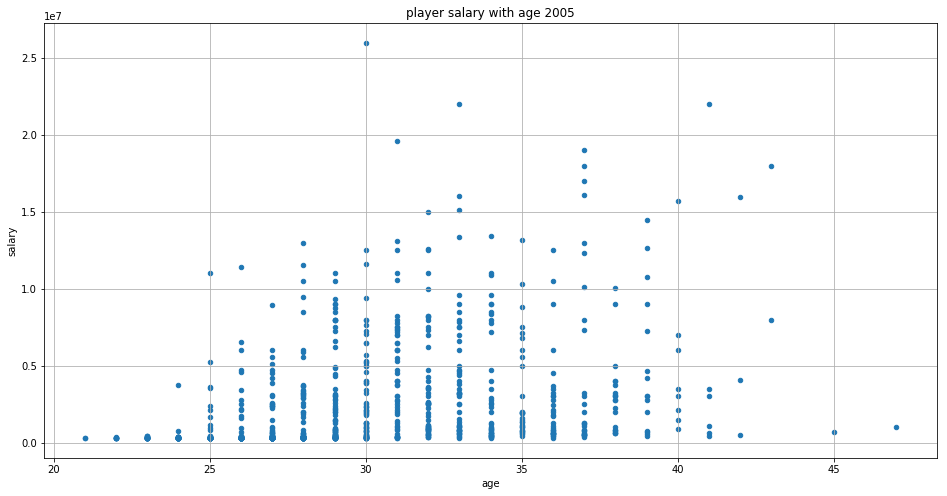

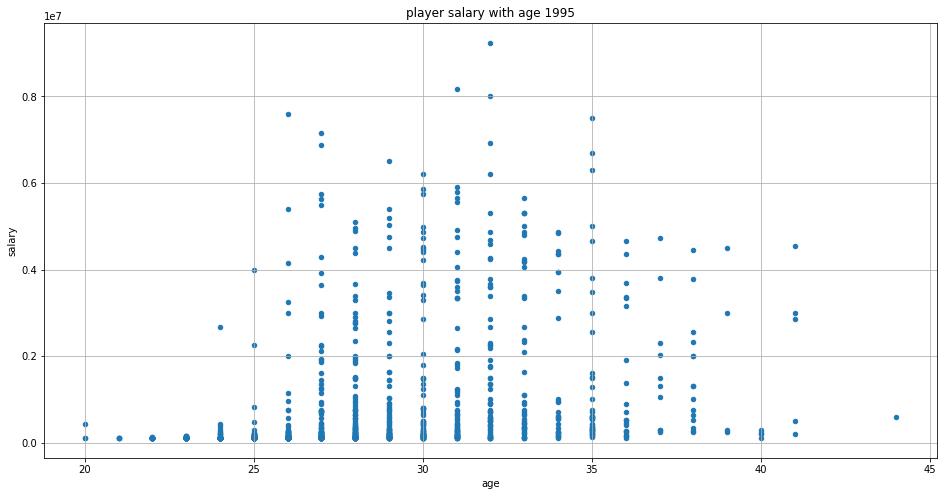

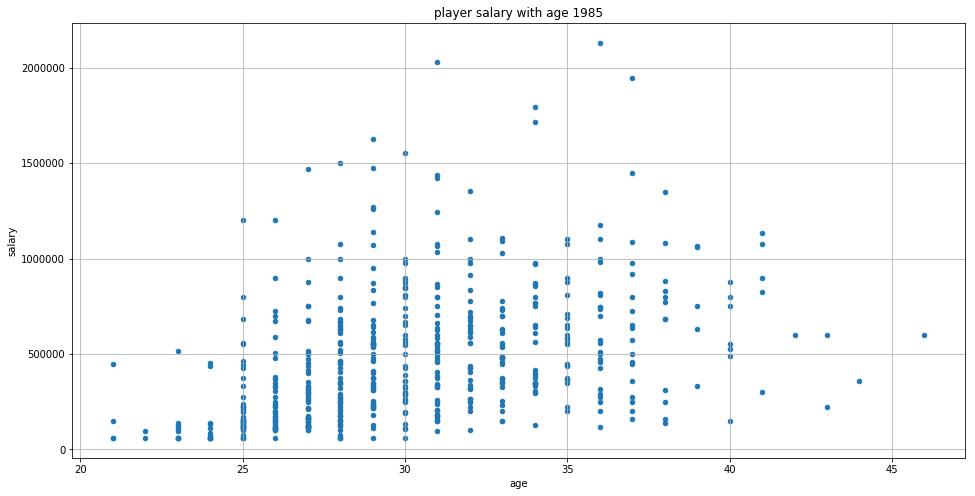

In [98]:

def draw_age_sal_plot(df, yearID):
    year_df = df.loc[yearID][['salary','age']]    
    title = 'player salary with age ' + str(yearID)
    yticks = ax.set_yticks(range(0, 400, 10))
    year_df.plot.scatter(x='age', y='salary', 
                             figsize=(16, 8), grid=True,
                        title = title)

draw_age_sal_plot(year_salaries_df, 2015)
draw_age_sal_plot(year_salaries_df, 2005)
draw_age_sal_plot(year_salaries_df, 1995)
draw_age_sal_plot(year_salaries_df, 1985)

### MLB球员的哪个年龄段是黄金年龄（拿到高薪）？

通过散点图进行观察，考虑到通货膨胀和球员薪资平均水平的增长，按赛季绘制散点图。

通过观察发现，在30-35这个区域岁之间是球员高薪比较集中的区域。可以认为是球员的黄金年龄




计算场均BATTING数据(考虑赛季中转会的因素）
* G              Games
* AB             At Bats
* R              Runs
* H              Hits
* 2B             Doubles
* 3B             Triples
* HR             Homeruns
* RBI            Runs Batted In
* SB             Stolen Bases
* CS             Caught Stealing
* BB             Base on Balls
* SO             Strikeouts
* IBB            Intentional walks
* HBP            Hit by pitch
* SH             Sacrifice hits
* SF             Sacrifice flies
* GIDP           Grounded into double plays


In [31]:
batting_df = pd.read_csv('./baseballdatabank-master/core/Batting.csv')
batting_df = batting_df[batting_df['yearID']>=START_YEAR].set_index(['playerID', 'yearID', 'teamID']).groupby(['playerID', 'yearID']).sum()
#batting_df = batting_df.set_index(['playerID', 'yearID', 'teamID'])
print batting_df

                  stint    G     AB     R      H    2B   3B    HR   RBI   SB  \
playerID  yearID                                                               
aardsda01 2004        1   11    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2006        1   45    2.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2007        1   25    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2008        1   47    1.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2009        1   73    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2010        1   53    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2012        1    1    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2013        1   43    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2015        1   33    1.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
aasedo01  1985        1   54    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          1986        1   66    0.0   0.

In [32]:

def gameavg_batting(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    result['gab_ab'] = row['AB']/games
    result['gab_h'] = row['H']/games
    result['gab_2b'] = row['2B']/games
    result['gab_3b'] = row['3B']/games
    result['gab_hr'] = row['HR']/games
    result['gab_rbi'] = row['RBI']/games
    result['gab_sb'] = row['SB']/games
    result['gab_cs'] = row['CS']/games
    result['gab_bb'] = row['3B']/games
    result['gab_so'] = row['SO']/games
    result['gab_ibb'] = row['IBB']/games
    result['gab_hbp'] = row['HBP']/games
    result['gab_sh'] = row['SH']/games
    result['gab_sf'] = row['SF']/games
    result['gab_gidp'] = row['GIDP']/games
    return pd.Series(result)
ga_batting_df = batting_df.merge(batting_df.apply(lambda row: gameavg_batting(row), axis=1),
                 left_index=True, right_index=True,
                 validate='1:1')
#batting_df[['result['gab_ab','gab_h','gab_2b','gab_3b','gab_hr','gab_rbi','gab_sb','gab_cs','gab_bb','gab_so','gab_ibb','gab_hbp','gab_sh','gab_sf','gab_gidp']]'] = batting_df.apply(lambda row: gameavg_batting(row), axis=1)
print ga_batting_df

                  stint    G     AB     R      H    2B   3B    HR   RBI   SB  \
playerID  yearID                                                               
aardsda01 2004        1   11    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2006        1   45    2.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2007        1   25    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2008        1   47    1.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2009        1   73    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2010        1   53    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2012        1    1    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2013        1   43    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          2015        1   33    1.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
aasedo01  1985        1   54    0.0   0.0    0.0   0.0  0.0   0.0   0.0  0.0   
          1986        1   66    0.0   0.

计算场均投球数据(考虑赛季中转会的因素）
* W              Wins
* L              Losses
* G              Games
* GS             Games Started
* CG             Complete Games 
* SHO            Shutouts
* SV             Saves
* IPOuts         Outs Pitched (innings pitched x 3)
* H              Hits
* ER             Earned Runs
* HR             Homeruns
* BB             Walks
* SO             Strikeouts
* BAOpp          Opponent's Batting Average
* ERA            Earned Run Average
* IBB            Intentional Walks
* WP             Wild Pitches
* HBP            Batters Hit By Pitch
* BK             Balks
* BFP            Batters faced by Pitcher
* GF             Games Finished
* R              Runs Allowed
* SH             Sacrifices by opposing batters
* SF             Sacrifice flies by opposing batters
* GIDP           Grounded into double plays by opposing batter



In [33]:
pitching_df = pd.read_csv('./baseballdatabank-master/core/Pitching.csv')
pitching_df = pitching_df[pitching_df['yearID']>=START_YEAR].set_index(['playerID', 'yearID', 'teamID']).groupby(['playerID', 'yearID']).sum()
print pitching_df

                  stint   W   L   G  GS  CG  SHO  SV  IPouts    H  ...    IBB  \
playerID  yearID                                                   ...          
aardsda01 2004        1   1   0  11   0   0    0   0    32.0   20  ...    0.0   
          2006        1   3   0  45   0   0    0   0   159.0   41  ...    0.0   
          2007        1   2   1  25   0   0    0   0    97.0   39  ...    3.0   
          2008        1   4   2  47   0   0    0   0   146.0   49  ...    2.0   
          2009        1   3   6  73   0   0    0  38   214.0   49  ...    3.0   
          2010        1   0   6  53   0   0    0  31   149.0   33  ...    5.0   
          2012        1   0   0   1   0   0    0   0     3.0    1  ...    0.0   
          2013        1   2   2  43   0   0    0   0   119.0   39  ...    6.0   
          2015        1   1   1  33   0   0    0   0    92.0   25  ...    3.0   
aasedo01  1985        1  10   6  54   0   0    0  14   264.0   83  ...    7.0   
          1986        1   6 

In [34]:

def gameavg_pitching(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    result['gap_wins'] = row['W']
    result['gap_losses'] = row['L']
    result['gap_games'] = games
    result['gap_started'] = row['GS']
    result['gap_completed'] = row['CG']
    result['gap_sho'] = row['SHO']/games
    result['gap_sv'] = row['SV']/games
    result['gap_ipouts'] = row['IPouts']/games
    result['gap_h'] = row['H']/games
    result['gap_hr'] = row['HR']/games
    result['gap_bb'] = row['BB']/games
    result['gap_so'] = row['SO']/games
    result['gap_baopp'] = row['BAOpp']/games
    result['gap_era'] = row['ERA']/games
    result['gap_ibb'] = row['IBB']/games
    result['gap_wp'] = row['WP']/games
    result['gap_hbp'] = row['HBP']/games
    result['gap_bk'] = row['BK']/games
    result['gap_bfp'] = row['BFP']/games
    result['gap_gf'] = row['GF']/games
    result['gap_r'] = row['R']/games
    result['gap_sh'] = row['SH']/games
    result['gap_sf'] = row['SF']/games
    result['gap_gidp'] = row['GIDP']/games
    return pd.Series(result)

ga_pitching_df = pitching_df.merge(pitching_df.apply(lambda row: gameavg_pitching(row), axis=1),
                  left_index=True, right_index=True,
                  validate='1:1')
print ga_pitching_df

                  stint   W   L   G  GS  CG  SHO  SV  IPouts    H    ...     \
playerID  yearID                                                     ...      
aardsda01 2004        1   1   0  11   0   0    0   0    32.0   20    ...      
          2006        1   3   0  45   0   0    0   0   159.0   41    ...      
          2007        1   2   1  25   0   0    0   0    97.0   39    ...      
          2008        1   4   2  47   0   0    0   0   146.0   49    ...      
          2009        1   3   6  73   0   0    0  38   214.0   49    ...      
          2010        1   0   6  53   0   0    0  31   149.0   33    ...      
          2012        1   0   0   1   0   0    0   0     3.0    1    ...      
          2013        1   2   2  43   0   0    0   0   119.0   39    ...      
          2015        1   1   1  33   0   0    0   0    92.0   25    ...      
aasedo01  1985        1  10   6  54   0   0    0  14   264.0   83    ...      
          1986        1   6   7  66   0   0    0  34

 读取 fielding 数据(考虑赛季中转会的因素）
 
 * Pos            Position
 * G              Games 
 * GS             Games Started
 * InnOuts        Time played in the field expressed as outs 
 * PO             Putouts
 * A              Assists
 * E              Errors
 * DP             Double Plays
 * PB             Passed Balls (by catchers)
 * WP             Wild Pitches (by catchers)
 * SB             Opponent Stolen Bases (by catchers)
 * CS             Opponents Caught Stealing (by catchers)
 * ZR             Zone Rating

In [35]:
fielding_df_orig = pd.read_csv('./baseballdatabank-master/core/Fielding.csv')
fielding_df = fielding_df_orig[fielding_df_orig['yearID']>=START_YEAR].set_index(['playerID', 'yearID', 'teamID']).groupby(['playerID', 'yearID']).sum()
print fielding_df

                  stint    G     GS  InnOuts      PO      A     E    DP   PB  \
playerID  yearID                                                               
aardsda01 2004        1   11    0.0     33.0     0.0    0.0   0.0   0.0  0.0   
          2006        1   45    0.0    159.0     1.0    5.0   0.0   1.0  0.0   
          2007        1   25    0.0     96.0     2.0    4.0   1.0   0.0  0.0   
          2008        1   47    0.0    147.0     3.0    6.0   0.0   0.0  0.0   
          2009        1   73    0.0    213.0     2.0    5.0   0.0   1.0  0.0   
          2010        1   53    0.0    150.0     2.0    3.0   1.0   0.0  0.0   
          2012        1    1    0.0      3.0     0.0    0.0   0.0   0.0  0.0   
          2013        1   43    0.0    120.0     1.0    5.0   0.0   0.0  0.0   
          2015        1   33    0.0      0.0     0.0    1.0   1.0   0.0  0.0   
aasedo01  1985        1   54    0.0    264.0     8.0   10.0   0.0   0.0  0.0   
          1986        1   66    0.0    2

In [36]:
def gameavg_fielding(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    #result['gap_pos'] = row['POS']
    result['gaf_games'] = games
    result['gaf_started'] = row['GS']
    result['gaf_innouts'] = row['InnOuts']/games
    result['gaf_po'] = row['PO']/games
    result['gaf_a'] = row['A']/games
    result['gaf_e'] = row['E']/games
    result['gaf_dp'] = row['DP']/games
    result['gaf_pb'] = row['PB']/games
    result['gaf_wp'] = row['WP']/games
    result['gaf_sb'] = row['SB']/games
    result['gaf_cs'] = row['CS']/games
    result['gaf_zr'] = row['ZR']/games
    return pd.Series(result)

ga_fielding_df = fielding_df.merge(fielding_df.apply(lambda row: gameavg_fielding(row), axis=1),
                  left_index=True, right_index=True,
                  validate='1:1')

print ga_fielding_df

                  stint    G     GS  InnOuts      PO      A     E    DP   PB  \
playerID  yearID                                                               
aardsda01 2004        1   11    0.0     33.0     0.0    0.0   0.0   0.0  0.0   
          2006        1   45    0.0    159.0     1.0    5.0   0.0   1.0  0.0   
          2007        1   25    0.0     96.0     2.0    4.0   1.0   0.0  0.0   
          2008        1   47    0.0    147.0     3.0    6.0   0.0   0.0  0.0   
          2009        1   73    0.0    213.0     2.0    5.0   0.0   1.0  0.0   
          2010        1   53    0.0    150.0     2.0    3.0   1.0   0.0  0.0   
          2012        1    1    0.0      3.0     0.0    0.0   0.0   0.0  0.0   
          2013        1   43    0.0    120.0     1.0    5.0   0.0   0.0  0.0   
          2015        1   33    0.0      0.0     0.0    1.0   1.0   0.0  0.0   
aasedo01  1985        1   54    0.0    264.0     8.0   10.0   0.0   0.0  0.0   
          1986        1   66    0.0    2

计算球员出场数据
Appearances table:

  * `G_all` int(11) DEFAULT NULL,
  * `GS` varchar(255) DEFAULT NULL,
  * `G_batting` int(11) DEFAULT NULL,
  * `G_defense` int(11) DEFAULT NULL,
  * `G_p` int(11) DEFAULT NULL,
  * `G_c` int(11) DEFAULT NULL,
  * `G_1b` int(11) DEFAULT NULL,
  * `G_2b` int(11) DEFAULT NULL,
  * `G_3b` int(11) DEFAULT NULL,
  * `G_ss` int(11) DEFAULT NULL,
  * `G_lf` int(11) DEFAULT NULL,
  * `G_cf` int(11) DEFAULT NULL,
  * `G_rf` int(11) DEFAULT NULL,
  * `G_of` int(11) DEFAULT NULL,
  * `G_dh` varchar(255) DEFAULT NULL,
  * `G_ph` varchar(255) DEFAULT NULL,
  * `G_pr` varchar(255) DEFAULT NULL


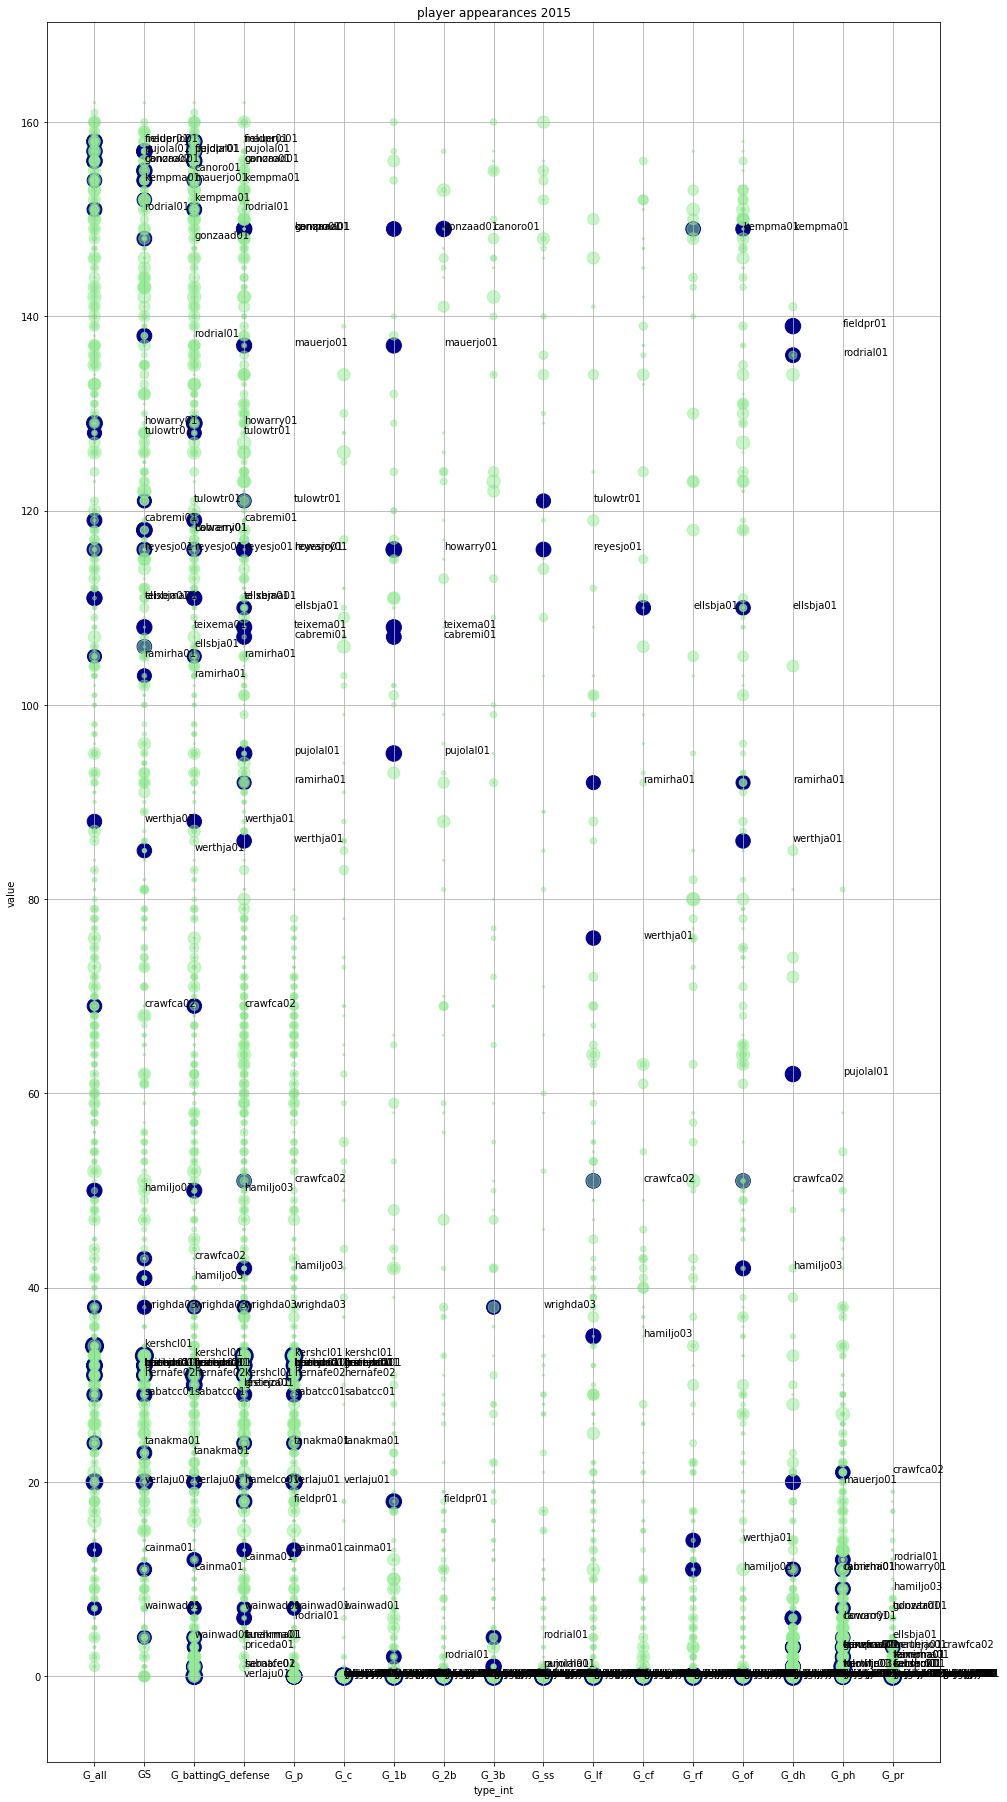

In [38]:
appearances_df = pd.read_csv('./baseballdatabank-master/core/Appearances.csv').set_index(['yearID'])
salary_club = 10000000
def draw_appearances_sal_plot(appear_df, year_salaries_df, yearID):
    df = appear_df.loc[yearID].groupby('playerID').sum()
    draw_df = df.stack()
    draw_df = draw_df.reset_index().rename(columns={'level_1':'type', 0:'value'}).set_index('playerID')
    type_defines = ['G_all', 'GS', 'G_batting', 'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 
                        'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr']
    def convert_type_to_int(row):
        result = {}
        
        result['type_int'] = type_defines.index(row['type'])
        return pd.Series(result)
    draw_df['type_int'] = draw_df.apply(lambda row: convert_type_to_int(row), axis=1)
    salaries_df = year_salaries_df.loc[yearID].set_index('playerID')[['salary']]
    #top = salary_club_great_than(year_salaries_df, yearID, salary_club)
    top = 30
    top_salaries_df = salaries_df.nlargest(top, 'salary')
    other_salaries_df = salaries_df.nsmallest(len(salaries_df.index)-top, 'salary')
    draw_df_1 = draw_df.join(top_salaries_df, how='right').reset_index()
    ax1 = draw_df_1.plot.scatter(x='type_int', y='value', s=draw_df_1.salary/100000,
                   figsize=(16, 32), grid=True, color='DarkBlue',
                   title = 'player appearances '+str(yearID))
    for i, row in draw_df_1.iterrows():
        ax1.text(row['type_int']+1, row['value'], row['playerID'])
    #ax1.set_xticks(range(0, len(type_defines)))
    #ax1.set_xticklabels(type_defines)
    draw_df_2 = draw_df.join(other_salaries_df, how='right').reset_index()
    ax2 = draw_df_2.plot.scatter(x='type_int', y='value', s=draw_df_2.salary/100000, ax=ax1,
                   figsize=(16, 32), grid=True, alpha=0.5, color='LightGreen',
                   title = 'player appearances '+str(yearID))
    ax2.set_xticks(range(0, len(type_defines)))
    ax2.set_xticklabels(type_defines)

    
    #df.plot.scatter(x='')
    #top_salaries_df = df.loc[yearID].nlargest(10, 'salary')
    #print top_salaries_df
    #title = 'player salary with age ' + str(yearID)
    #year_df.plot.scatter(x='age', y='salary', 
    #                         figsize=(16, 8), grid=True,
    #                    title = title)
    
draw_appearances_sal_plot(appearances_df, year_salaries_df, 2015)

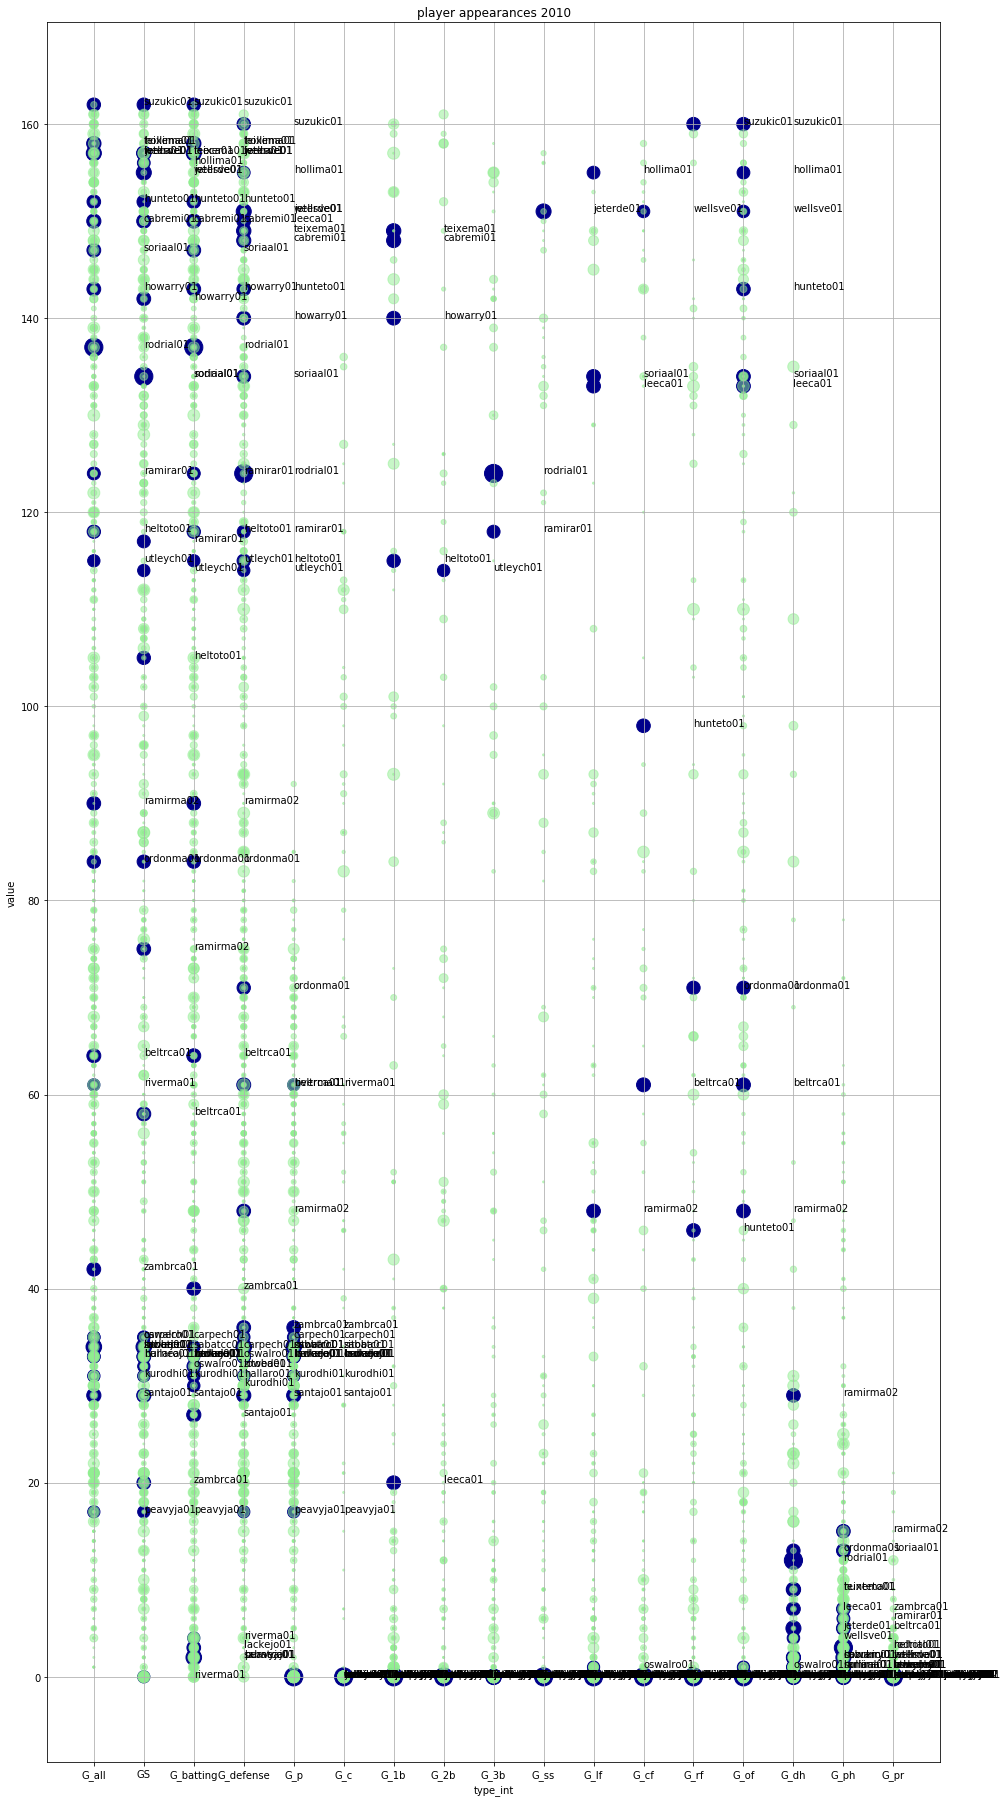

In [39]:
draw_appearances_sal_plot(appearances_df, year_salaries_df, 2010)

In [40]:
print ga_batting_df.swaplevel().loc[2015]

           stint    G     AB     R      H    2B   3B    HR    RBI    SB  \
playerID                                                                  
aardsda01      1   33    1.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
abadfe01       1   62    0.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
abreujo02      1  154  613.0  88.0  178.0  34.0  3.0  30.0  101.0   0.0   
achteaj01      1   11    0.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
ackledu01      3  108  238.0  28.0   55.0  11.0  3.0  10.0   30.0   2.0   
adamecr01      1   26   53.0   4.0   13.0   1.0  1.0   0.0    3.0   0.0   
adamsau01      1   28    1.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
adamsma01      1   60  175.0  14.0   42.0   9.0  0.0   5.0   24.0   1.0   
adcocna01      1   13    0.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
adriaeh01      1   52  113.0  11.0   21.0   7.0  1.0   0.0   11.0   3.0   
affelje01      1   52    2.0   0.0    0.0   0.0  0.0   0.0    0.0   0.0   
aguilje01      1    7   1

绘制场均 batting / salary 的相关图形

* result['gab_ab'] = row['AB']/games
* result['gab_h'] = row['H']/games
* result['gab_2b'] = row['2B']/games
* result['gab_3b'] = row['3B']/games
* result['gab_hr'] = row['HR']/games
* result['gab_rbi'] = row['RBI']/games
* result['gab_sb'] = row['SB']/games
* result['gab_cs'] = row['CS']/games
* result['gab_bb'] = row['3B']/games
* result['gab_so'] = row['SO']/games
* result['gab_ibb'] = row['IBB']/games
* result['gab_hbp'] = row['HBP']/games
* result['gab_sh'] = row['SH']/games
* result['gab_sf'] = row['SF']/games
* result['gab_gidp'] = row['GIDP']/games

In [41]:

def find_ga_cols(df):
    import re
    result = []
    for col in df.columns:
        if re.match('ga\w_.*', col):
            result.append(col)
    return result        

In [42]:

    
def draw_gameavg_sal_plot_impl(gameavg_df, year_salaries_df, yearID, title, gameavg_df_cols):
    cols = gameavg_df_cols
    df = gameavg_df.swaplevel().loc[yearID][cols]
    print df
    draw_df = df.stack()
    draw_df = draw_df.reset_index().rename(columns={'level_1':'type', 0:'value'}).set_index('playerID')
    type_defines = cols
    def convert_type_to_int(row):
        result = {}    
        result['type_int'] = type_defines.index(row['type'])
        return pd.Series(result)
    draw_df['type_int'] = draw_df.apply(lambda row: convert_type_to_int(row), axis=1)
    salaries_df = year_salaries_df.loc[yearID].set_index('playerID')[['salary']]
    top = 30
    top_salaries_df = salaries_df.nlargest(top, 'salary')
    other_salaries_df = salaries_df.nsmallest(len(salaries_df.index)-top, 'salary')
    draw_df_1 = draw_df.join(top_salaries_df, how='inner').reset_index()
    print draw_df_1
    ax1 = draw_df_1.plot.scatter(x='type_int', y='value', s=draw_df_1.salary/100000,
                   figsize=(16, 32), grid=True, color='DarkBlue',
                   title = 'player game a '+str(yearID))
    for i, row in draw_df_1.iterrows():
        ax1.text(row['type_int']+0.2, row['value'], row['playerID'])
    #ax1.set_xticks(range(0, len(type_defines)))
    #ax1.set_xticklabels(type_defines)
    draw_df_2 = draw_df.join(other_salaries_df, how='inner').reset_index()
    ax2 = draw_df_2.plot.scatter(x='type_int', y='value', s=draw_df_2.salary/100000, ax=ax1,
                   figsize=(16, 32), grid=True, alpha=0.5, color='LightGreen',
                   title = title + ' '+ str(yearID))
    ax2.set_xticks(range(0, len(type_defines)))
    ax2.set_xticklabels(type_defines)
    

def draw_gameavg_sal_plot(gameavg_df, year_salaries_df, yearID, title):
    max_cols = 16
    cols = find_ga_cols(gameavg_df)
    if len(cols) <= max_cols:
        draw_gameavg_sal_plot_impl(gameavg_df, year_salaries_df, yearID, title, cols)
        return
    
    index = 1
    slice_num = int(round(len(cols)/float(max_cols)))
    slice_unit = len(cols)/slice_num
    slice_rem = len(cols)%slice_num
    start = end = 0
    while index < slice_num+1:
        size = slice_unit
        if slice_rem > 0:
            size += 1
            slice_rem -= 1
        end = start + size
        draw_gameavg_sal_plot_impl(gameavg_df, year_salaries_df, yearID, title+'-'+str(index), cols[start:end])
        start = end
        index += 1
    
    
    


             gab_2b    gab_3b    gab_ab    gab_bb    gab_cs  gab_gidp  \
playerID                                                                
aardsda01  0.000000  0.000000  0.030303  0.000000  0.000000  0.000000   
abadfe01   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abreujo02  0.220779  0.019481  3.980519  0.019481  0.000000  0.103896   
achteaj01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ackledu01  0.101852  0.027778  2.203704  0.027778  0.018519  0.027778   
adamecr01  0.038462  0.038462  2.038462  0.038462  0.038462  0.000000   
adamsau01  0.000000  0.000000  0.035714  0.000000  0.000000  0.035714   
adamsma01  0.150000  0.000000  2.916667  0.000000  0.000000  0.016667   
adcocna01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
adriaeh01  0.134615  0.019231  2.173077  0.019231  0.038462  0.038462   
affelje01  0.000000  0.000000  0.038462  0.000000  0.000000  0.000000   
aguilje01  0.142857  0.000000  2.714286  0.000000  

      playerID      type     value  type_int    salary
0    buehrma01    gab_2b  0.000000         0  20000000
1    buehrma01    gab_3b  0.000000         1  20000000
2    buehrma01    gab_ab  0.218750         2  20000000
3    buehrma01    gab_bb  0.000000         3  20000000
4    buehrma01    gab_cs  0.000000         4  20000000
5    buehrma01  gab_gidp  0.000000         5  20000000
6    buehrma01     gab_h  0.031250         6  20000000
7    buehrma01   gab_hbp  0.000000         7  20000000
8    buehrma01    gab_hr  0.000000         8  20000000
9    buehrma01   gab_ibb  0.000000         9  20000000
10   buehrma01   gab_rbi  0.000000        10  20000000
11   buehrma01    gab_sb  0.000000        11  20000000
12   buehrma01    gab_sf  0.000000        12  20000000
13   buehrma01    gab_sh  0.031250        13  20000000
14   buehrma01    gab_so  0.093750        14  20000000
15   cabremi01    gab_2b  0.235294         0  22000000
16   cabremi01    gab_3b  0.008403         1  22000000
17   cabre

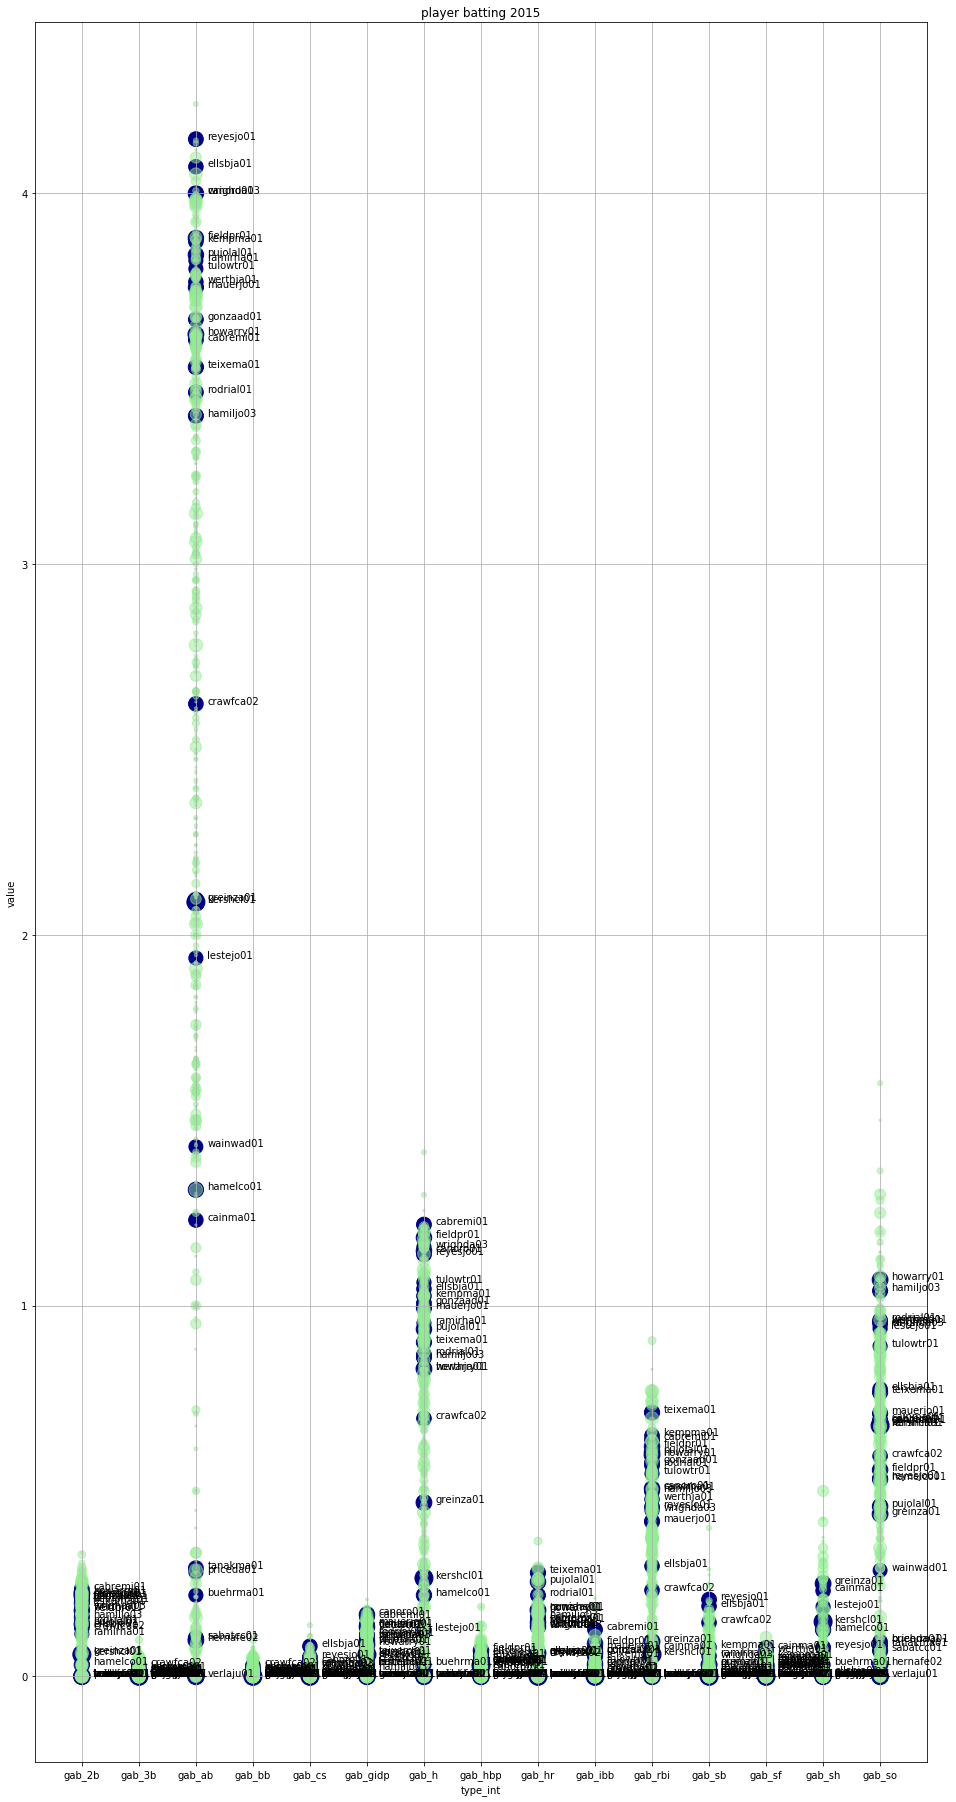

In [43]:
draw_gameavg_sal_plot(ga_batting_df, year_salaries_df, 2015, 'player batting')

             gab_2b    gab_3b    gab_ab    gab_bb    gab_cs  gab_gidp  \
playerID                                                                
aardsda01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abadfe01   0.000000  0.000000  0.045455  0.000000  0.000000  0.000000   
abreubo01  0.266234  0.006494  3.720779  0.006494  0.064935  0.084416   
abreuto01  0.135802  0.012346  2.382716  0.012346  0.012346  0.098765   
accarje01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aceveal01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acostma01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
adamsmi03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
affelje01  0.000000  0.000000  0.018868  0.000000  0.000000  0.000000   
albaljo01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
alberma01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aldrico01  0.000000  0.200000  2.600000  0.200000  

      playerID      type     value  type_int    salary
0    beltrca01    gab_2b  0.171875         0  19401569
1    beltrca01    gab_3b  0.046875         1  19401569
2    beltrca01    gab_ab  3.437500         2  19401569
3    beltrca01    gab_bb  0.046875         3  19401569
4    beltrca01    gab_cs  0.015625         4  19401569
5    beltrca01  gab_gidp  0.062500         5  19401569
6    beltrca01     gab_h  0.875000         6  19401569
7    beltrca01   gab_hbp  0.015625         7  19401569
8    beltrca01    gab_hr  0.109375         8  19401569
9    beltrca01   gab_ibb  0.078125         9  19401569
10   beltrca01   gab_rbi  0.421875        10  19401569
11   beltrca01    gab_sb  0.046875        11  19401569
12   beltrca01    gab_sf  0.062500        12  19401569
13   beltrca01    gab_sh  0.000000        13  19401569
14   beltrca01    gab_so  0.609375        14  19401569
15   burneaj01    gab_2b  0.000000         0  16500000
16   burneaj01    gab_3b  0.000000         1  16500000
17   burne

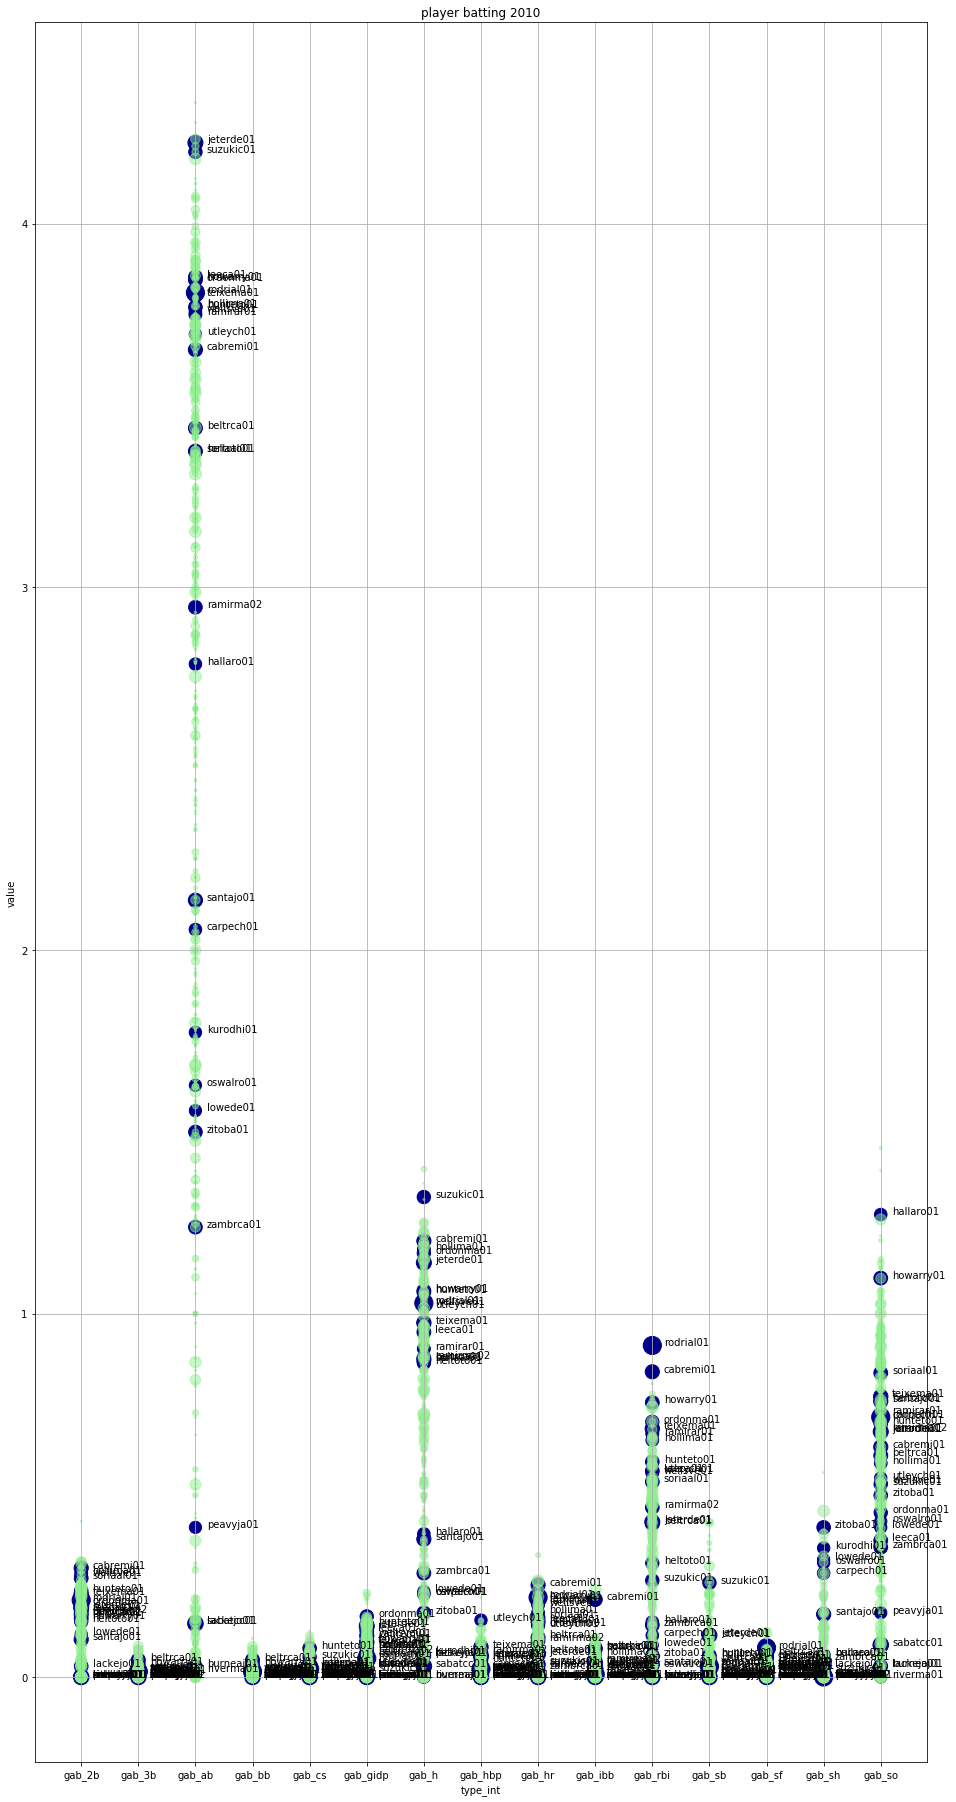

In [44]:
draw_gameavg_sal_plot(ga_batting_df, year_salaries_df, 2010, 'player batting')

           gap_baopp    gap_bb    gap_bfp    gap_bk  gap_completed    gap_era  \
playerID                                                                        
aardsda01   0.006697  0.424242   3.909091  0.000000            0.0   0.142424   
abadfe01    0.004048  0.306452   3.306452  0.000000            0.0   0.066935   
achteaj01   0.021000  0.545455   5.272727  0.000000            0.0   0.613636   
adamsau01   0.009857  0.464286   5.321429  0.000000            0.0   0.135000   
adcocna01   0.017000  0.923077   6.384615  0.000000            0.0   0.461538   
affelje01   0.005635  0.269231   3.134615  0.000000            0.0   0.112692   
alberan01   0.111000  2.000000  11.000000  0.000000            0.0   3.380000   
alberma01   0.007600  0.300000   4.966667  0.000000            0.0   0.040333   
albural01   0.004015  0.492537   4.044776  0.059701            0.0   0.062836   
alexasc01   0.059500  0.750000   6.250000  0.000000            0.0   1.125000   
allenco01   0.003129  0.3571

      playerID           type      value  type_int    salary
0    buehrma01      gap_baopp   0.008719         0  20000000
1    buehrma01         gap_bb   1.031250         1  20000000
2    buehrma01        gap_bfp  25.843750         2  20000000
3    buehrma01         gap_bk   0.000000         3  20000000
4    buehrma01  gap_completed   4.000000         4  20000000
5    buehrma01        gap_era   0.119063         5  20000000
6    buehrma01      gap_games  32.000000         6  20000000
7    buehrma01         gap_gf   0.000000         7  20000000
8    buehrma01       gap_gidp   0.000000         8  20000000
9    buehrma01          gap_h   6.687500         9  20000000
10   buehrma01        gap_hbp   0.218750        10  20000000
11   buehrma01         gap_hr   0.687500        11  20000000
12    cainma01      gap_baopp   0.022538         0  21000000
13    cainma01         gap_bb   1.538462         1  21000000
14    cainma01        gap_bfp  20.846154         2  21000000
15    cainma01         g

      playerID         type      value  type_int    salary
0    buehrma01      gap_ibb   0.125000         0  20000000
1    buehrma01   gap_ipouts  18.625000         1  20000000
2    buehrma01   gap_losses   8.000000         2  20000000
3    buehrma01        gap_r   3.125000         3  20000000
4    buehrma01       gap_sf   0.281250         4  20000000
5    buehrma01       gap_sh   0.312500         5  20000000
6    buehrma01      gap_sho   0.031250         6  20000000
7    buehrma01       gap_so   2.843750         7  20000000
8    buehrma01  gap_started  32.000000         8  20000000
9    buehrma01       gap_sv   0.000000         9  20000000
10   buehrma01     gap_wins  15.000000        10  20000000
11   buehrma01       gap_wp   0.000000        11  20000000
12    cainma01      gap_ibb   0.000000         0  21000000
13    cainma01   gap_ipouts  14.000000         1  21000000
14    cainma01   gap_losses   4.000000         2  21000000
15    cainma01        gap_r   3.000000         3  210000

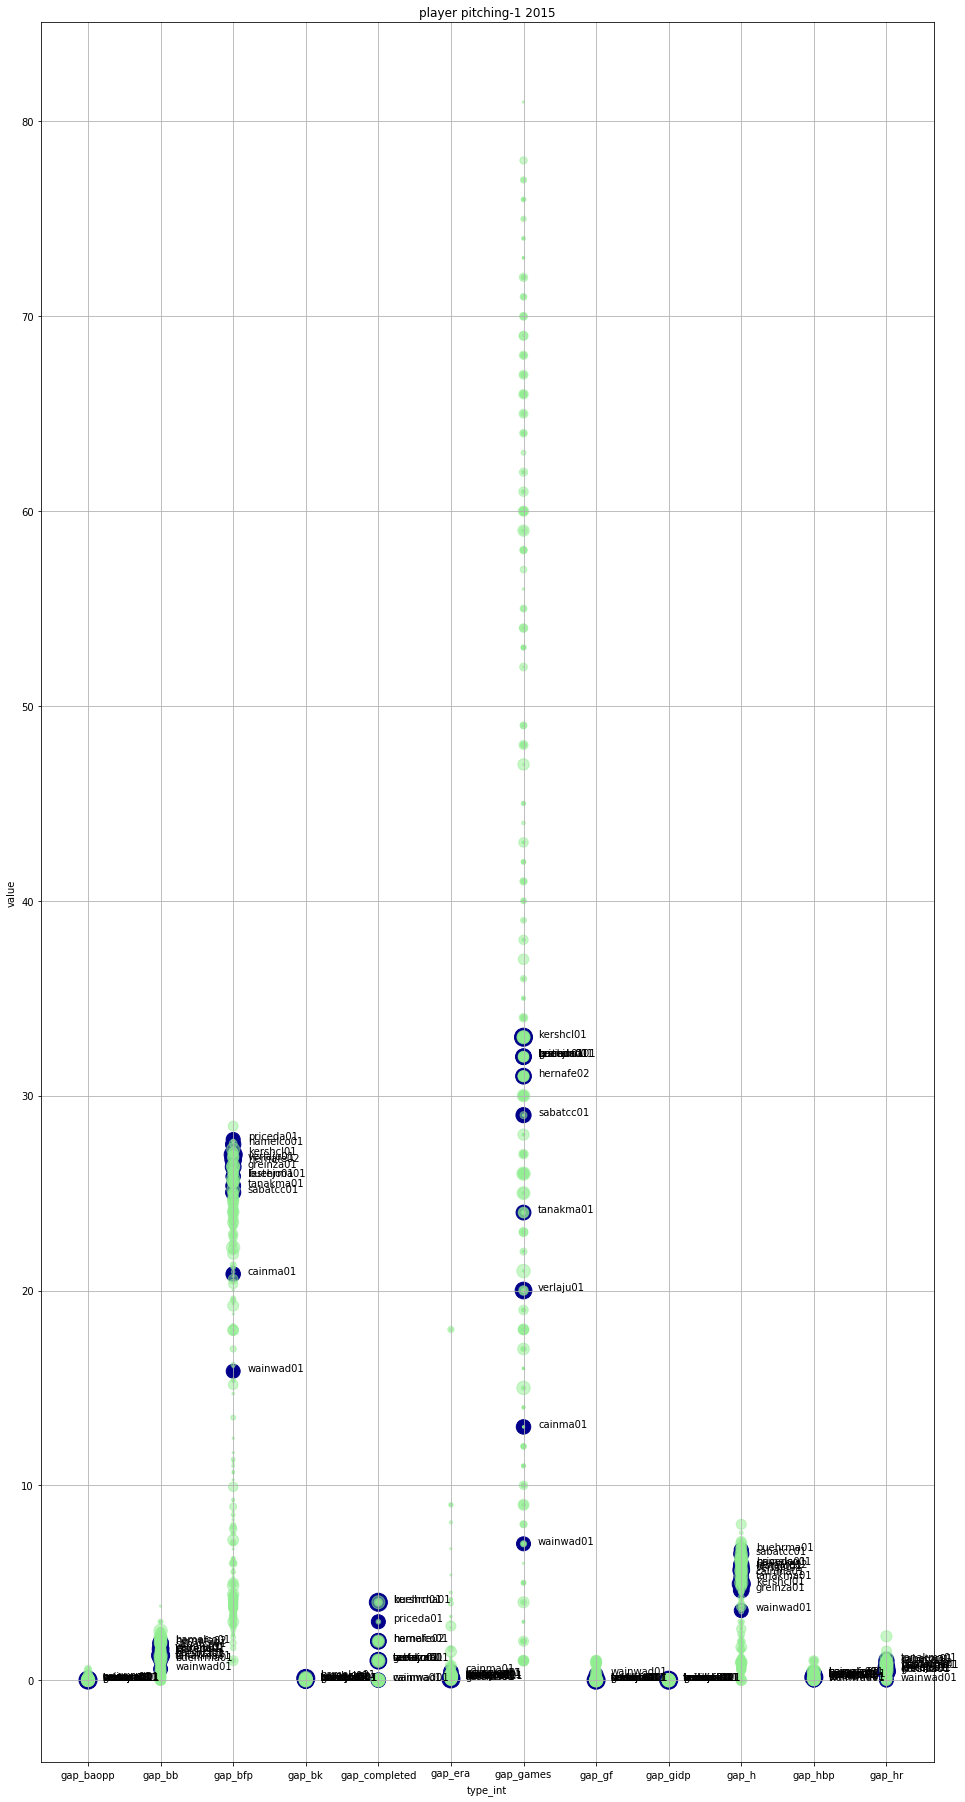

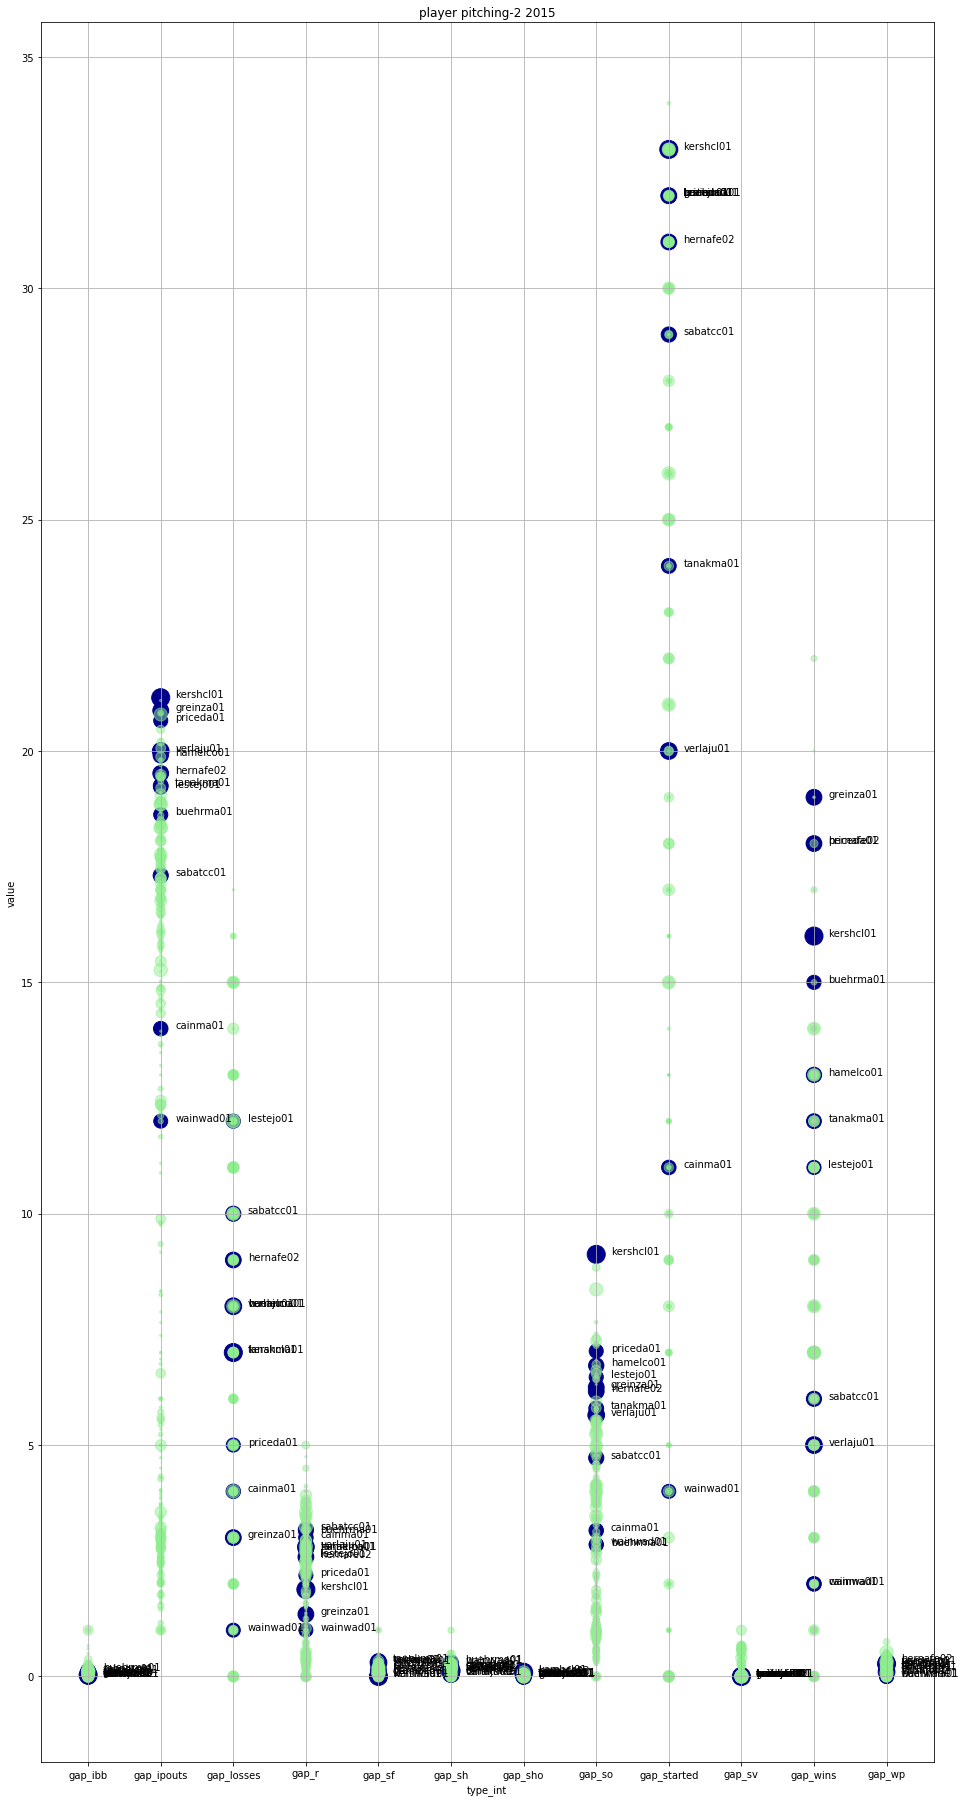

In [45]:
draw_gameavg_sal_plot(ga_pitching_df, year_salaries_df, 2015, 'player pitching')

           gap_baopp    gap_bb    gap_bfp    gap_bk  gap_completed    gap_era  \
playerID                                                                        
aardsda01   0.003736  0.471698   3.811321  0.000000            0.0   0.064906   
abadfe01    0.009091  0.227273   3.454545  0.000000            0.0   0.129091   
accarje01   0.080000  0.600000   6.800000  0.000000            0.0   1.620000   
aceveal01   0.020800  0.400000   5.300000  0.000000            0.0   0.300000   
acostma01   0.005341  0.439024   3.829268  0.000000            0.0   0.071951   
adamsmi03   0.002800  0.328571   3.828571  0.000000            0.0   0.025143   
affelje01   0.005472  0.452830   4.301887  0.000000            0.0   0.078113   
albaljo01   0.023100  0.800000   5.000000  0.000000            0.0   0.397000   
alberma01   0.004339  0.548387   5.306452  0.000000            0.0   0.072903   
ambrihe01   0.009941  0.500000   6.588235  0.000000            0.0   0.164412   
anderbr04   0.013526  1.1578

      playerID           type      value  type_int    salary
0    burneaj01      gap_baopp   0.008636         0  16500000
1    burneaj01         gap_bb   2.363636         1  16500000
2    burneaj01        gap_bfp  25.121212         2  16500000
3    burneaj01         gap_bk   0.000000         3  16500000
4    burneaj01  gap_completed   1.000000         4  16500000
5    burneaj01        gap_era   0.159394         5  16500000
6    burneaj01      gap_games  33.000000         6  16500000
7    burneaj01         gap_gf   0.000000         7  16500000
8    burneaj01       gap_gidp   0.000000         8  16500000
9    burneaj01          gap_h   6.181818         9  16500000
10   burneaj01        gap_hbp   0.575758        10  16500000
11   burneaj01         gap_hr   0.757576        11  16500000
12   carpech01      gap_baopp   0.006971         0  15840971
13   carpech01         gap_bb   1.800000         1  15840971
14   carpech01        gap_bfp  27.685714         2  15840971
15   carpech01         g

      playerID         type      value  type_int    salary
0    burneaj01      gap_ibb   0.060606         0  16500000
1    burneaj01   gap_ipouts  16.969697         1  16500000
2    burneaj01   gap_losses  15.000000         2  16500000
3    burneaj01        gap_r   3.575758         3  16500000
4    burneaj01       gap_sf   0.303030         4  16500000
5    burneaj01       gap_sh   0.212121         5  16500000
6    burneaj01      gap_sho   0.000000         6  16500000
7    burneaj01       gap_so   4.393939         7  16500000
8    burneaj01  gap_started  33.000000         8  16500000
9    burneaj01       gap_sv   0.000000         9  16500000
10   burneaj01     gap_wins  10.000000        10  16500000
11   burneaj01       gap_wp   0.484848        11  16500000
12   carpech01      gap_ibb   0.114286         0  15840971
13   carpech01   gap_ipouts  20.142857         1  15840971
14   carpech01   gap_losses   9.000000         2  15840971
15   carpech01        gap_r   2.828571         3  158409

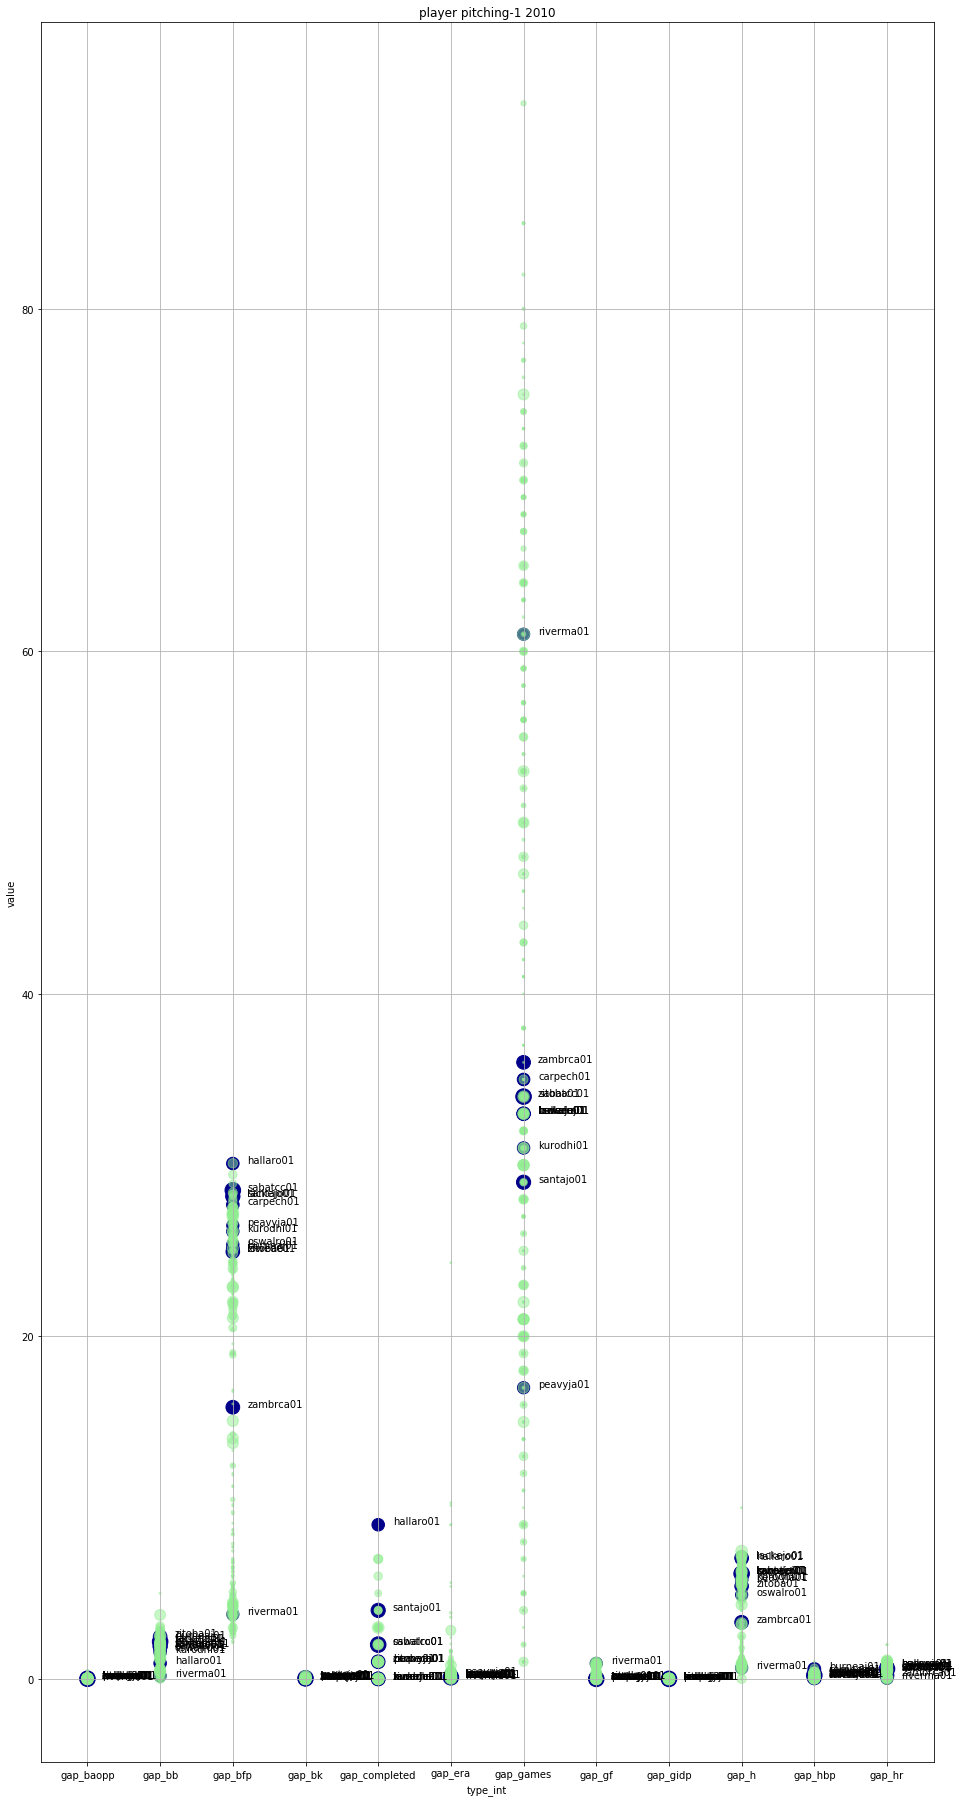

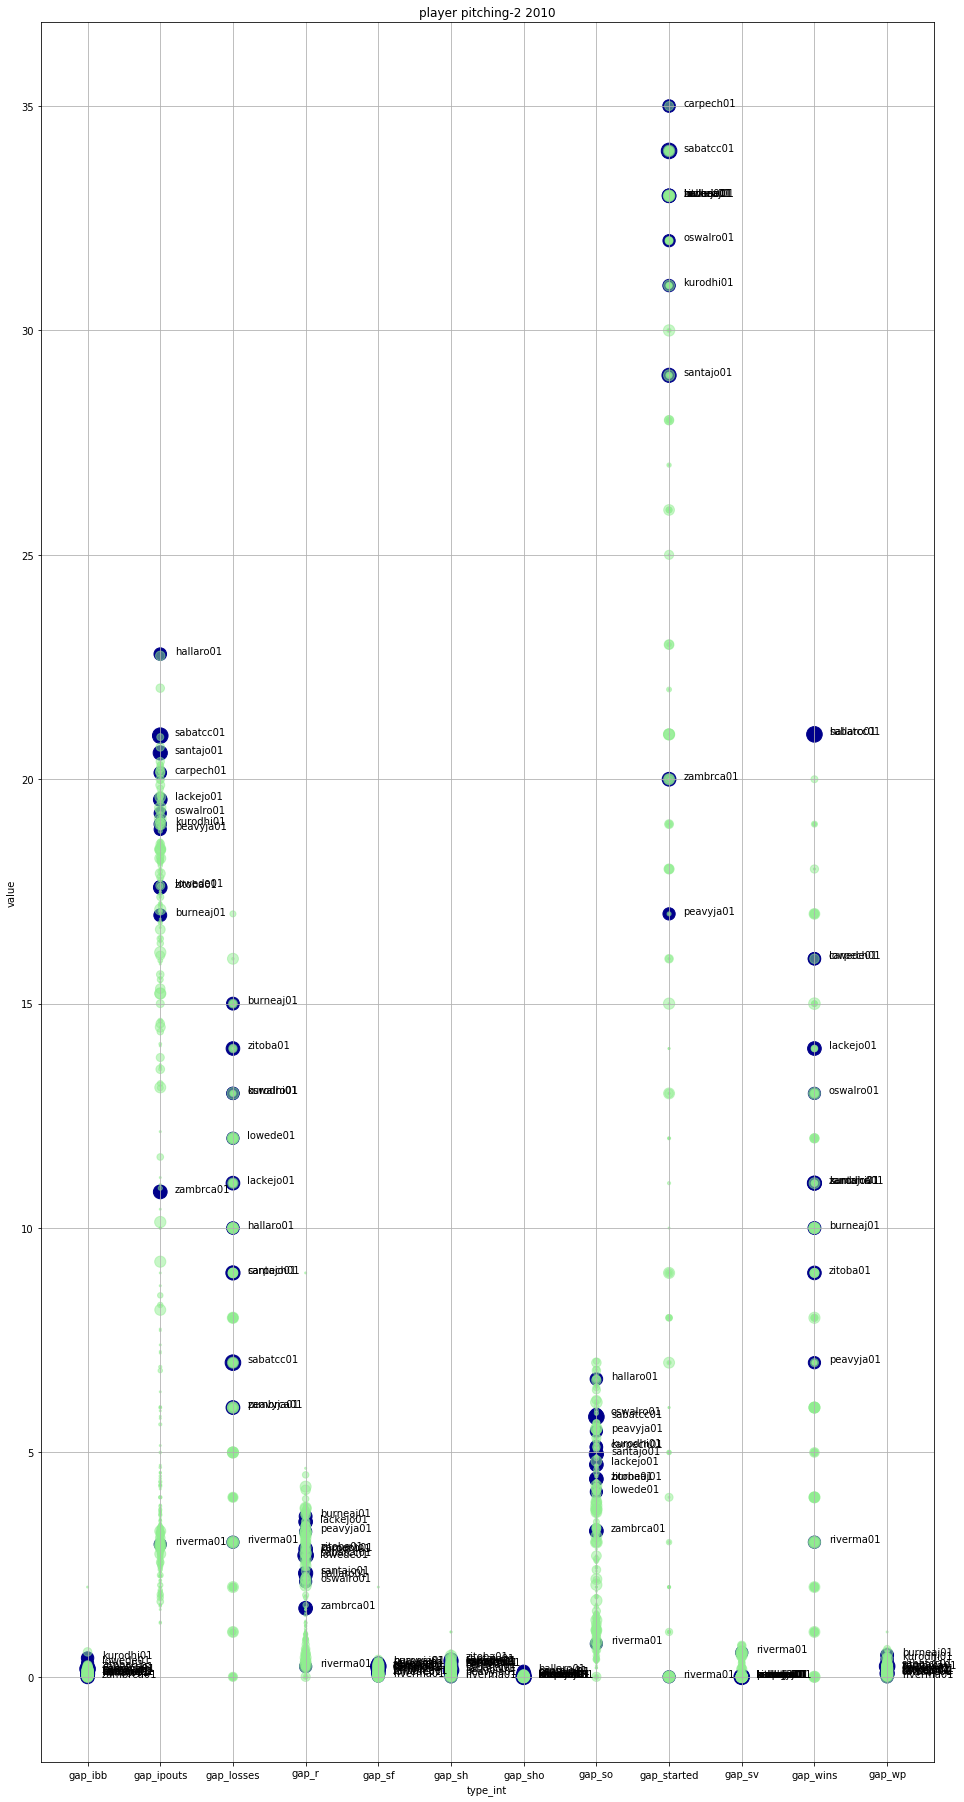

In [46]:
draw_gameavg_sal_plot(ga_pitching_df, year_salaries_df, 2010, 'player pitching')

显示球员统计的每项的箱形图，并对比顶薪球员和其他球员的图形

In [47]:
def gameavg_subplot_impl(salary_top, gameavg_df, year_salaries_df, yearID, gameavg_col, fig, inner_grid):
    salaries_df = year_salaries_df.loc[yearID].set_index('playerID')[['salary']]
    top = salary_top
    top_salaries_df = salaries_df.nlargest(top, 'salary')
    other_salaries_df = salaries_df.nsmallest(len(salaries_df.index)-top, 'salary')
    gameavg_df = gameavg_df.loc[yearID].set_index('playerID')[[gameavg_col]]
    sample1_df = gameavg_df.join(top_salaries_df, how='inner')
    sample2_df = gameavg_df.join(other_salaries_df, how='inner')
    max1 = sample1_df[gameavg_col].max()
    max2 = sample2_df[gameavg_col].max()
    max_yval = max1
    if max1 < max2:
        max_yval = max2
    
    ax = plt.Subplot(fig, inner_grid[0])
    fig.add_subplot(sample1_df[[gameavg_col]].plot.box(ax=ax, color='r', sharey=True, title=gameavg_col+' of top '+str(salary_top)))
    ax.set_ylim([0, max_yval])
    ax = plt.Subplot(fig, inner_grid[1])
    fig.add_subplot(sample2_df[[gameavg_col]].plot.box(ax=ax, color='b', sharey=True, title=gameavg_col+' of other'))
    ax.set_ylim([0, max_yval])
    return
    

def gameavg_plots(salary_top, gameavg_df, year_salaries_df, yearID, title):
    import matplotlib.gridspec as gridspec
    print 'gameavg plots for ', title
    cols = find_ga_cols(gameavg_df)
    if len(cols) == 0:
        return
    ncols = 4
    nrows = len(cols) / ncols
    if len(cols) % ncols:
        nrows += 1
    fig = plt.figure(figsize=(25, 32))
    outer = gridspec.GridSpec(nrows, ncols, wspace=0.2, hspace=0.2)
    #fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,32))
    
    gameavg_df = gameavg_df.reset_index().set_index('yearID')
    for idx, col in enumerate(cols):
        #rows_idx = idx / ncols
        #cols_idx = idx % ncols
        inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[idx], wspace=0.1, hspace=0.1)
        gameavg_subplot_impl(salary_top, gameavg_df, year_salaries_df, yearID, col, fig, inner)
        
    
    

gameavg plots for  player batting


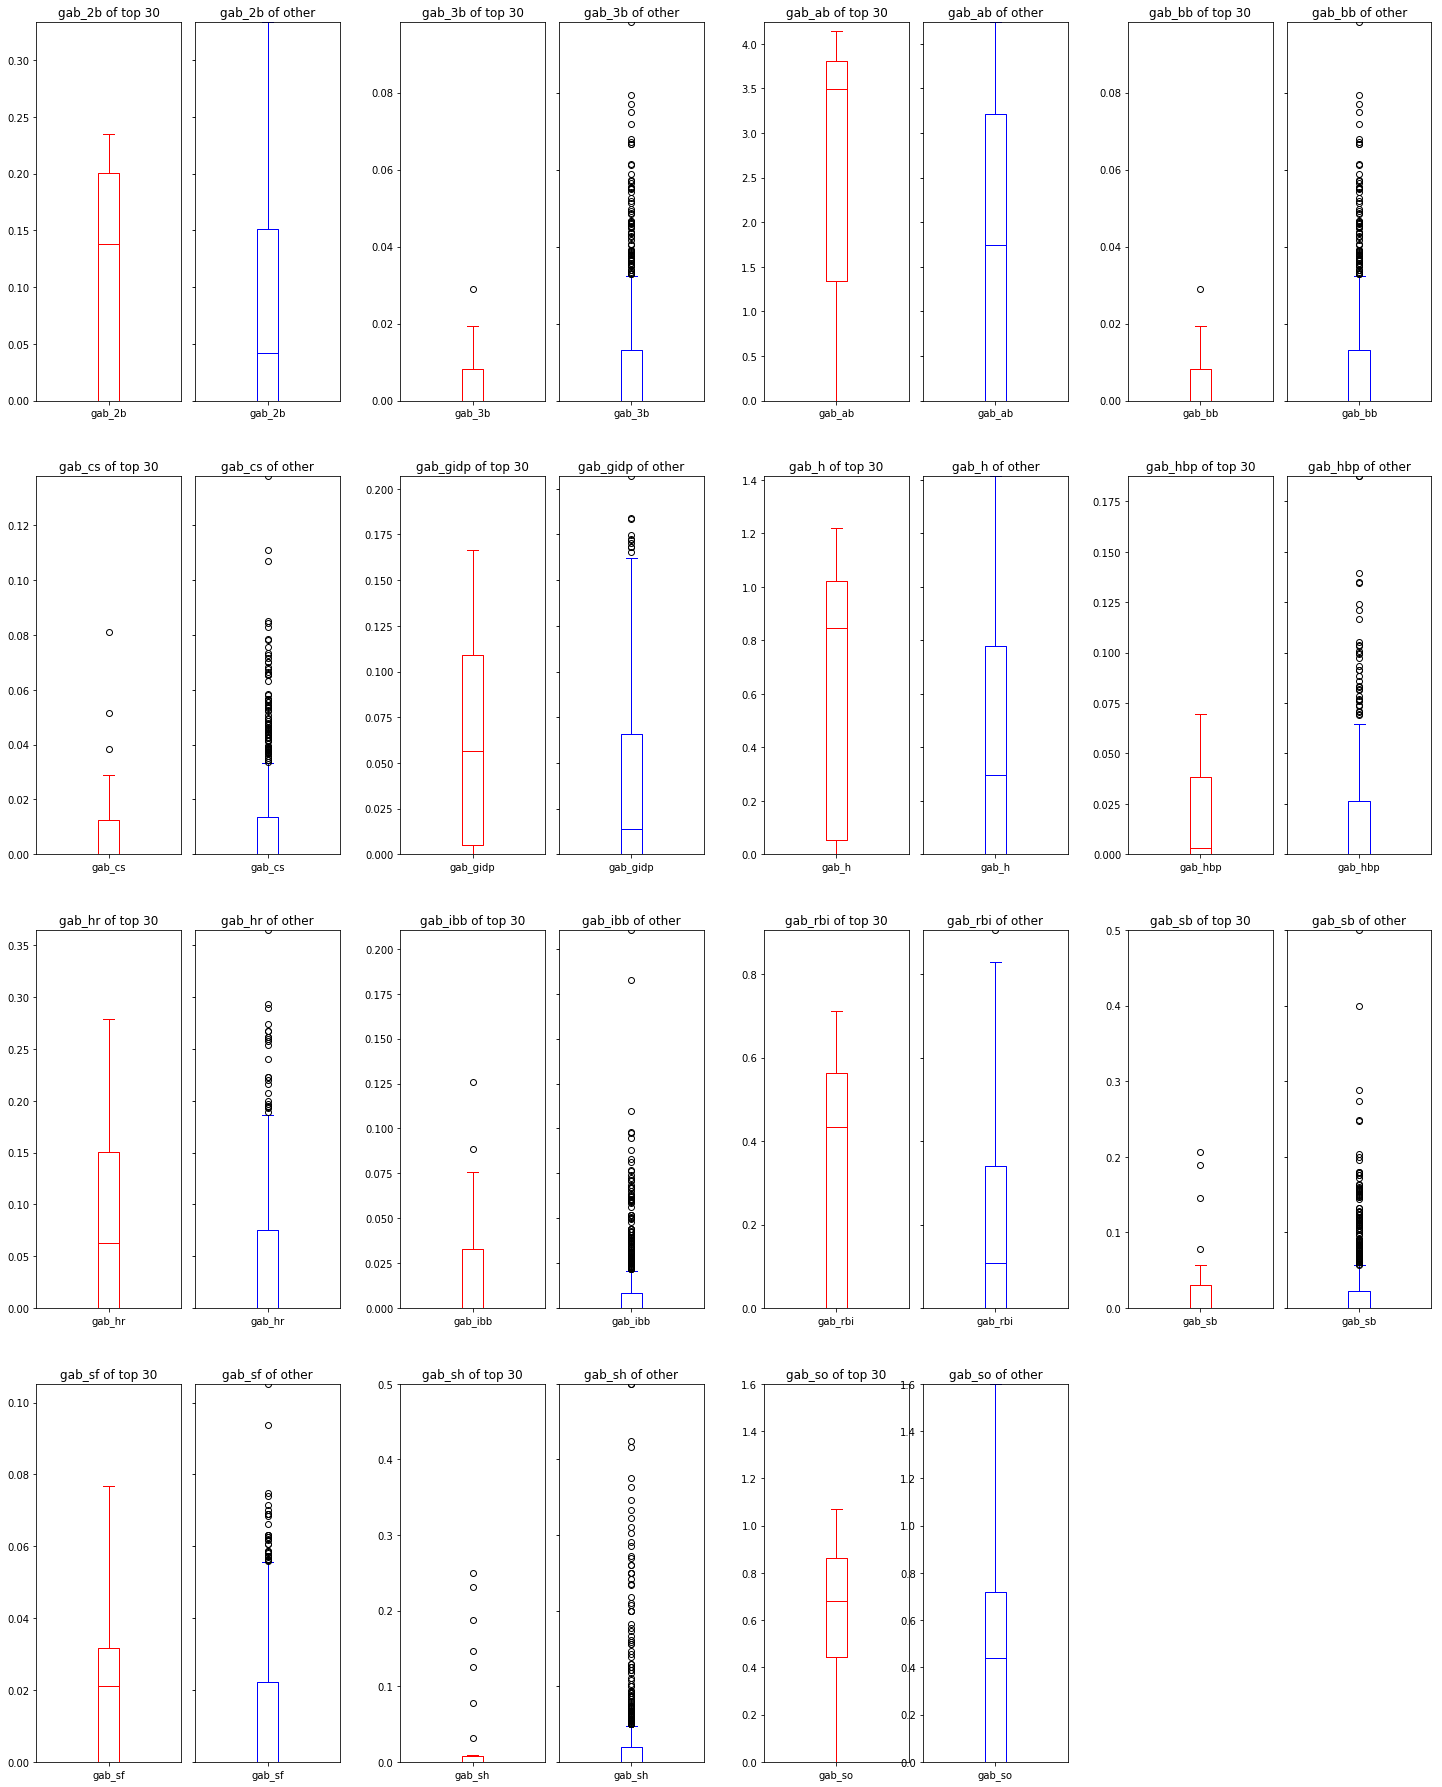

In [48]:
gameavg_plots(30, ga_batting_df, year_salaries_df, 2015, 'player batting')





gameavg plots for  player pitching


/opt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


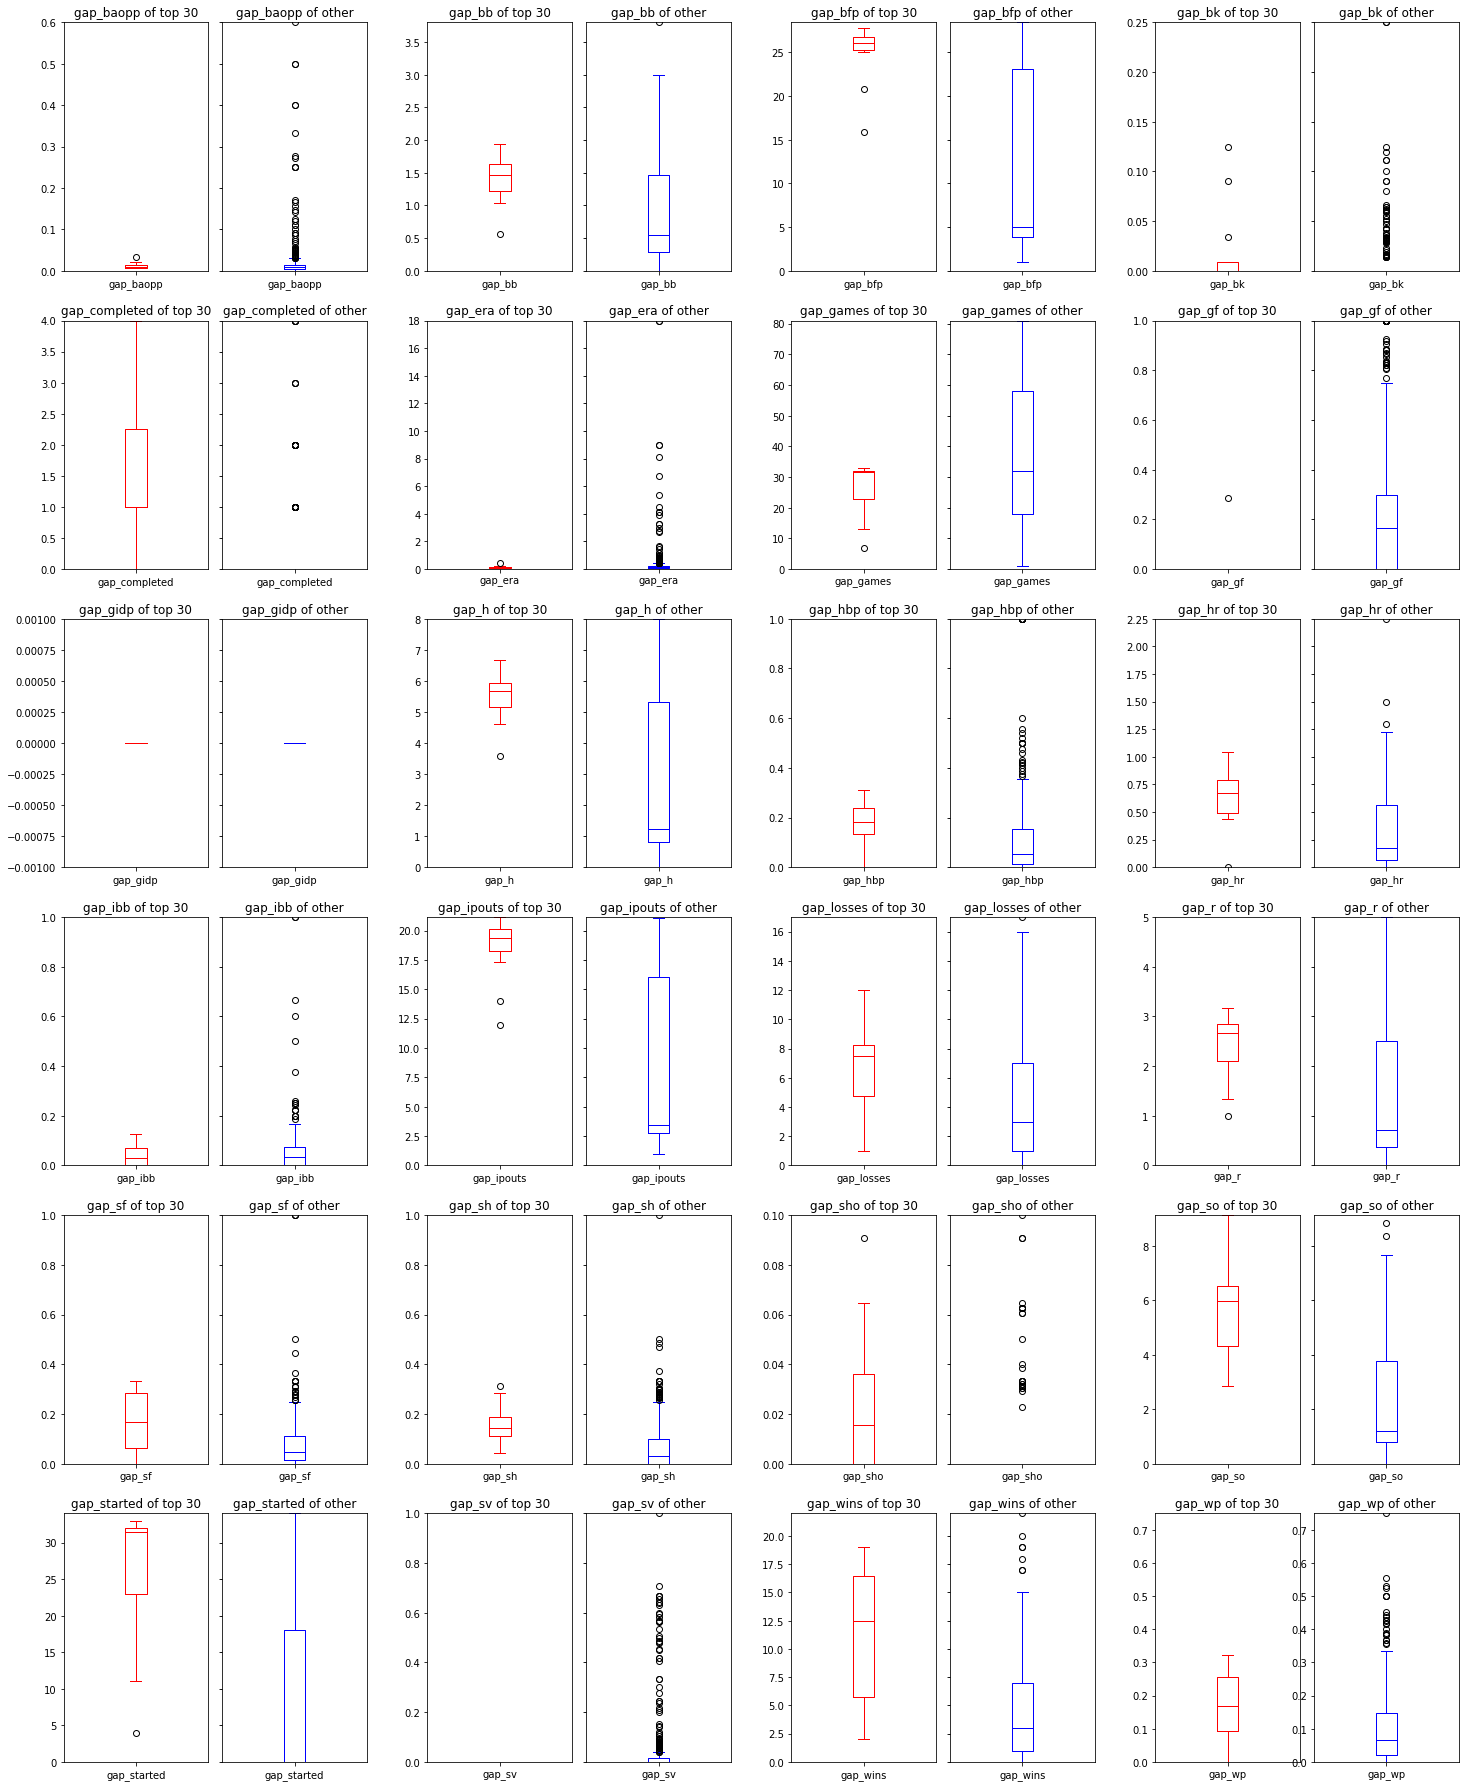

In [49]:
gameavg_plots(30, ga_pitching_df, year_salaries_df, 2015, 'player pitching')

gameavg plots for  player fielding


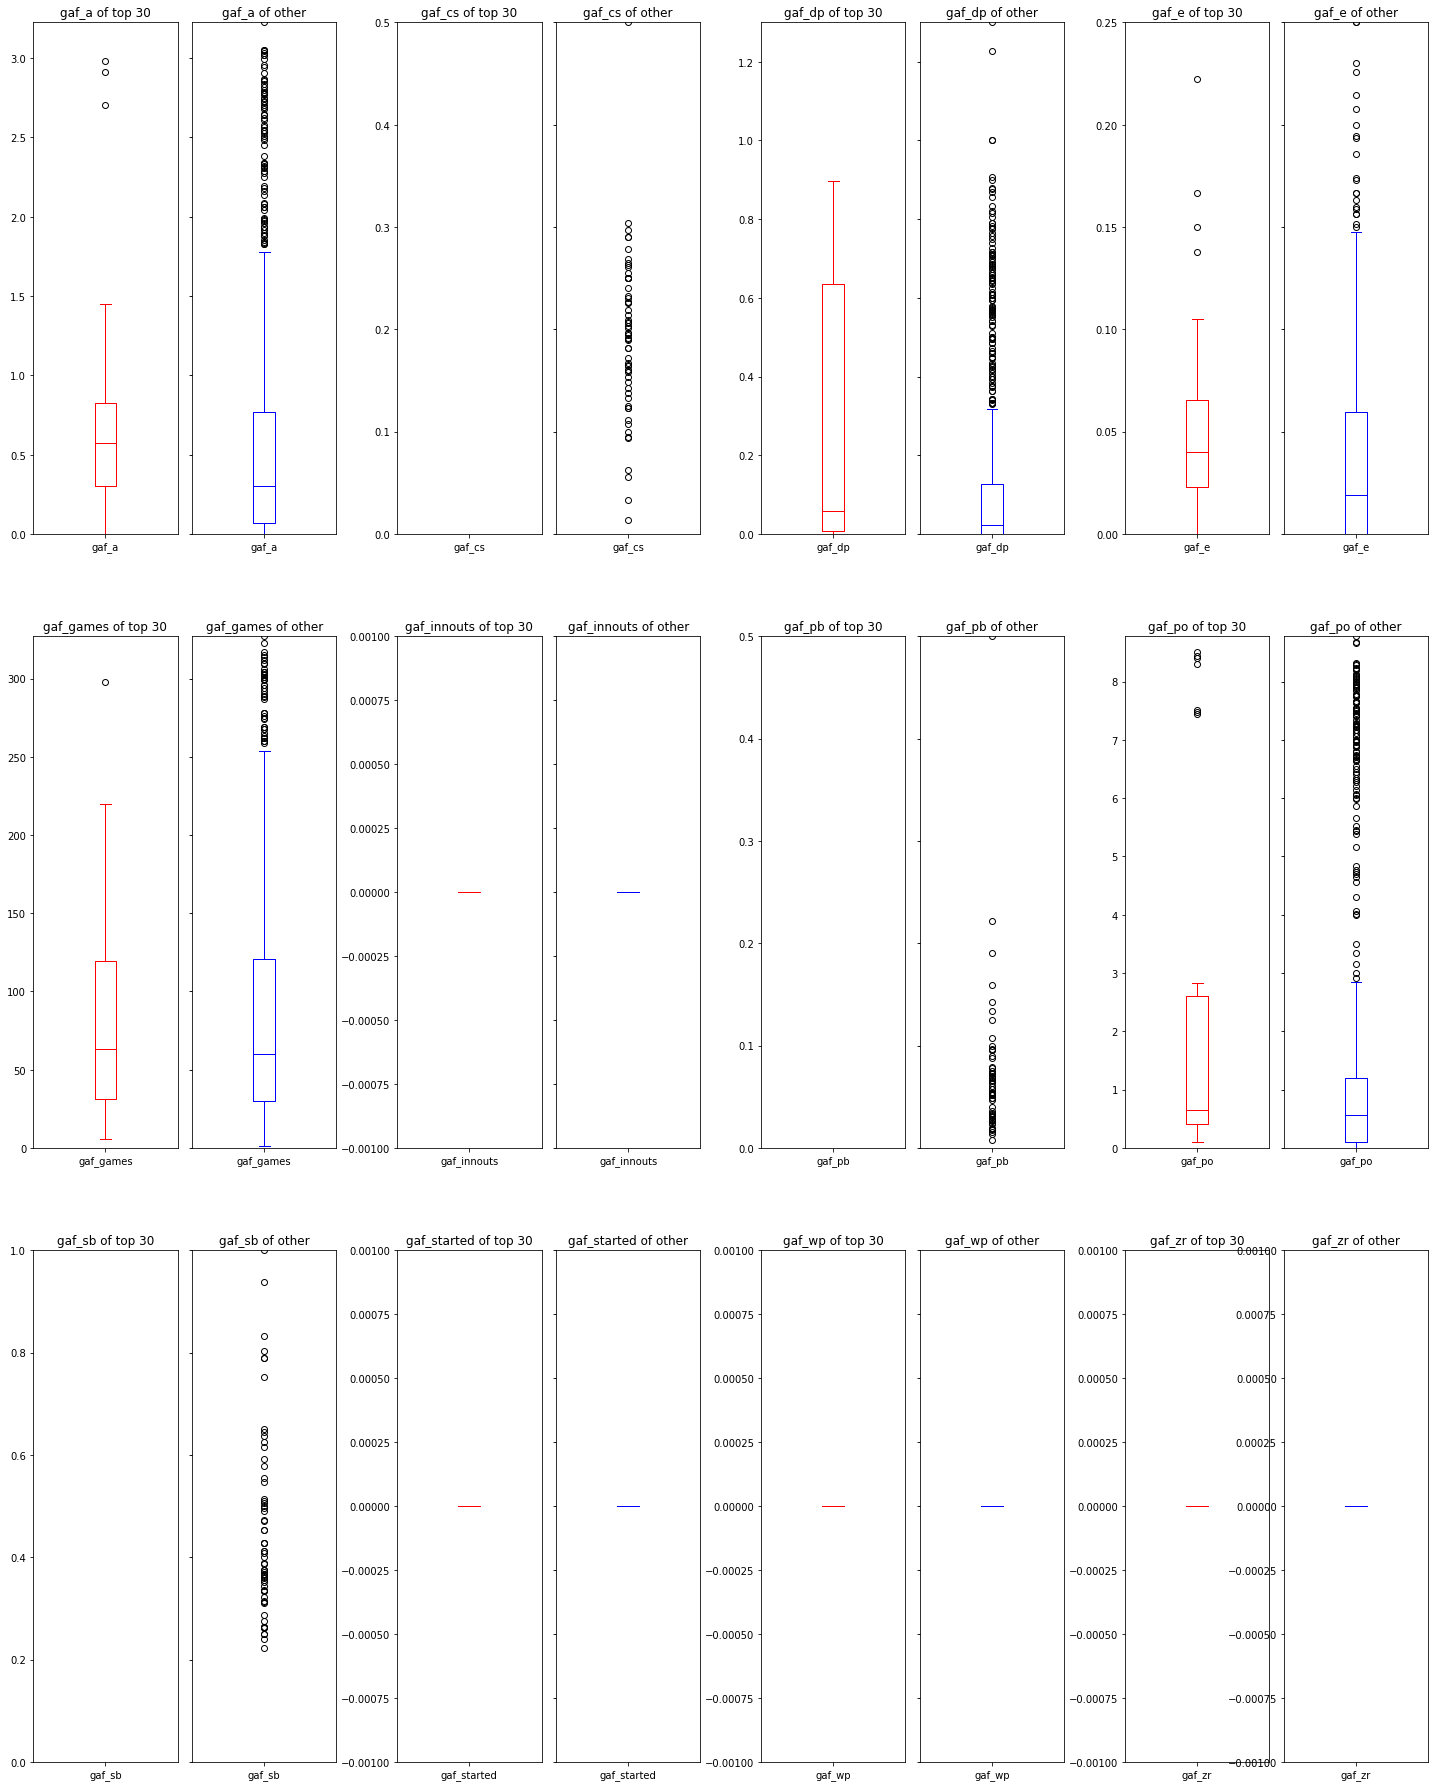

In [50]:
gameavg_plots(30, ga_fielding_df, year_salaries_df, 2015, 'player fielding')

### 高薪球员的主要特点是什么？

绘制了两种图形，试图通过图形观察来回答这个问题。

* 第一种图形是散点图的一种，绘制了一个赛季每名球员各项指标的场均值的坐标图。横坐标是赛季表现指标的名称，纵坐标是场均值，每个点是一个球员。点的大小是球员薪资水平，处于TOP 30以上的球员以蓝色表示，其他球员以绿色表示。
观察发现部分指标的头部明显集中出现TOP 30以上的球员，而部分指标明显没有TOP 30以上的球员

* 第二种图形是箱形图，对比了TOP 30球员和其他球员。TOP 30球员的图形以红色表示，其他球员以蓝色表示。
观察发现大部份指标，TOP 30球员的均值达到或者超过了其他球员的75%水平。





In [101]:
def combine_all_gameavg_stats(gameavg_df_list, yearID):
    filtered_df_list = []
    for gameavg_df in gameavg_df_list:
        cols = find_ga_cols(gameavg_df)
        df = gameavg_df.swaplevel().loc[yearID][cols]
        filtered_df_list.append(df)
    df = filtered_df_list[0]
    for idx, df1 in enumerate(filtered_df_list[1:]):
        df = df.join(df1, how="inner", rsuffix=str(idx))
    return df


# plot_corr copy from stackoverflow: https://stackoverflow.com/a/31384328
def plot_corr(corr_df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr_df, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(corr_df.columns)), corr_df.columns);
    plt.yticks(range(len(corr_df.columns)), corr_df.columns);
    

def analyse_gameavg_corr(gameavg_df, yearID, title):
    cols = find_ga_cols(gameavg_df)
    df = gameavg_df.swaplevel().loc[yearID][cols]
    plot_corr(df.corr(), size=25)
    
def analyse_all_gameavg_corr(gameavg_df_list, yearID, title):
    df = combine_all_gameavg_stats(gameavg_df_list, yearID)
    corr_df = df.corr()
    plot_corr(corr_df, size=40)

    
def sort_all_gameavg_corr(gameavg_df_list, yearID, title):
    df = combine_all_gameavg_stats(gameavg_df_list, yearID)
    print title
    print get_top_abs_correlations(df, 50)
    
### The two functions copy from https://stackoverflow.com/a/41453817
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
    
    
    

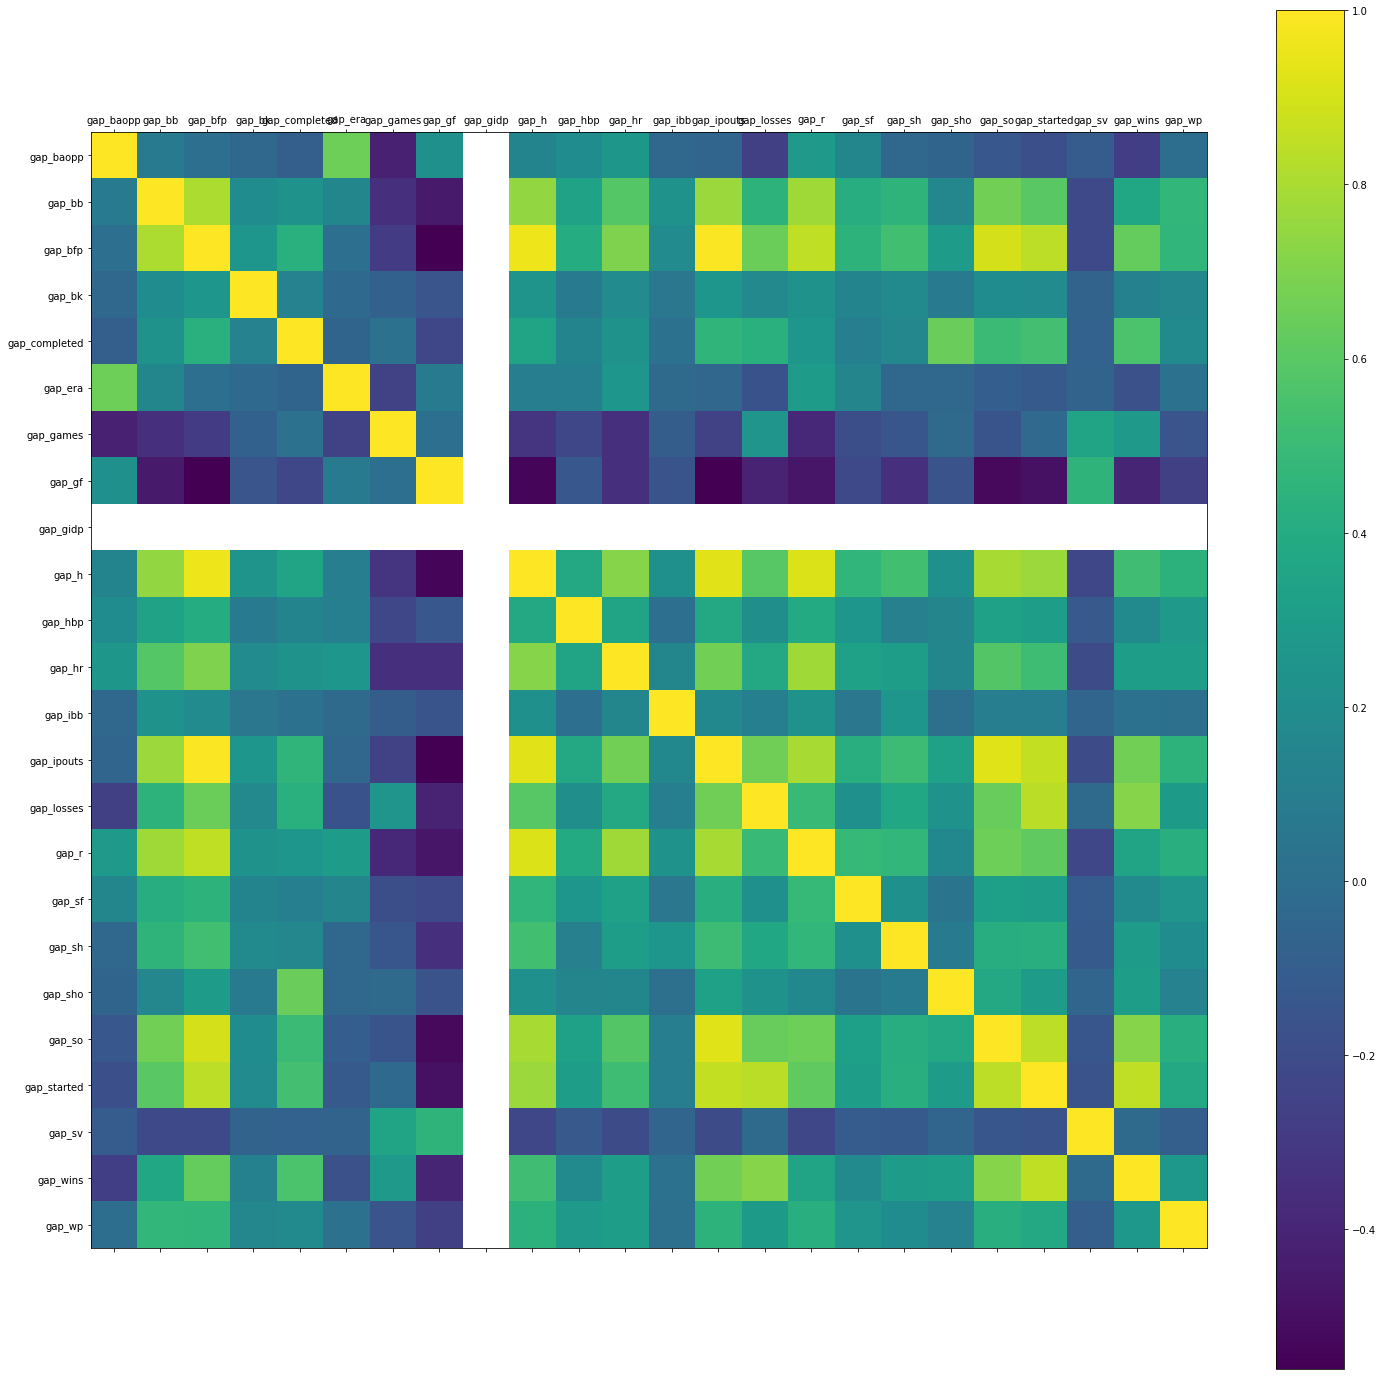

In [82]:
analyse_gameavg_corr(ga_pitching_df, 2015, 'pitching')



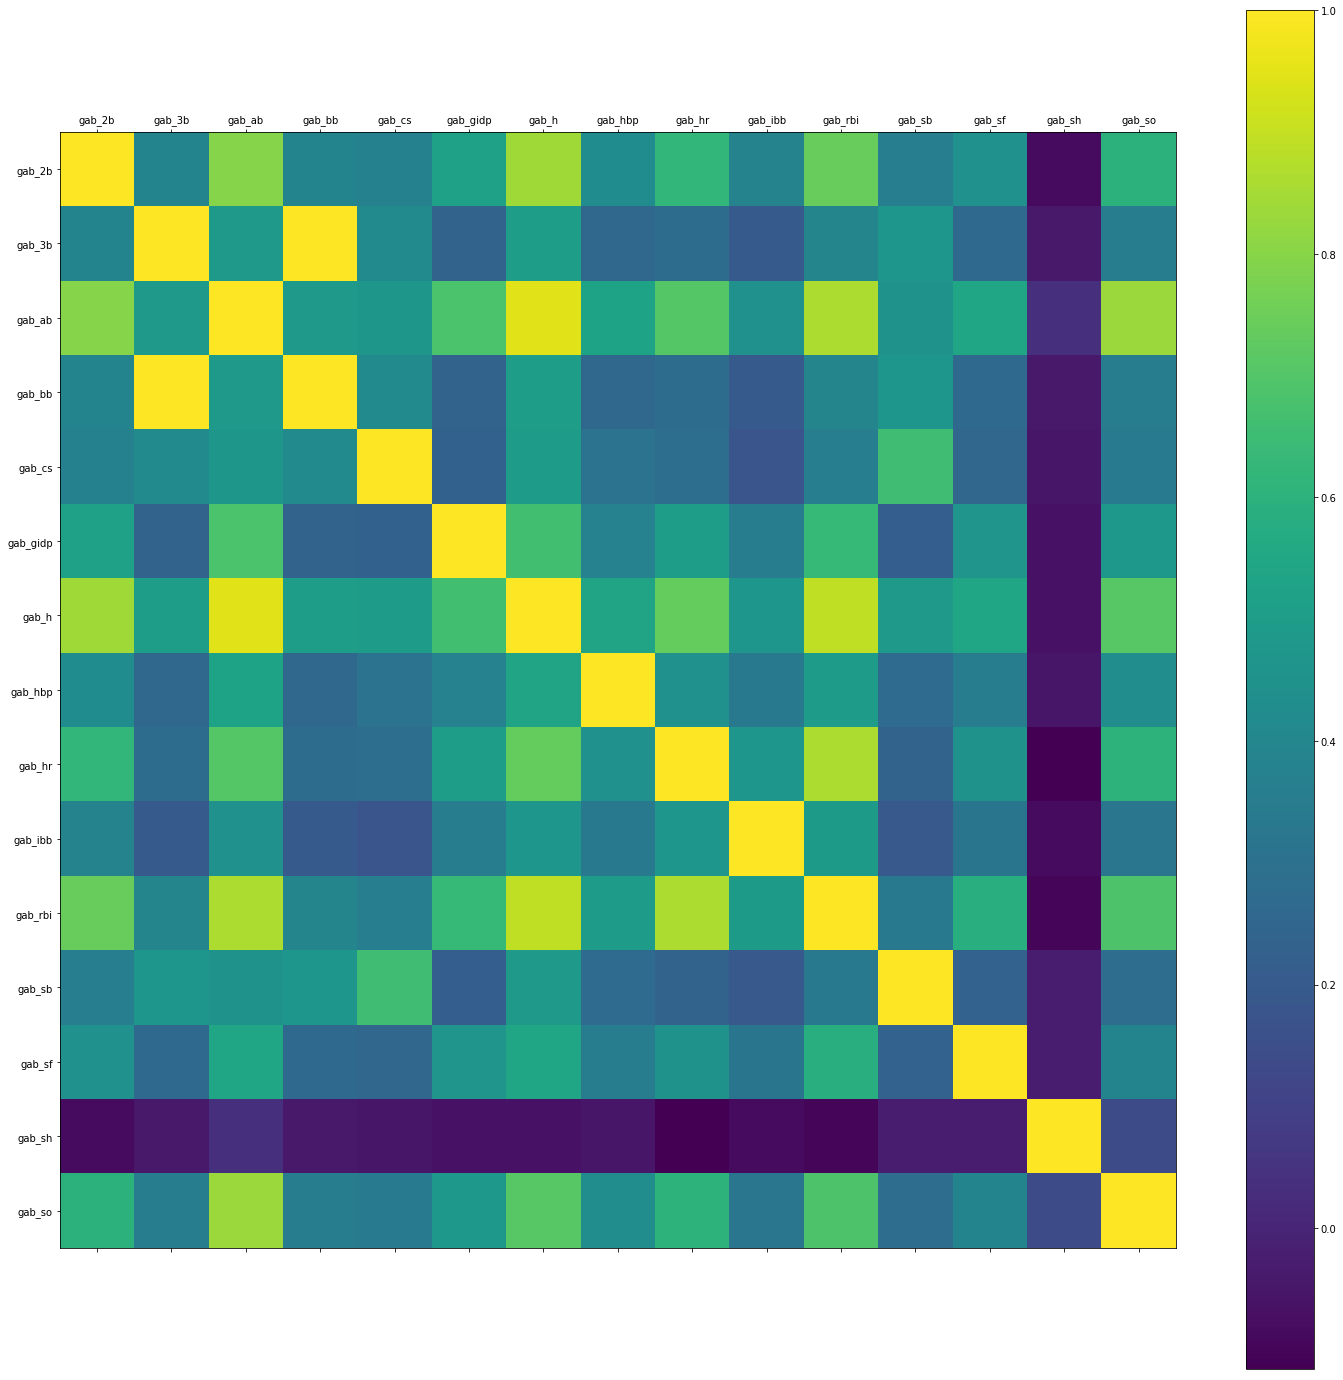

In [83]:
analyse_gameavg_corr(ga_batting_df, 2015, 'batting')


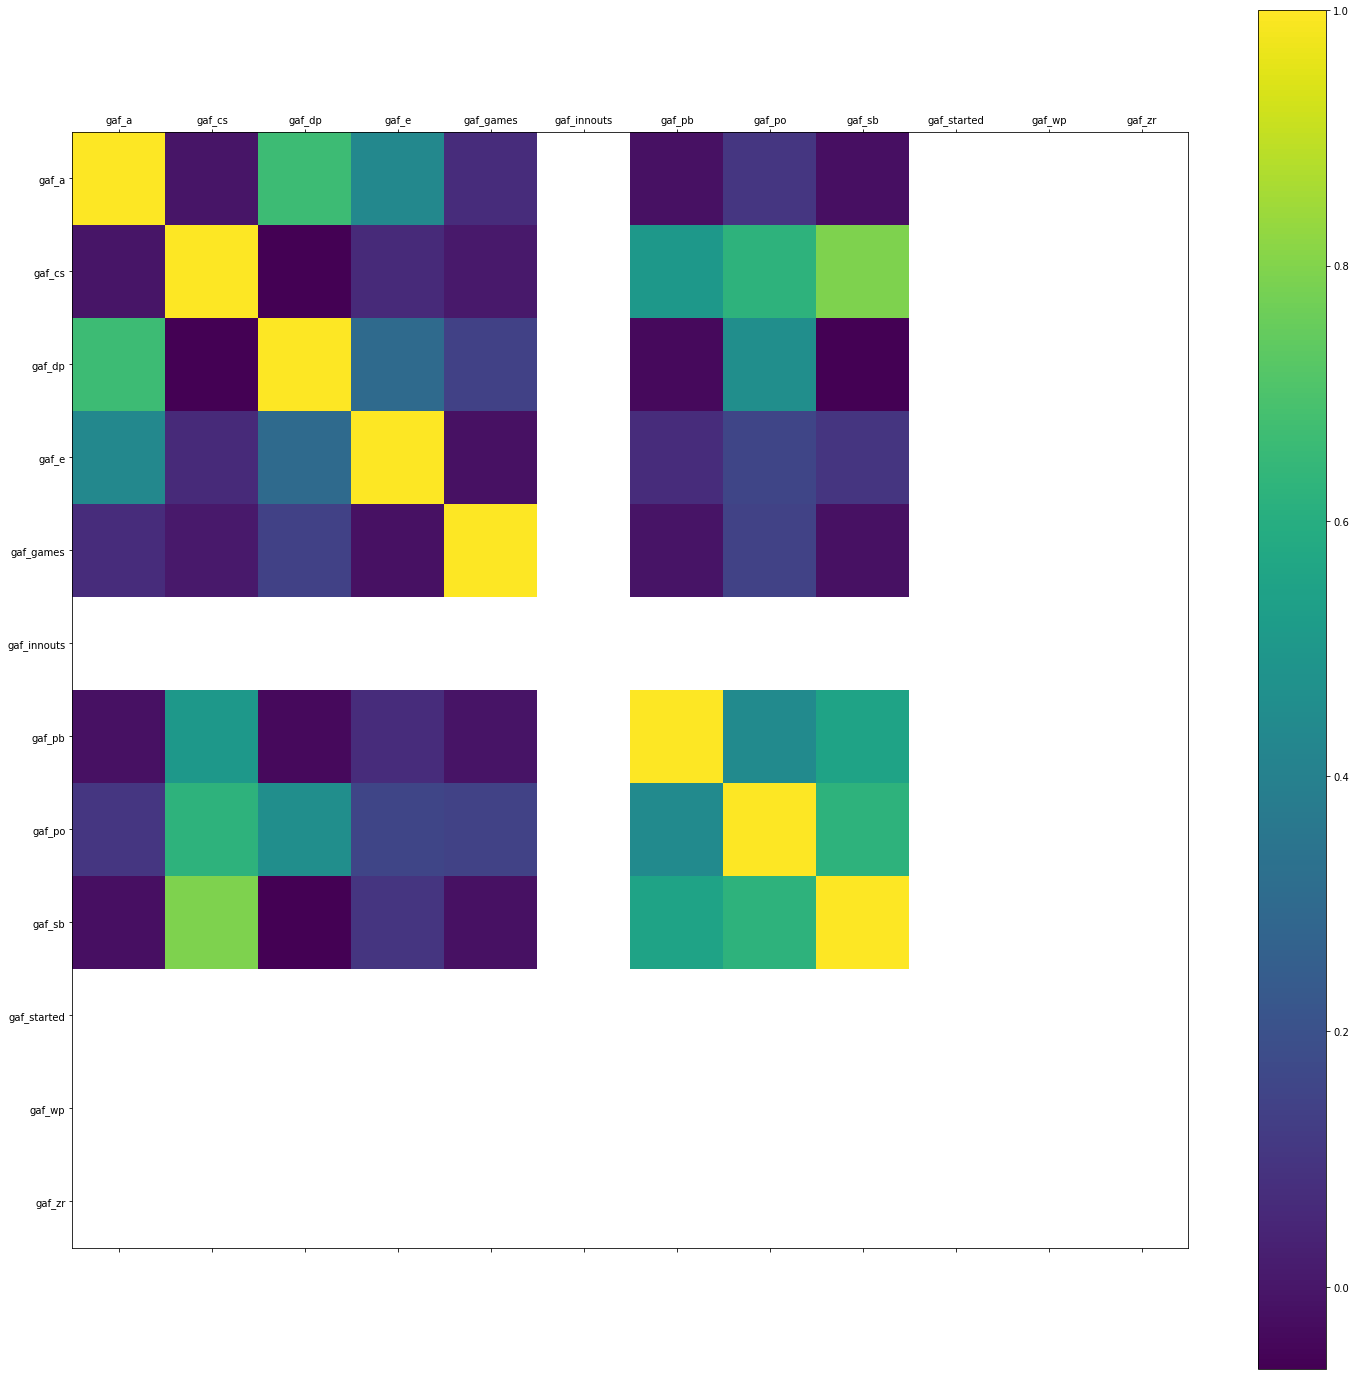

In [84]:
analyse_gameavg_corr(ga_fielding_df, 2015, 'fielding')


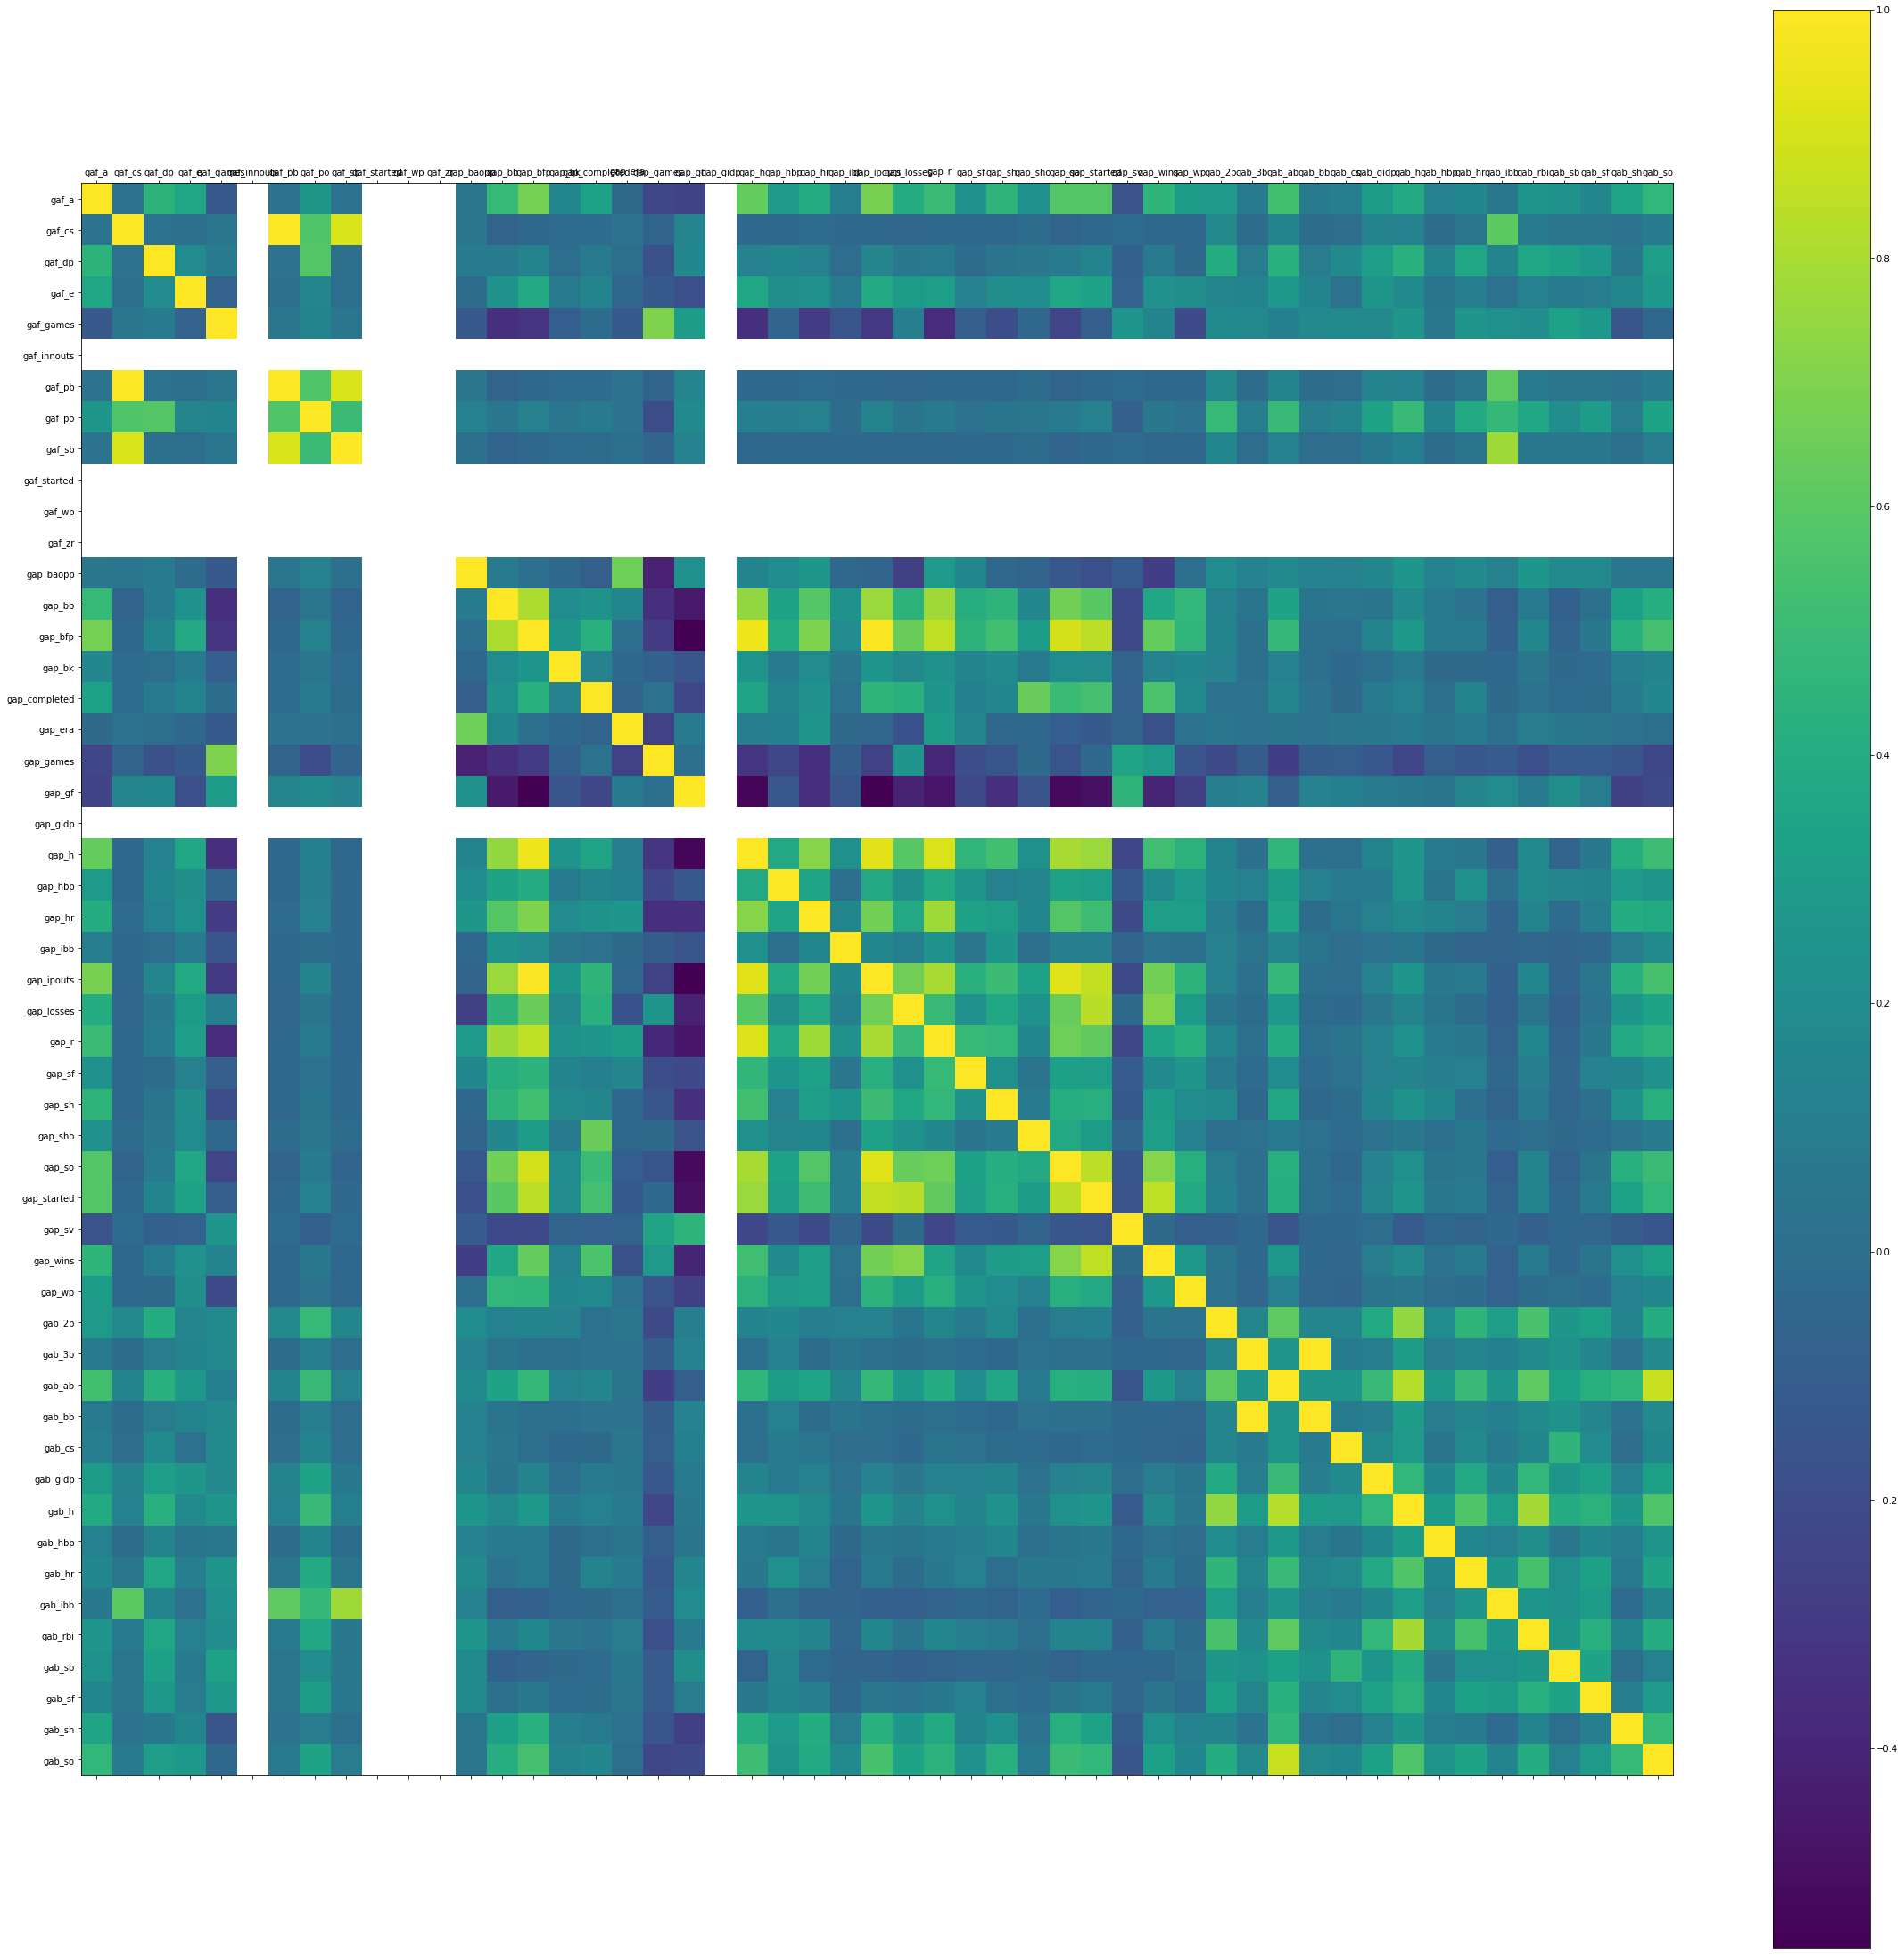

In [100]:
analyse_all_gameavg_corr([ga_fielding_df, ga_pitching_df, ga_batting_df], 2015, 'all')


In [102]:
sort_all_gameavg_corr([ga_fielding_df, ga_pitching_df, ga_batting_df], 2015, 'all')

all
gab_3b         gab_bb         1.000000
gaf_cs         gaf_pb         0.999953
gap_bfp        gap_ipouts     0.993521
               gap_h          0.958638
gap_h          gap_ipouts     0.929720
gap_ipouts     gap_so         0.922082
gap_h          gap_r          0.917383
gaf_pb         gaf_sb         0.912967
gaf_cs         gaf_sb         0.908985
gap_bfp        gap_so         0.899778
gab_ab         gab_so         0.869082
gap_ipouts     gap_started    0.859466
gap_bfp        gap_r          0.851553
gap_started    gap_wins       0.849409
gap_bfp        gap_started    0.842539
gap_so         gap_started    0.842038
gap_losses     gap_started    0.836795
gab_ab         gab_h          0.823812
gap_bb         gap_bfp        0.804965
gap_ipouts     gap_r          0.797313
gap_h          gap_so         0.793770
gab_h          gab_rbi        0.788096
gap_hr         gap_r          0.780430
gaf_sb         gab_ibb        0.777964
gap_bb         gap_r          0.775114
               gap_ip

### 球员赛季表现指标中有哪些项是强相关的？

绘制相关性矩阵图来找出哪些指标强相关。列出相关度最高的30个相关指标来分析指标之间的关系。

观察发现 Battings 数据里的BB(Base on ball)和3b指数的关联度达到了1，应该是出现 BB 后必然会有 3B 的出现。BB应当看作是自变量，3B看作是因变量。

Battings 数据里的 AB(At bat)和这三个指标相关性比较强: SO(Strikeouts), H(hits), RBI(Runs Batted In)。因为按棒球规则，这几种击球都会导致At bat。



引用的资料:
    
    [https://stackoverflow.com/a/41453817]
    [https://stackoverflow.com/a/31384328]
    [https://pandas.pydata.org/pandas-docs/stable/index.html]
    [https://matplotlib.org/index.html]
    